<a href="https://colab.research.google.com/github/AlMarNeuro/AlMarNR/blob/media108/Stajirovka_Media108_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройка хранилища, библиотек и глобальных переменных

- Инициализация

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Загрузка библиотек

In [ ]:
#
# Загрузка библиотек
#
import os # Работа с файловой системой

import time # Работа с системным временем

import pickle as pkl # Сериализация данных

import pandas as pd # Датафреймы
# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_colwidth = 999

import numpy as np

import regex as re

import librosa # Для параметризации аудио
import librosa.display # Для отображения аудио сигналов

import matplotlib.pyplot as plt # Для отрисовки графиков
plt.style.use('dark_background')

from google.colab import files # Для загрузки файлов
#import IPython.display as ipd # Для проигрывания аудио
#from IPython.display import Audio
#import seaborn as sns

###
# Подготовка данных
#import sklearn # Для нормирования
#from sklearn.preprocessing import LabelEncoder, StandardScaler # Масштабирование, нормировка данных
#from sklearn.model_selection import train_test_split # Разбиение на обучающую и проверочную выборку

from sklearn.utils import shuffle # Синхронно перемешать 2 набора данных (XTrain и YTrain)

# Функции-утилиты для работы с категориальными данными
# from keras.api._v2.keras import utils
# from keras.api._v2.keras.utils import to_categorical

# Рисование схемы модели
from keras.api._v2.keras.utils import plot_model

# Класс для конструирования последовательной модели нейронной сети
from keras.api._v2.keras.models import Sequential, Model
from keras.api._v2.keras.models import load_model


# Основные слои
from keras.api._v2.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.api._v2.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, Conv2D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from keras.api._v2.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
#from keras.api._v2.keras.preprocessing.text import Tokenizer

%matplotlib inline

- Переменные глобальные

In [ ]:
#
# Глобальные переменные
#

ACCOUNT = 'mar'
#ACCOUNT = 'adi'

if ACCOUNT == 'mar':
  VM_CNT = '/content'
  VM_CNT_DRV = VM_CNT + '/drive'
  MY_CNT = '/content/drive/MyDrive/УИИ(marphida)/Стажировка_Media108'

  WAV_PATH = VM_CNT_DRV + '/MyDrive/УИИ(marphida)/Стажировка_Media108/Audio/'
  WAV_FILE = '2023-07-16_19-33-07.854622_from_79254254955_to_0111642_session_3091299879_talk.wav'
  WAV_DATA = WAV_PATH + WAV_FILE

  WAV_PRIMA = MY_CNT + '/Audio/Записи звонков_primavera/'
  WAV_PAVEL = MY_CNT + '/Audio/Записи звонков_павелецкая сити'
  WAV_HEADL = MY_CNT + '/Audio/Записи звонков_хедлайнер'
  WAV_ZV_INFO = MY_CNT + '/Audio/Информация о звонках'

  DF_HL = MY_CNT + '/РГ/Headliner_df.pkl'
  DF_PAVEL_ST = MY_CNT + '/РГ/Paveletskaya_city_df.pkl'
  DF_PAVEL_HL = MY_CNT + '/РГ/Paveletskaya_df.pkl'
  DF_PRIMA = MY_CNT + '/РГ/Primavera_df.pkl'
  DF_TOTAL = MY_CNT + '/РГ/total_df.pkl'
  DF_TOTAL_MATCH = MY_CNT + '/РГ/total_match_df.pkl'
  DF_TOTAL_NOT_MATCH = MY_CNT + '/РГ/total_not_match_df.pkl'

  CSV_HL = MY_CNT + '/РП/Headliner_with_audio.csv'
  CSV_PST = MY_CNT + '/РП/Павелецкая_ЖК_«Павелецкая_сити»_with_audio.csv'
  CSV_PTB = MY_CNT + '/РП/Paveleckaya_with_audio.csv'
  CSV_PRM = MY_CNT + '/РП/Primavera_with_audio.csv'

  DUMP = '/content/drive/MyDrive/УИИ(marphida)/Стажировка_Media108/DataDump'
elif ACCOUNT == 'adi':
  VM_CNT = '/content'
  VM_CNT_DRV = VM_CNT + '/drive'
  MY_CNT = '/content/drive/MyDrive/st108'

  WAV_PATH = VM_CNT_DRV + '/MyDrive/st108/Audio/'

  WAV_PRIMA = MY_CNT + '/Audio/Записи звонков_primavera/'
  WAV_PAVEL = MY_CNT + '/Audio/Записи звонков_павелецкая сити'
  WAV_HEADL = MY_CNT + '/Audio/Записи звонков_хедлайнер'
  WAV_ZV_INFO = MY_CNT + '/Audio/Информация о звонках'

  CSV_HL = MY_CNT + '/Audio/Headliner_with_audio.csv'
  CSV_PST = MY_CNT + '/Audio/Павелецкая_ЖК_«Павелецкая_сити»_with_audio.csv'
  CSV_PTB = MY_CNT + '/Audio/Paveleckaya_with_audio.csv'
  CSV_PRM = MY_CNT + '/Audio/Primavera_with_audio.csv'

  DUMP = MY_CNT + '/Dump'

#=========================================================================
  #csv_list_ = [CSV_HL, CSV_PST, CSV_PTB, CSV_PRM]
#=========================================================================

# Параметры предобработки аудиосигнала и подготовки обучающих выборок
#
SR = 8000 # Sample Rate - Частота дискетизации исходного звукового материала (звонки клиентов)
#
LEN_MEAN_AU = 10       # Шаг усреднения аудио
LEN_CONV1D_AU = 1000  # Размер окна одномерной свёртки аудио
STEP_CONV1D_AU = 100  # Шаг сдвига по свёртке аудио
#
# Параметры one-hot-encoding обработки
#
AU_OHE_CLASSES = 100
#

- Класс для измерение времени исполнения модулей

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

# Свёрточная модель на необработанном аудио

## Предобработка датасетов обучения

- **Функция формирования предвыборок обучения**

In [ ]:
##### Функция формирования датафрейма соответствия аудиофайлов и соответствующих им признаков целевой/нецелевой
#####
##### get_tags_vs_audio (path_csv)
#####
##### Входные параметры:
##### path_csv - адрес датафрейма csv содержащим столбец целевых тегов
#####
##### Возвращаемые данные:
##### df_tags_audio_ - датафрейм со столбцами:
#####      'Tags' - wелевой/нецелевой(1/0)
#####      'Audio' -  соответствующе тегам имена аудиофайлов

def get_tags_vs_audio (path_csv, name_who):
  df_csv_ = pd.read_csv(path_csv)
  df_csv_ = df_csv_.fillna('')
  print(f'Размерность исходного csv-файла: {df_csv_.shape}')
  # Копирование наименований аудиофайлов всех целевых тегов
  df_tags_audio_ = df_csv_[df_csv_['Теги'].str.contains('Целевой')][['Теги', 'Аудиофайл']].copy()
  if name_who=='Headliner':
    df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('целевой')][['Теги', 'Аудиофайл']].copy()] )

##  df_tags_audio_ = df_csv_[df_csv_['Теги'].str.contains(r'Целевой|целевой', case=False, regex=True)][['Теги', 'Аудиофайл']].copy()
##  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('Целевой')][['Теги', 'Аудиофайл']].copy()] )
  # Копирование наименований аудиофайлов всех нецелевых тегов
  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('Нецелевой')][['Теги', 'Аудиофайл']].copy()] )
  if name_who=='Headliner':
    df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('нецелевой')][['Теги', 'Аудиофайл']].copy()] )

##  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains(r'Нецелевой|нецелевой', case=False, regex=True)][['Теги', 'Аудиофайл']].copy()] )
  # Переименование имён столбцов
  df_tags_audio_.rename(columns = {'Теги':'Tags', 'Аудиофайл':'AudioFile'}, inplace=True )
  print(f'Отфильтровано для обучения записей: {df_tags_audio_.shape}')
  # Избавление от ошибки фильтрации по NaN
  df_tags_audio_ = df_tags_audio_.fillna('')
  # Все нецелевые = 0
  #df_tags_audio_ = df_tags_audio_.astype({'Tags': str}) # Избавление от ошибки нестроковых данных
  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Нецелевой', na=False), 'Tags'] = 0
  if name_who=='Headliner':
    df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('нецелевой', na=False), 'Tags'] = 0

##  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'Нецелевой|нецелевой', case=False, regex=True, na=False), 'Tags'] = 0
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'\bНецелевой', case=False, regex=True, na=False), 'Tags'] = 0
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('нецелевой', na=False), 'Tags'] = 0
  # Все целевые = 1
###  df_tags_audio_ = df_tags_audio_.astype({'Tags': str}) # Избавление от ошибки нестроковых данных
  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Целевой', na=False), 'Tags'] = 1
  if name_who=='Headliner':
    df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('целевой', na=False), 'Tags'] = 1

##  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'Целевой|целевой', case=False, regex=True, na=False), 'Tags'] = 1
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'\bЦелевой', case=False, regex=True, na=False), 'Tags'] = 1
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('целевой', na=False), 'Tags'] = 1
  # Изменение типа столбца 'Tags'
  df_tags_audio_ = df_tags_audio_.astype({'Tags': int})
  # Удаление записей без аудиофайлов
  df_tags_audio_ = df_tags_audio_[df_tags_audio_.AudioFile != '']
  # Сброс старых индексов
  df_tags_audio_.reset_index(drop=True, inplace=True)
  print(f"Баланс целевые/нецелевые:\n\
          Целевые: {len(df_tags_audio_[df_tags_audio_.Tags==1])}\n\
          Нецелевые: {len(df_tags_audio_[df_tags_audio_.Tags==0])}")
  return df_tags_audio_

- **Функция получения датафреймов с необработанными аудио + тегами**

In [ ]:
#####
##### Получение всех тегов с полными путями к аудио
#####
def get_pre_train():
  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  csv_list_ = [CSV_HL, CSV_PST, CSV_PTB, CSV_PRM]
###  audio_list_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]
  proj_len_ = len(name_list_)
  df_tags_audio_full_ = pd.DataFrame()
  for i in range(proj_len_):
    # df_csv_ = pd.read_csv(csv_list_[i])
    print(f'\n         Обработка {name_list_[i]}...\n')
    # print(f'{name_list_[i]} shape = {df_csv_.shape}')
    df_tags_audio_ = get_tags_vs_audio(csv_list_[i], name_list_[i])
###    df_tags_audio_['AudioFile'] = str(audio_list_[i])+"/"+df_tags_audio_['AudioFile']
    df_tags_audio_['DataNumber'] = i
    df_tags_audio_full_ = pd.concat([df_tags_audio_full_, df_tags_audio_], ignore_index = True)
  # Переиндексация
  df_tags_audio_full_.reset_index(drop=True, inplace=True)
  return df_tags_audio_full_

## ► Модуль создания датафрейма - исходника для формирование выборок обученеия

In [ ]:
#
# df_pre_train - датафрейм-исходник для генерации обучающих выборок
#
with timex():

  df_pre_train = get_pre_train()

  print('=======================')
  print(f'\nРазмерность сводных данных: {df_pre_train.shape}')
  print(f"Сводный баланс целевые/нецелевые:\n\
          Целевые: {len(df_pre_train[df_pre_train.Tags==1])}\n\
          Нецелевые: {len(df_pre_train[df_pre_train.Tags==0])}")



         Обработка Headliner...

Размерность исходного csv-файла: (2045, 73)
Отфильтровано для обучения записей: (1097, 2)
Баланс целевые/нецелевые:
          Целевые: 859
          Нецелевые: 238

         Обработка Paveletskaya_city...

Размерность исходного csv-файла: (1000, 76)
Отфильтровано для обучения записей: (527, 2)
Баланс целевые/нецелевые:
          Целевые: 290
          Нецелевые: 237

         Обработка Paveletskaya_turbo...

Размерность исходного csv-файла: (1784, 76)
Отфильтровано для обучения записей: (1290, 2)
Баланс целевые/нецелевые:
          Целевые: 290
          Нецелевые: 1000

         Обработка Primavera...

Размерность исходного csv-файла: (1517, 75)
Отфильтровано для обучения записей: (1310, 2)
Баланс целевые/нецелевые:
          Целевые: 648
          Нецелевые: 662

Размерность сводных данных: (4224, 3)
Сводный баланс целевые/нецелевые:
          Целевые: 2087
          Нецелевые: 2137
Время обработки: 0.54 с


In [ ]:
#
# Равномерное перемешивание Целевых и Нецелевых в датафрейме для формирование датасетов обучения
#

dft_0 = df_pre_train[df_pre_train.Tags==0]
dft_1 = df_pre_train[df_pre_train.Tags==1]

df_p_t_new = pd.DataFrame(columns = df_pre_train.columns)

flag_0_1 = True
i0, i1 = 0, 0

for ii in range(min(len(dft_0), len(dft_1)) * 2):
  if flag_0_1 == True:
    df_p_t_new.loc[len(df_p_t_new.index)] = dft_0.iloc[i0]
#    df_p_t_new = pd.concat( [df_p_t_new, dft_0.iloc[i0]], axis = 0, ignore_index = True)
    i0 += 1
    flag_0_1 = False
  else:
    df_p_t_new.loc[len(df_p_t_new.index)] = dft_1.iloc[i1]
#    df_p_t_new = pd.concat( [df_p_t_new, dft_1.iloc[i1]], axis = 0, ignore_index = True)
    i1 += 1
    flag_0_1 = True

df_pre_train = df_p_t_new.copy()

del dft_0, dft_1, df_p_t_new, ii, flag_0_1, i0, i1

df_pre_train

Tags  \
0       0   
1       1   
2       0   
3       1   
4       0   
...   ...   
4169    1   
4170    0   
4171    1   
4172    0   
4173    1   

                                                                                   AudioFile  \
0         2023-07-19_15-35-00.597395_from_74951397391_to_0188880_session_3097826533_talk.mp3   
1     2023-05-22_10-16-39.852630_from_79175582996_to_74957898990_session_2955352133_talk.mp3   
2     2023-07-19_14-06-31.860077_from_79916000360_to_74957898990_session_3104061795_talk.mp3   
3     2023-07-19_17-12-58.258412_from_79991345109_to_74959339902_session_3099072526_talk.mp3   
4         2023-07-19_11-40-46.765315_from_79636236173_to_0188880_session_3097851001_talk.mp3   
...                                                                                      ...   
4169      2023-05-02_14-23-41.246677_from_79099221244_to_0197872_session_2917197011_talk.mp3   
4170      2023-05-12_08-43-24.365428_from_73452427822_to_0197879_session_2945566020_talk.mp3   
4171      2023-05-02_11-45-20.432052_from_79037581605_to_0111652_session_2916596803_talk.mp3   
4172      2023-05-12_08-42-59.625280_from_73452427822_to_0197879_session_2945563440_talk.mp3   
4173      2023-05-01_10-25-48.968195_from_79605015550_to_0197879_session_2906114070_talk.mp3   

     DataNumber  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
4169          3  
4170          3  
4171          3  
4172          3  
4173          3  

[4174 rows x 3 columns]

## ► Схема построения свёрточной НС
- Первый слой - свертка, с ядром CONV_SIZE_1 и смещением на каждом шаге свертки CONV_STRIDE_1
- Далее набор из нескольких одинаковых блоков классифицирующих сверточных сетей -  свертка (с ядром  CONV_SIZE) + пулинг (длина пуллинга PULL_SIZE)
- Финальные слои - Conv1D, Flattern и бинарный классификатор на слое Dense.

# Функции создания модели обучеия

## Функция создания модели

In [ ]:
#Создаем модель
def create_model(
      sections, # Список с количеством фильтров в классифицирующих секциях
      filter_length,  # Размер ядра свёрточных фильтров
      pooling_length, # Размер пулингов
      outActivation   # Активация на последнем слое
    ):

    #Вход
    input_raw = Input(shape=(X_train1.shape[1], X_train1.shape[2]))

    #Входной сверточный слой
    x = Conv1D(128, filter_length, padding="same", strides=strider, activation="relu")(input_raw)
    x = BatchNormalization()(x)

    #Классифицирующие секции - свертка + пулинг
    for s in sections:
        x = Conv1D(s, filter_length, padding="same", activation="relu")(x)
        x = MaxPooling1D(pool_size = pooling_length)(x)
        x = BatchNormalization()(x)

    #Последняя свертка + подготовка к Dense
    x = Conv1D(512, 1, padding="same", activation="relu")(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)

    #Dense
    x = Dense(2, activation = outActivation)(x)

    #Возвращаем модель
    return Model([input_raw], x)

## ► Функция создания и компиляции модели

In [ ]:
def create_compile_model():

  model_au_ = create_model(SECTIONS, CONV_SIZE, PULL_SIZE, 'softmax') # 'sigmoid'

  # Компиляция модели
  model_au_.compile(
      optimizer=Adam(learning_rate=1e-2),
      loss='categorical_crossentropy',
  #    loss='binary_crossentropy',
      metrics=['accuracy'])

  # Вывод сводки
  model_au_.summary()

  # Вывод схемы модели
  display(plot_model(model_au_, dpi=60, show_shapes=True))

  return model_au_

## Функция обучения модели

In [ ]:
def trainModel(model, X_train1, Y_train1, X_train1V, Y_train1V, batch_size, epochs):

  history = model.fit(X_train1,
                      Y_train1,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(X_train1V, Y_train1V),
                      verbose = 1)#,
                      #callbacks=[GarbageCollectorCallback()],)

  # Вывод графиков точности и ошибки
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
  fig.suptitle('График процесса обучения модели')
  ax1.plot(history.history['accuracy'],
              label='Доля верных ответов на обучающем наборе')
  ax1.plot(history.history['val_accuracy'],
              label='Доля верных ответов на проверочном наборе')
  ax1.xaxis.get_major_locator().set_params(integer=True)
  ax1.set_xlabel('Эпоха обучения')
  ax1.set_ylabel('Доля верных ответов')
  ax1.legend()

  ax2.plot(history.history['loss'],
              label='Ошибка на обучающем наборе')
  ax2.plot(history.history['val_loss'],
              label='Ошибка на проверочном наборе')
  ax2.xaxis.get_major_locator().set_params(integer=True)
  ax2.set_xlabel('Эпоха обучения')
  ax2.set_ylabel('Ошибка')
  ax2.legend()
  plt.show()

# **Параметры модели**

In [ ]:
#
# Параметры свёрточной модели
#
CONV_SIZE_1 = 3 # Ядро свёртки на 1-м шаге
CONV_STRIDE_1 = 7 # Смещение ядра свёртки на 1-м шаге
CONV_SIZE = 3 # Ядро свёртки на 2-м и последующих свёрточных слоях (размер фильтра свёртки)
CONV_STRIDE = 3 # Смещение ядра свёртки на 2-м и последующих свёрточных слоях
PULL_SIZE = 3 # Размер пуллинга на 2-м и последующих свёрточных слоях

CUTTING_PART_TRAIN = 2 # На какую часть нарезки сдвигать ядро свёртки на обучении
CUTTING_PART_PREDICT = 7  # На какую часть нарезки сдвигать ядро свёртки на тестировании

# PART_TO_TRAIN = 10 # ~ 1 / PART_TO_TRAIN на валидацию и тестирование, остальое - на обучение

# Количество фильтров (параметр filters в Conv1D ) в сверточных слоях
# в каждом из классифицирующих блоков
SECTIONS = [128, 128, 256, 256, 256, 256, 256, 512, 512]

# Блоки аудиофайлов для циклов обучения
'''
#    [0, 200],
#    [200, 400],
#    [400, 600],
#    [600, 800],
#    [800, 1000],
#    [1000, 1200],
#    [1200, 1300],
#    [1300, 1400],
#    [1400, 1500],
#    [1500, 1600],
#    [1600, 1650],
    [1650, 1700],
    [1700, 1750],
    [1750, 1800],
    [1800, 1850],
    [1850, 1900],
    [1900, 1950],
    [1950, 2000],
    [2000, 2050],
    [2050, 2100],
    [2100, 2150],
    [2150, 2200],
    [2200, 2250],
    [2250, 2300],
    [2300, 2350],
    [2350, 2400],
    [2400, 2450],
    [2450, 2500],
    [2500, 2550],
    [2550, 2600],
    [2600, 2650],
    [2650, 2700],
    [2700, 2750],
    [2750, 2800],
    [2800, 2850],
    [2850, 2900],
    [2900, 2950],
    [2950, 3000],
    [3000, 3050],
    [3050, 3100],
    [3100, 3150],
    [3150, 3200],
    [3200, 3250],
    [3250, 3300],
    [3300, 3350],
    [3350, 3400],
    [3400, 3450],
    [3440, 3500],
    [3500, 3550],
    [3550, 3600],
    [3600, 3650],
    [3650, 3700],
    [3700, 3750],
    [3750, 3800],
    [3800, 3850],
    [3850, 3900],
    [3900, 3950],
'''

TR_BLOCKS = [
    [3950, 4000],
    [4000, 4050],
    [4050, 4100],
    [4100, 4174]
]

'''
TR_BLOCKS = [
    [1600, 1650],
    [1600, 1700],
    [1700, 1800],
    [1800, 1900],
    [1900, 2000],
    [2000, 2100],
    [2100, 2200],
    [2200, 2300],
    [2300, 2400],
    [2400, 2500],
    [2500, 2600],
    [2600, 2700],
    [2700, 2800],
    [2800, 2900],
    [2900, 3000],
    [3000, 3100],
    [3100, 3200],
    [3200, 3300],
    [3300, 3400],
    [3400, 3500],
    [3500, 3600],
    [3600, 3700],
    [3700, 3800],
    [3800, 3900],
    [3900, 4000],
    [4000, 4174]
]
'''
TR_BLOCKS_TEST = [
    [3000, 4174]
]


# Группа модулей циклического обучения: модули располагаются в порядке увеличения номеров отправляемых на обучение файлов
  - формирование блоков датасетов обучения, приемлемых для конфигурации ВМ Colaboratory, на подмножествах аудиофайлов
  - сохранение датасетов тестирования
  - циклический запуск обучения с сохранением/востановлением модели обучения



---




Запущен блок [0_200] - 1-й из 21
[0-200]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 4
[0-200]=> Headliner: № 2 -> Длина записи: 1038575; Маркер выборки: 1; Число нарезок: 7
[0-200]=> Headliner: № 3 -> Длина записи: 85871; Маркер выборки: 0; Число нарезок: 0
[0-200]=> Headliner: № 4 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 22
[0-200]=> Headliner: № 5 -> Длина записи: 507503; Маркер выборки: 0; Число нарезок: 3
[0-200]=> Headliner: № 6 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 26
[0-200]=> Headliner: № 7 -> Длина записи: 331247; Маркер выборки: 0; Число нарезок: 2
[0-200]=> Headliner: № 8 -> Длина записи: 423407; Маркер выборки: 1; Число нарезок: 3
[0-200]=> Headliner: № 9 -> Длина записи: 530543; Маркер выборки: 0; Число нарезок: 3
[0-200]=> Headliner: № 10 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 25
[0-200]=> Headliner: № 11 -> Длина записи: 297839; Маркер выборки: 0; Число нарезок: 2
[0-200]=> He

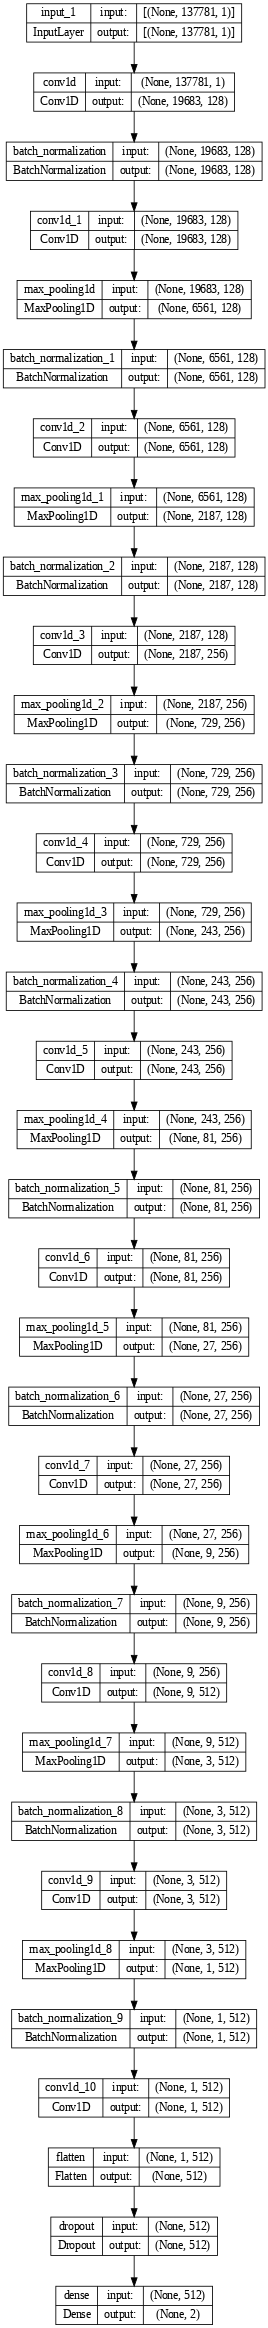


XTrain1.shape:  (3210, 137781, 1)
YTrain1.shape:  (3210, 2)
XTrain1V.shape:  (287, 137781, 1)
YTrain1V.shape:  (287, 2)
Обучающая выборка X_Train1 - Целевых: 2734; Нецелевых: 476
Валидационная выборка X_Train1V - Целевых: 268; Нецелевых: 19
Epoch 1/20
26/26 [==============================] - 55s 1s/step - loss: 1.4228 - accuracy: 0.7601 - val_loss: 26.8218 - val_accuracy: 0.9338
Epoch 2/20
26/26 [==============================] - 28s 1s/step - loss: 0.7043 - accuracy: 0.8178 - val_loss: 0.2656 - val_accuracy: 0.9338
Epoch 3/20
26/26 [==============================] - 29s 1s/step - loss: 0.5859 - accuracy: 0.8221 - val_loss: 0.4318 - val_accuracy: 0.9338
Epoch 4/20
26/26 [==============================] - 29s 1s/step - loss: 0.4385 - accuracy: 0.8402 - val_loss: 3.2148 - val_accuracy: 0.9338
Epoch 5/20
26/26 [==============================] - 29s 1s/step - loss: 0.4343 - accuracy: 0.8449 - val_loss: 0.4714 - val_accuracy: 0.9338
Epoch 6/20
26/26 [==============================] - 29s 1

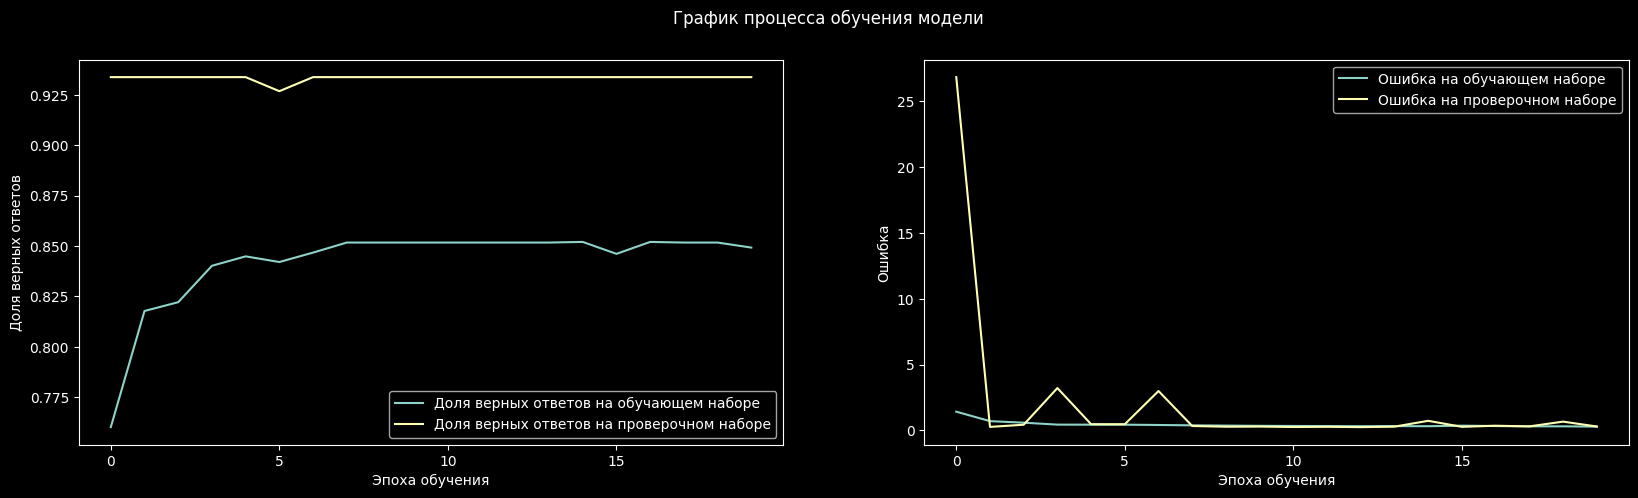

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [0_200] - 1-й из 21 

Запущен блок [200_400] - 2-й из 21
[200-400]=> Headliner: № 201 -> Длина записи: 240815; Маркер выборки: 0; Число нарезок: 1
[200-400]=> Headliner: № 202 -> Длина записи: 2676143; Маркер выборки: 1; Число нарезок: 19
[200-400]=> Headliner: № 203 -> Длина записи: 245999; Маркер выборки: 0; Число нарезок: 1
[200-400]=> Headliner: № 204 -> Длина записи: 2593775; Маркер выборки: 1; Число нарезок: 18
[200-400]=> Headliner: № 205 -> Длина записи: 192431; Маркер выборки: 0; Число нарезок: 1
[200-400]=> Headliner: № 206 -> Длина записи: 6835439; Маркер выборки: 1; Число нарезок: 49
[200-400]=> Headliner: № 207 -> Длина записи: 512687; Маркер выборки: 0; Число нарезок: 3
[200-400]=> Headliner: № 208 -> Длина записи: 2294831; Маркер выборки: 1; Число нарезок: 16
[200-400]=> Headliner: № 209 -> Длина записи: 88751; Маркер выборки: 0; Число нарезок: 0
[200-400]=> Headliner: № 210 -> Длина записи: 779375; Маркер выборки: 1; Число нарезок: 5
[200-400]=> Headliner:

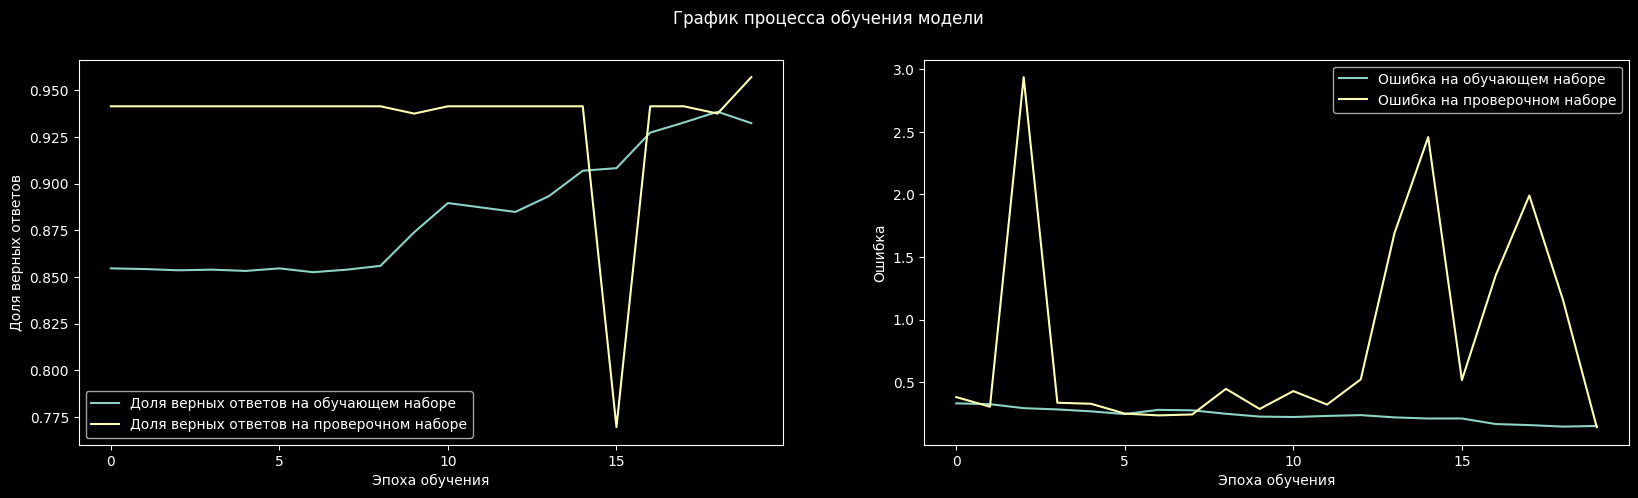

Завершён блок [200_400] - 2-й из 21 

Запущен блок [400_600] - 3-й из 21
[400-600]=> Headliner: № 401 -> Длина записи: 329519; Маркер выборки: 0; Число нарезок: 2
[400-600]=> Headliner: № 402 -> Длина записи: 2908271; Маркер выборки: 1; Число нарезок: 21
[400-600]=> Headliner: № 403 -> Длина записи: 352559; Маркер выборки: 0; Число нарезок: 2
[400-600]=> Headliner: № 404 -> Длина записи: 2947439; Маркер выборки: 1; Число нарезок: 21
[400-600]=> Headliner: № 405 -> Длина записи: 325487; Маркер выборки: 0; Число нарезок: 2
[400-600]=> Headliner: № 406 -> Длина записи: 2173871; Маркер выборки: 1; Число нарезок: 15
[400-600]=> Headliner: № 407 -> Длина записи: 153839; Маркер выборки: 0; Число нарезок: 1
[400-600]=> Headliner: № 408 -> Длина записи: 790319; Маркер выборки: 1; Число нарезок: 5
[400-600]=> Headliner: № 409 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 4
[400-600]=> Headliner: № 410 -> Длина записи: 2314415; Маркер выборки: 1; Число нарезок: 16
[400-600]=> Headlin

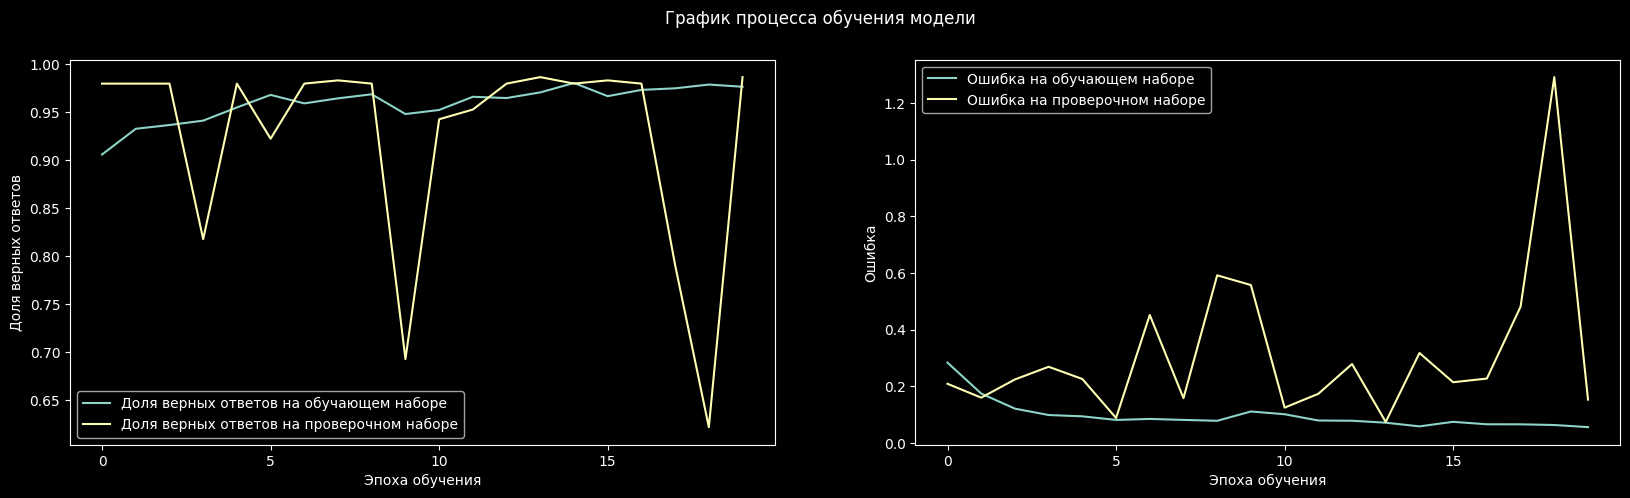

Завершён блок [400_600] - 3-й из 21 

Запущен блок [600_800] - 4-й из 21
[600-800]=> Paveletskaya_city: № 601 -> Длина записи: 15599; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 602 -> Длина записи: 1931951; Маркер выборки: 1; Число нарезок: 14
[600-800]=> Paveletskaya_city: № 603 -> Длина записи: 133679; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 604 -> Длина записи: 1586927; Маркер выборки: 1; Число нарезок: 11
[600-800]=> Paveletskaya_city: № 605 -> Длина записи: 29423; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 606 -> Длина записи: 425711; Маркер выборки: 1; Число нарезок: 3
[600-800]=> Paveletskaya_city: № 607 -> Длина записи: 129071; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 608 -> Длина записи: 4136303; Маркер выборки: 1; Число нарезок: 30
[600-800]=> Paveletskaya_city: № 609 -> Длина записи: 3454895; Маркер выборки: 0; Число нарезок: 25
[600-800]=> Headliner: № 610 -> Длина записи: 5197871; Маркер выборки: 

In [ ]:
with timex():
  neuro_au()



---




Запущен блок [600_800] - 1-й из 18
[600-800]=> Paveletskaya_city: № 1 -> Длина записи: 15599; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 2 -> Длина записи: 1931951; Маркер выборки: 1; Число нарезок: 14
[600-800]=> Paveletskaya_city: № 3 -> Длина записи: 133679; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 4 -> Длина записи: 1586927; Маркер выборки: 1; Число нарезок: 11
[600-800]=> Paveletskaya_city: № 5 -> Длина записи: 29423; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 6 -> Длина записи: 425711; Маркер выборки: 1; Число нарезок: 3
[600-800]=> Paveletskaya_city: № 7 -> Длина записи: 129071; Маркер выборки: 0; Число нарезок: 0
[600-800]=> Headliner: № 8 -> Длина записи: 4136303; Маркер выборки: 1; Число нарезок: 30
[600-800]=> Paveletskaya_city: № 9 -> Длина записи: 3454895; Маркер выборки: 0; Число нарезок: 25
[600-800]=> Headliner: № 10 -> Длина записи: 5197871; Маркер выборки: 1; Число нарезок: 37
[600-800]=> Paveletskaya_city: № 11

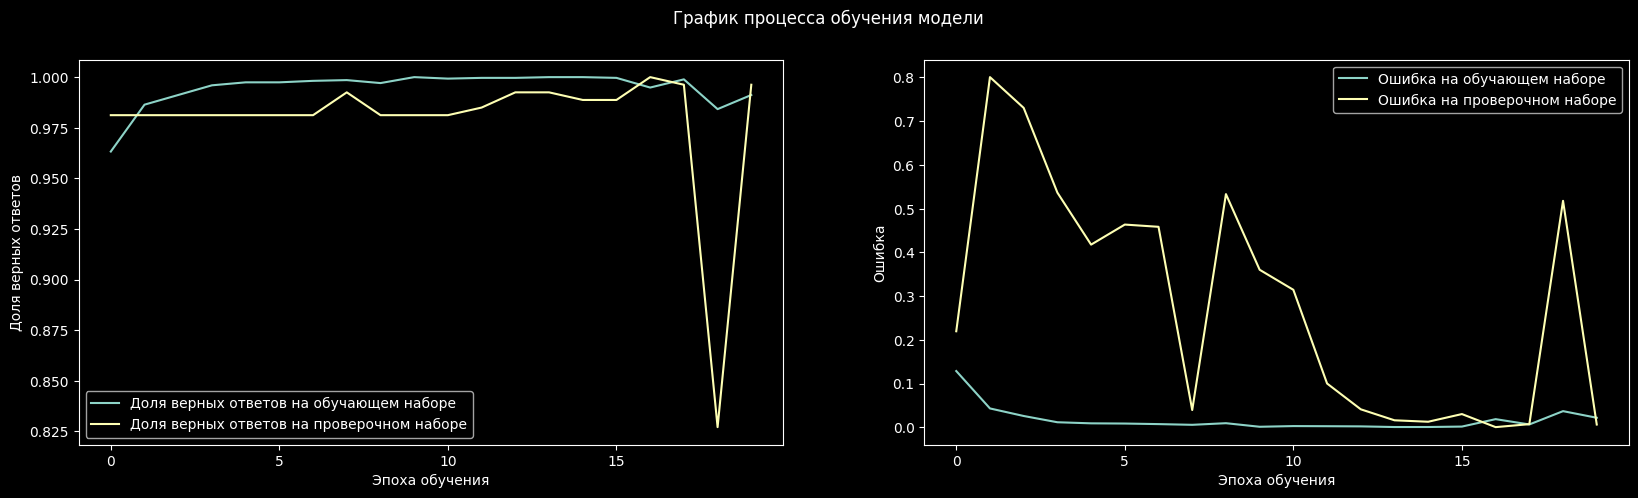

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [600_800] - 1-й из 18 

Запущен блок [800_1000] - 2-й из 18
[800-1000]=> Paveletskaya_city: № 201 -> Длина записи: 117551; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 202 -> Длина записи: 650351; Маркер выборки: 1; Число нарезок: 4
[800-1000]=> Paveletskaya_city: № 203 -> Длина записи: 104879; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 204 -> Длина записи: 5269871; Маркер выборки: 1; Число нарезок: 38
[800-1000]=> Paveletskaya_city: № 205 -> Длина записи: 16751; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 206 -> Длина записи: 3154223; Маркер выборки: 1; Число нарезок: 22
[800-1000]=> Paveletskaya_city: № 207 -> Длина записи: 56495; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 208 -> Длина записи: 3468719; Маркер выборки: 1; Число нарезок: 25
[800-1000]=> Paveletskaya_city: № 209 -> Длина записи: 31727; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 210 -> Длина записи: 4040111; Маркер в

ResourceExhaustedError: ignored

In [ ]:
with timex():
  neuro_au()


Запущен блок [800_1000] - 1-й из 17
[800-1000]=> Paveletskaya_city: № 1 -> Длина записи: 117551; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 2 -> Длина записи: 650351; Маркер выборки: 1; Число нарезок: 4
[800-1000]=> Paveletskaya_city: № 3 -> Длина записи: 104879; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 4 -> Длина записи: 5269871; Маркер выборки: 1; Число нарезок: 38
[800-1000]=> Paveletskaya_city: № 5 -> Длина записи: 16751; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 6 -> Длина записи: 3154223; Маркер выборки: 1; Число нарезок: 22
[800-1000]=> Paveletskaya_city: № 7 -> Длина записи: 56495; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 8 -> Длина записи: 3468719; Маркер выборки: 1; Число нарезок: 25
[800-1000]=> Paveletskaya_city: № 9 -> Длина записи: 31727; Маркер выборки: 0; Число нарезок: 0
[800-1000]=> Headliner: № 10 -> Длина записи: 4040111; Маркер выборки: 1; Число нарезок: 29
[800-1000]=> Paveletskaya_c

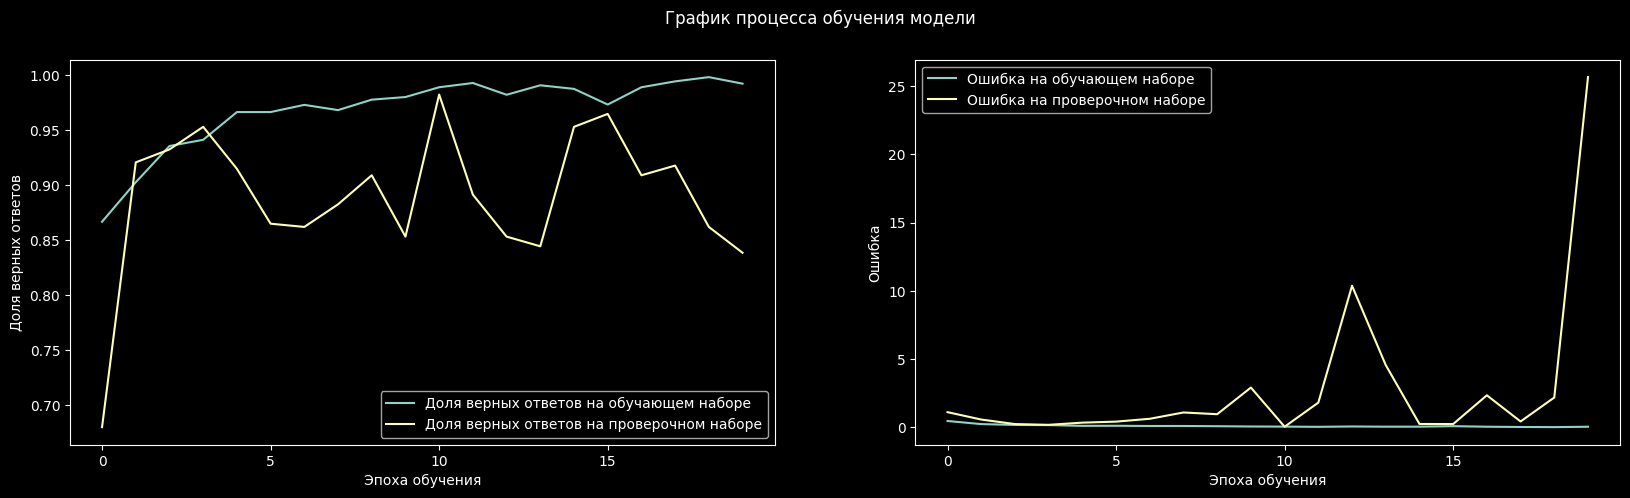

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [800_1000] - 1-й из 17 

Запущен блок [1000_1200] - 2-й из 17
[1000-1200]=> Paveletskaya_turbo: № 201 -> Длина записи: 3661103; Маркер выборки: 0; Число нарезок: 26
[1000-1200]=> Headliner: № 202 -> Длина записи: 3242927; Маркер выборки: 1; Число нарезок: 23
[1000-1200]=> Paveletskaya_turbo: № 203 -> Длина записи: 61103; Маркер выборки: 0; Число нарезок: 0
[1000-1200]=> Headliner: № 204 -> Длина записи: 2897903; Маркер выборки: 1; Число нарезок: 21
[1000-1200]=> Paveletskaya_turbo: № 205 -> Длина записи: 72623; Маркер выборки: 0; Число нарезок: 0
[1000-1200]=> Headliner: № 206 -> Длина записи: 1195823; Маркер выборки: 1; Число нарезок: 8
[1000-1200]=> Paveletskaya_turbo: № 207 -> Длина записи: 1287407; Маркер выборки: 0; Число нарезок: 9
[1000-1200]=> Headliner: № 208 -> Длина записи: 3456623; Маркер выборки: 1; Число нарезок: 25
[1000-1200]=> Paveletskaya_turbo: № 209 -> Длина записи: 1082351; Маркер выборки: 0; Число нарезок: 7
[1000-1200]=> Headliner: № 210 -> Длина за

In [ ]:
with timex():
  neuro_au()


Запущен блок [1000_1200] - 1-й из 16
[1000-1200]=> Paveletskaya_turbo: № 1 -> Длина записи: 3661103; Маркер выборки: 0; Число нарезок: 26
[1000-1200]=> Headliner: № 2 -> Длина записи: 3242927; Маркер выборки: 1; Число нарезок: 23
[1000-1200]=> Paveletskaya_turbo: № 3 -> Длина записи: 61103; Маркер выборки: 0; Число нарезок: 0
[1000-1200]=> Headliner: № 4 -> Длина записи: 2897903; Маркер выборки: 1; Число нарезок: 21
[1000-1200]=> Paveletskaya_turbo: № 5 -> Длина записи: 72623; Маркер выборки: 0; Число нарезок: 0
[1000-1200]=> Headliner: № 6 -> Длина записи: 1195823; Маркер выборки: 1; Число нарезок: 8
[1000-1200]=> Paveletskaya_turbo: № 7 -> Длина записи: 1287407; Маркер выборки: 0; Число нарезок: 9
[1000-1200]=> Headliner: № 8 -> Длина записи: 3456623; Маркер выборки: 1; Число нарезок: 25
[1000-1200]=> Paveletskaya_turbo: № 9 -> Длина записи: 1082351; Маркер выборки: 0; Число нарезок: 7
[1000-1200]=> Headliner: № 10 -> Длина записи: 1592111; Маркер выборки: 1; Число нарезок: 11
[1000

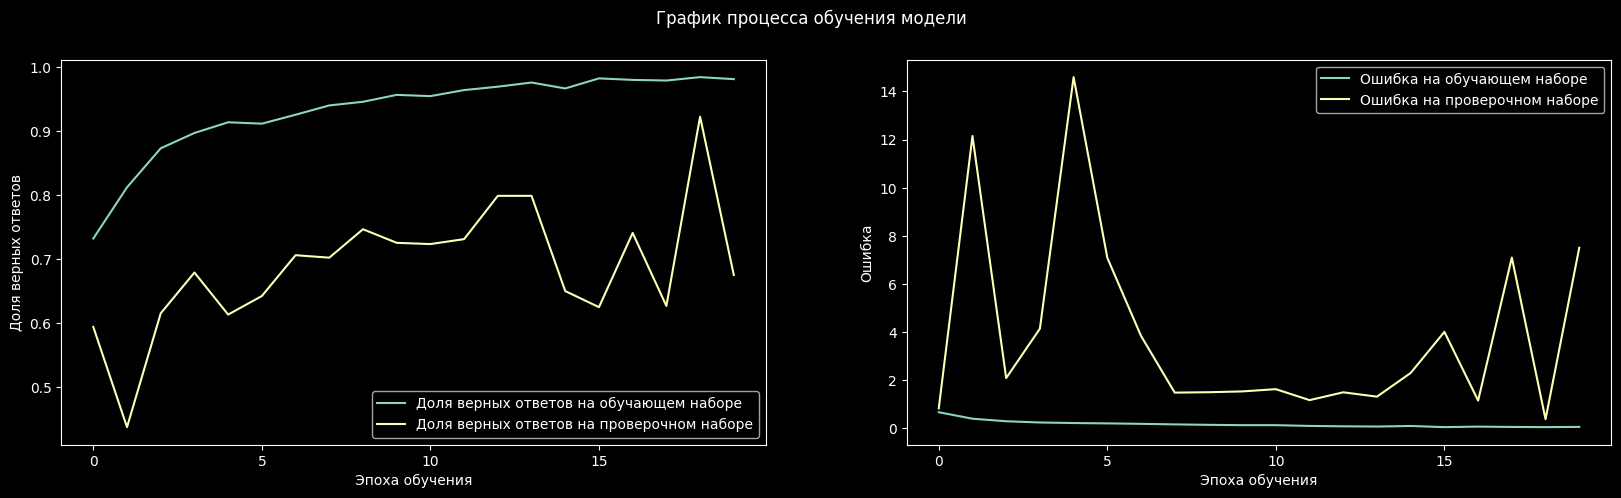

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [1000_1200] - 1-й из 16 

Запущен блок [1200_1400] - 2-й из 16
[1200-1400]=> Paveletskaya_turbo: № 201 -> Длина записи: 1832303; Маркер выборки: 0; Число нарезок: 13
[1200-1400]=> Headliner: № 202 -> Длина записи: 742511; Маркер выборки: 1; Число нарезок: 5
[1200-1400]=> Paveletskaya_turbo: № 203 -> Длина записи: 2633519; Маркер выборки: 0; Число нарезок: 19
[1200-1400]=> Headliner: № 204 -> Длина записи: 1798319; Маркер выборки: 1; Число нарезок: 13
[1200-1400]=> Paveletskaya_turbo: № 205 -> Длина записи: 14447; Маркер выборки: 0; Число нарезок: 0
[1200-1400]=> Headliner: № 206 -> Длина записи: 1963631; Маркер выборки: 1; Число нарезок: 14
[1200-1400]=> Paveletskaya_turbo: № 207 -> Длина записи: 1849583; Маркер выборки: 0; Число нарезок: 13
[1200-1400]=> Headliner: № 208 -> Длина записи: 1688303; Маркер выборки: 1; Число нарезок: 12
[1200-1400]=> Paveletskaya_turbo: № 209 -> Длина записи: 2403695; Маркер выборки: 0; Число нарезок: 17
[1200-1400]=> Headliner: № 210 -> Дли

In [ ]:
with timex():
  neuro_au()

In [ ]:
with timex():
  neuro_au()


Запущен блок [1600_1700] - 1-й из 25
[1600-1700]=> Paveletskaya_turbo: № 1 -> Длина записи: 328367; Маркер выборки: 0; Число нарезок: 2
[1600-1700]=> Headliner: № 2 -> Длина записи: 292079; Маркер выборки: 1; Число нарезок: 2
[1600-1700]=> Paveletskaya_turbo: № 3 -> Длина записи: 2690543; Маркер выборки: 0; Число нарезок: 19
[1600-1700]=> Headliner: № 4 -> Длина записи: 1254575; Маркер выборки: 1; Число нарезок: 9
[1600-1700]=> Paveletskaya_turbo: № 5 -> Длина записи: 417071; Маркер выборки: 0; Число нарезок: 3
[1600-1700]=> Headliner: № 6 -> Длина записи: 1347887; Маркер выборки: 1; Число нарезок: 9
[1600-1700]=> Paveletskaya_turbo: № 7 -> Длина записи: 2191151; Маркер выборки: 0; Число нарезок: 15
[1600-1700]=> Headliner: № 8 -> Длина записи: 1012079; Маркер выборки: 1; Число нарезок: 7
[1600-1700]=> Paveletskaya_turbo: № 9 -> Длина записи: 876719; Маркер выборки: 0; Число нарезок: 6
[1600-1700]=> Headliner: № 10 -> Длина записи: 2203823; Маркер выборки: 1; Число нарезок: 15
[1600-1


Запущен блок [1600_1650] - 1-й из 51
[1600-1650]=> Paveletskaya_turbo: № 1 -> Длина записи: 328367; Маркер выборки: 0; Число нарезок: 2
[1600-1650]=> Headliner: № 2 -> Длина записи: 292079; Маркер выборки: 1; Число нарезок: 2
[1600-1650]=> Paveletskaya_turbo: № 3 -> Длина записи: 2690543; Маркер выборки: 0; Число нарезок: 19
[1600-1650]=> Headliner: № 4 -> Длина записи: 1254575; Маркер выборки: 1; Число нарезок: 9
[1600-1650]=> Paveletskaya_turbo: № 5 -> Длина записи: 417071; Маркер выборки: 0; Число нарезок: 3
[1600-1650]=> Headliner: № 6 -> Длина записи: 1347887; Маркер выборки: 1; Число нарезок: 9
[1600-1650]=> Paveletskaya_turbo: № 7 -> Длина записи: 2191151; Маркер выборки: 0; Число нарезок: 15
[1600-1650]=> Headliner: № 8 -> Длина записи: 1012079; Маркер выборки: 1; Число нарезок: 7
[1600-1650]=> Paveletskaya_turbo: № 9 -> Длина записи: 876719; Маркер выборки: 0; Число нарезок: 6
[1600-1650]=> Headliner: № 10 -> Длина записи: 2203823; Маркер выборки: 1; Число нарезок: 15
[1600-1

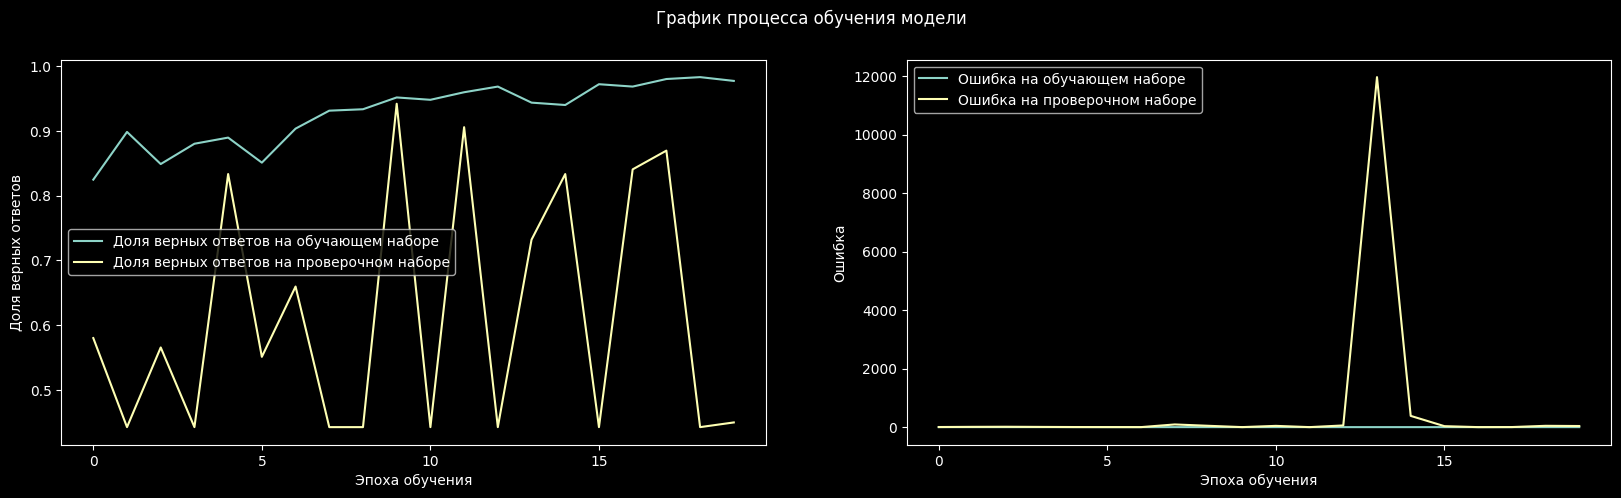

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [1600_1650] - 1-й из 51 

Запущен блок [1650_1700] - 2-й из 51
[1650-1700]=> Paveletskaya_turbo: № 51 -> Длина записи: 1457327; Маркер выборки: 0; Число нарезок: 10
[1650-1700]=> Headliner: № 52 -> Длина записи: 4548143; Маркер выборки: 1; Число нарезок: 33
[1650-1700]=> Paveletskaya_turbo: № 53 -> Длина записи: 275951; Маркер выборки: 0; Число нарезок: 2
[1650-1700]=> Headliner: № 54 -> Длина записи: 5041775; Маркер выборки: 1; Число нарезок: 36
[1650-1700]=> Paveletskaya_turbo: № 55 -> Длина записи: 5372399; Маркер выборки: 0; Число нарезок: 38
[1650-1700]=> Headliner: № 56 -> Длина записи: 855407; Маркер выборки: 1; Число нарезок: 6
[1650-1700]=> Paveletskaya_turbo: № 57 -> Длина записи: 77231; Маркер выборки: 0; Число нарезок: 0
[1650-1700]=> Headliner: № 58 -> Длина записи: 2176751; Маркер выборки: 1; Число нарезок: 15
[1650-1700]=> Paveletskaya_turbo: № 59 -> Длина записи: 3480815; Маркер выборки: 0; Число нарезок: 25
[1650-1700]=> Headliner: № 60 -> Длина записи: 1

In [ ]:
with timex():
  neuro_au()

In [ ]:
def neuro_au():
  #
  # Параметры настройки нарезки обучения и слоёв модели
  #
  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]

  #Размер пулинга
  pull_size = PULL_SIZE

  # Количество фильтров (параметр filters в Conv1D ) в сверточных слоях
  # в каждом из классифицирующих блоков
  sections = SECTIONS

  conv_pull_blocks = len(sections) # Число классифицирующих блоков (свертка + пулинг)

  strider = CONV_STRIDE_1 # stride на 1-м слое

  # Расчёт нарезки аудиофайлов при подаче на 1-й слой НС.
  # Т.е. длина кусочков, на которые мы нарезаем исходный сигнал
  # Количество фильтров (sections), их ядра и размер пуллинга подбираются из расчёта
  # получить размерность выхода 1 на последней свёртке
  audio_slicing_size = strider * (pull_size ** conv_pull_blocks)

  # print("Длина нарезки аудиофайла: ", audio_slicing_size)

  #### Борьба с вылетами по оперпамяти: работаем по частям с сохранением промежуточных результатовов и отключением виртуальной машины
  ####
  #data_number_ = 0
  #df_pre_train_ = df_pre_train[df_pre_train.DataNumber == data_number_]
  df_pre_train_ = df_pre_train
  #
  a_files_count_ = 0

  # Проходимся по всем аудиофайлам
  ## for au_name_ in df_pre_train_.AudioFile:
  # df_pre_train_.shape[0] = 6115

  #####
  ##### Основной цикл: создания блока выборок, запуска обучения, сохранения модели
  #####

  # Счётчик блоков аудиофайлов
  tr_block_number_ = 0
  tr_block_count_ = len(TR_BLOCKS)

  # Счётчики Целевой/Нецелевой по выборркам обучения
  X_Marker_0 = 0
  X_Marker_1 = 0
  XV_Marker_0 = 0
  XV_Marker_1 = 0

  for tr_block_ in TR_BLOCKS:
    tr_block_number_ += 1
    blk_ = '['+str(tr_block_[0])+'_'+str(tr_block_[1])+']'
    print(f'\nЗапущен блок {blk_} - {tr_block_number_}-й из {tr_block_count_}')
    # Обучающая выборка
    X_train1 = []
    Y_train1 = []
    # Валидационная выборка
    X_train1V = []
    Y_train1V = []
    # Тестовая выборка
    X_test1 = []
    Y_test1 = []
    for i in range(tr_block_[0], tr_block_[1]):

      start_time = time.time()
      a_files_count_ +=1

      au_name_ = df_pre_train_.loc[i]['AudioFile']

      ## data_number_ = df_pre_train_.iloc[df_pre_train_[df_pre_train_.AudioFile == au_name_].index[0]]['DataNumber']
      data_number_ = df_pre_train_.loc[i]['DataNumber']

      try:
        y, sr = librosa.load(audio_path_[data_number_]+'/'+au_name_, mono=True, sr=SR) #Загружаем аудиофайл
      except LibsndfileError:
        print(f'Ошибка обработки файла: {audio_path_[data_number_]+"/"+au_name_}')
        continue
      except FileNotFoundError:
        print(f'Не найден файл: {audio_path_[data_number_]+"/"+au_name_}')
        continue

      au_len_ = len(y) # Количество сигналов

      # Значение маркера текущего аудиофайла
      ## training_marker_ = df_pre_train_.iloc[df_pre_train_[df_pre_train_.AudioFile == au_name_].index[0]]['Tags']
      training_marker_ = df_pre_train_.loc[i]['Tags']
      ohe_marker_ = lambda training_marker_: [1, 0] if training_marker_ == 0 else [0, 1]

#      print(f'\n<<<<< [{tr_block_[0]}-{tr_block_[1]}]=> {name_list_[data_number_]}: № {a_files_count_} -> {au_name_} >>>>>')
#      print(f'      Длина записи: {au_len_}; Маркер выборки: {training_marker_}; Длина нарезки: {audio_slicing_size}; Число нарезок: {round(au_len_//audio_slicing_size)}')
      print(f'[{tr_block_[0]}-{tr_block_[1]}]=> {name_list_[data_number_]}: № {a_files_count_} -> Длина записи: {au_len_}; Маркер выборки: {training_marker_}; Число нарезок: {round(au_len_//audio_slicing_size)}',
            end='\n')

      counter = 0 # Счетчик обработанных аудиоданных
      pos = 0 # Указатель на начало вырезки аудио

      while (pos + audio_slicing_size < len(y)):  # Пробегаем по файлу
        counter+=1
        if counter % 10 != 0: # ~ 80% - 90% режем в обучение
          if counter % 12 == 0: # Отстегнём в тестовую выборку из обучающей
            X_test1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в тестовую выборку
            Y_test1.append(ohe_marker_(training_marker_)) # Соответствующий маркер в Ytest
          else:
            X_train1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в обучающую выборку
            Y_train1.append(ohe_marker_(training_marker_)) # Соответствующий маркер в YTrain
            if training_marker_ == 0:
              X_Marker_0 += 1
            else:
              X_Marker_1 += 1
        else: # В валидационную выборку
          X_train1V.append(y[pos: pos + audio_slicing_size]) #  Вырезаем часть размером нарезки и добавляем в валидационную выборку
          Y_train1V.append(ohe_marker_(training_marker_)) # Маркер для проверки
          if training_marker_ == 0:
            XV_Marker_0 += 1
          else:
            XV_Marker_1 += 1
        pos += audio_slicing_size // CUTTING_PART_TRAIN # Шаг сдвига нарезки

  #    print(f'len(X_train1) = {len(X_train1)}')
  #    print(f'len(Y_train1) = {len(Y_train1)}')
  #    print(f'len(X_train1V) = {len(X_train1V)}')
  #    print(f'len(Y_train1V) = {len(Y_train1V)}')
  #    print(f'len(X_test1) = {len(X_test1)}')
  #    print(f'len(Y_test1) = {len(Y_test1)}')
  #    print(f'Время обработки файла: {round((time.time()-start_time)/60, 2)} минут')
      # print(f'Ообработано аудиофайлов: {a_files_count_}')

  #  print('Сохраняем...')

  #  with open(DUMP+'/X_train1_'+blk_+'.pkl', 'wb') as pickle_out:
  #    pkl.dump(X_train1, pickle_out)
  #  with open(DUMP+'/Y_train1_'+blk_+'.pkl', 'wb') as pickle_out:
  #    pkl.dump(Y_train1, pickle_out)
  #  with open(DUMP+'/X_train1V_'+blk_+'.pkl', 'wb') as pickle_out:
  #    pkl.dump(X_train1V, pickle_out)
  #  with open(DUMP+'/Y_train1V_'+blk_+'.pkl', 'wb') as pickle_out:
  #    pkl.dump(Y_train1V, pickle_out)
    with open(DUMP+'/X_test1_'+blk_+'.pkl', 'wb') as pickle_out:
      pkl.dump(X_test1, pickle_out)
    with open(DUMP+'/Y_test1_'+blk_+'.pkl', 'wb') as pickle_out:
      pkl.dump(Y_test1, pickle_out)

    del X_test1
    del Y_test1

    ##########################3
  #  print('Переводим в numpy...')
    X_train1 = np.array(X_train1)
    Y_train1 = np.array(Y_train1)

    X_train1V = np.array(X_train1V)
    Y_train1V = np.array(Y_train1V)

  #  X_test1 = np.array(X_test1)
  #  Y_test1 = np.array(Y_test1)

  #  print('Перемешиваем...')
    X_train1, Y_train1 = shuffle(X_train1, Y_train1)

  #  print('Добавляем измерение для свёртки...')
    X_train1 = np.expand_dims(X_train1, axis=2)
    X_train1V = np.expand_dims(X_train1V, axis=2)

#    if 'model_au' not in locals(): # Если вошли в начале цикла обучения, - создание и компиляция модели
#     model_au = create_compile_model()
  #  else: # Читаем сохранённую модель с диска
  #   model_au = load_model(DUMP + '/model_au.h5')

    if 'model_au' not in locals():
      model_au = load_model(DUMP + '/model_au.h5')

    print("\nXTrain1.shape: ", X_train1.shape)
    print("YTrain1.shape: ", Y_train1.shape)
    print("XTrain1V.shape: ", X_train1V.shape)
    print("YTrain1V.shape: ", Y_train1V.shape)

    print(f'Обучающая выборка X_Train1 - Целевых: {X_Marker_1}; Нецелевых: {X_Marker_0}')
    print(f'Валидационная выборка X_Train1V - Целевых: {XV_Marker_1}; Нецелевых: {XV_Marker_0}')

    # Обучаем
    trainModel(model_au, X_train1, Y_train1, X_train1V, Y_train1V, batch_size=32, epochs=20)
    # Сохраняем
    model_au.save(DUMP + '/model_au.h5')

    del X_train1
    del Y_train1
    del X_train1V
    del Y_train1V

    print(f'Завершён блок {blk_} - {tr_block_number_}-й из {tr_block_count_} ')

  print('Завершено обучение всех запущенных блоков.')



Запущен блок [1650_1700] - 1-й из 50
[1650-1700]=> Paveletskaya_turbo: № 1 -> Длина записи: 1457327; Маркер выборки: 0; Число нарезок: 10
[1650-1700]=> Headliner: № 2 -> Длина записи: 4548143; Маркер выборки: 1; Число нарезок: 33
[1650-1700]=> Paveletskaya_turbo: № 3 -> Длина записи: 275951; Маркер выборки: 0; Число нарезок: 2
[1650-1700]=> Headliner: № 4 -> Длина записи: 5041775; Маркер выборки: 1; Число нарезок: 36
[1650-1700]=> Paveletskaya_turbo: № 5 -> Длина записи: 5372399; Маркер выборки: 0; Число нарезок: 38
[1650-1700]=> Headliner: № 6 -> Длина записи: 855407; Маркер выборки: 1; Число нарезок: 6
[1650-1700]=> Paveletskaya_turbo: № 7 -> Длина записи: 77231; Маркер выборки: 0; Число нарезок: 0
[1650-1700]=> Headliner: № 8 -> Длина записи: 2176751; Маркер выборки: 1; Число нарезок: 15
[1650-1700]=> Paveletskaya_turbo: № 9 -> Длина записи: 3480815; Маркер выборки: 0; Число нарезок: 25
[1650-1700]=> Headliner: № 10 -> Длина записи: 1000559; Маркер выборки: 1; Число нарезок: 7
[165

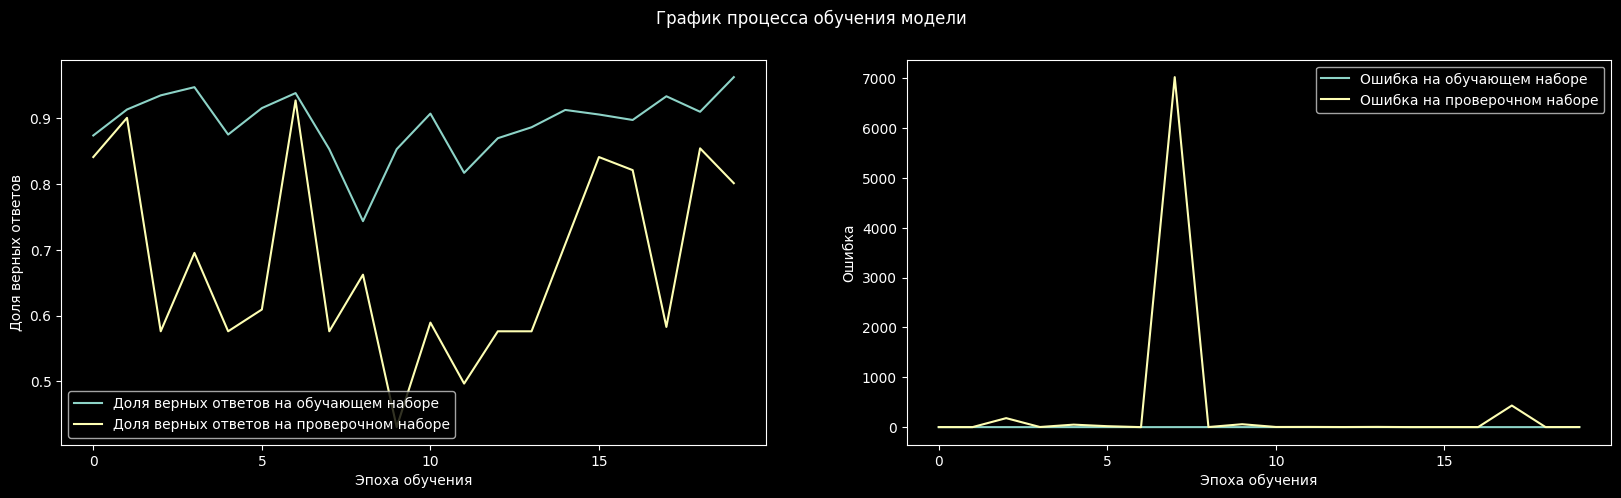

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [1650_1700] - 1-й из 50 

Запущен блок [1700_1750] - 2-й из 50
[1700-1750]=> Paveletskaya_turbo: № 51 -> Длина записи: 121007; Маркер выборки: 0; Число нарезок: 0
[1700-1750]=> Headliner: № 52 -> Длина записи: 5929391; Маркер выборки: 1; Число нарезок: 43
[1700-1750]=> Paveletskaya_turbo: № 53 -> Длина записи: 158447; Маркер выборки: 0; Число нарезок: 1
[1700-1750]=> Headliner: № 54 -> Длина записи: 2566703; Маркер выборки: 1; Число нарезок: 18
[1700-1750]=> Paveletskaya_turbo: № 55 -> Длина записи: 1812719; Маркер выборки: 0; Число нарезок: 13
[1700-1750]=> Headliner: № 56 -> Длина записи: 1709615; Маркер выборки: 1; Число нарезок: 12
[1700-1750]=> Paveletskaya_turbo: № 57 -> Длина записи: 147503; Маркер выборки: 0; Число нарезок: 1
[1700-1750]=> Headliner: № 58 -> Длина записи: 3687023; Маркер выборки: 1; Число нарезок: 26
[1700-1750]=> Paveletskaya_turbo: № 59 -> Длина записи: 142319; Маркер выборки: 0; Число нарезок: 1
[1700-1750]=> Headliner: № 60 -> Длина записи: 16

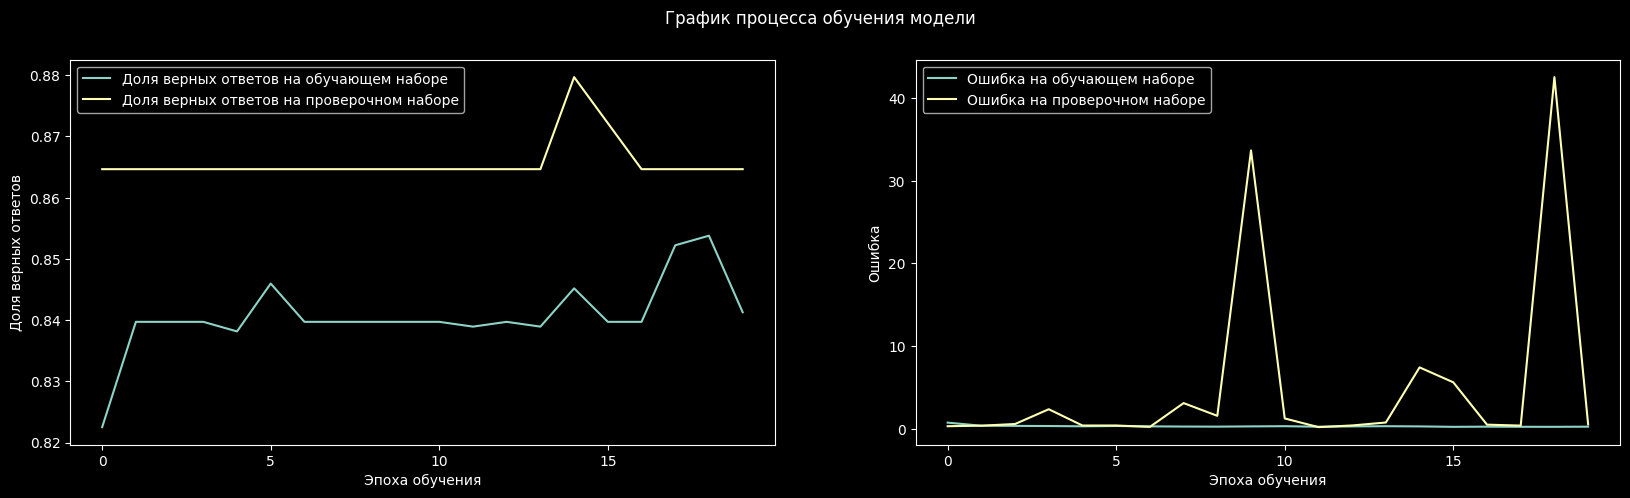

Завершён блок [1700_1750] - 2-й из 50 

Запущен блок [1750_1800] - 3-й из 50
[1750-1800]=> Paveletskaya_turbo: № 101 -> Длина записи: 183215; Маркер выборки: 0; Число нарезок: 1
[1750-1800]=> Paveletskaya_city: № 102 -> Длина записи: 5290607; Маркер выборки: 1; Число нарезок: 38
[1750-1800]=> Paveletskaya_turbo: № 103 -> Длина записи: 29999; Маркер выборки: 0; Число нарезок: 0
[1750-1800]=> Paveletskaya_city: № 104 -> Длина записи: 5114351; Маркер выборки: 1; Число нарезок: 37
[1750-1800]=> Paveletskaya_turbo: № 105 -> Длина записи: 1061039; Маркер выборки: 0; Число нарезок: 7
[1750-1800]=> Paveletskaya_city: № 106 -> Длина записи: 3666287; Маркер выборки: 1; Число нарезок: 26
[1750-1800]=> Paveletskaya_turbo: № 107 -> Длина записи: 24239; Маркер выборки: 0; Число нарезок: 0
[1750-1800]=> Paveletskaya_city: № 108 -> Длина записи: 3981935; Маркер выборки: 1; Число нарезок: 28
[1750-1800]=> Paveletskaya_turbo: № 109 -> Длина записи: 1226927; Маркер выборки: 0; Число нарезок: 8
[1750-1800

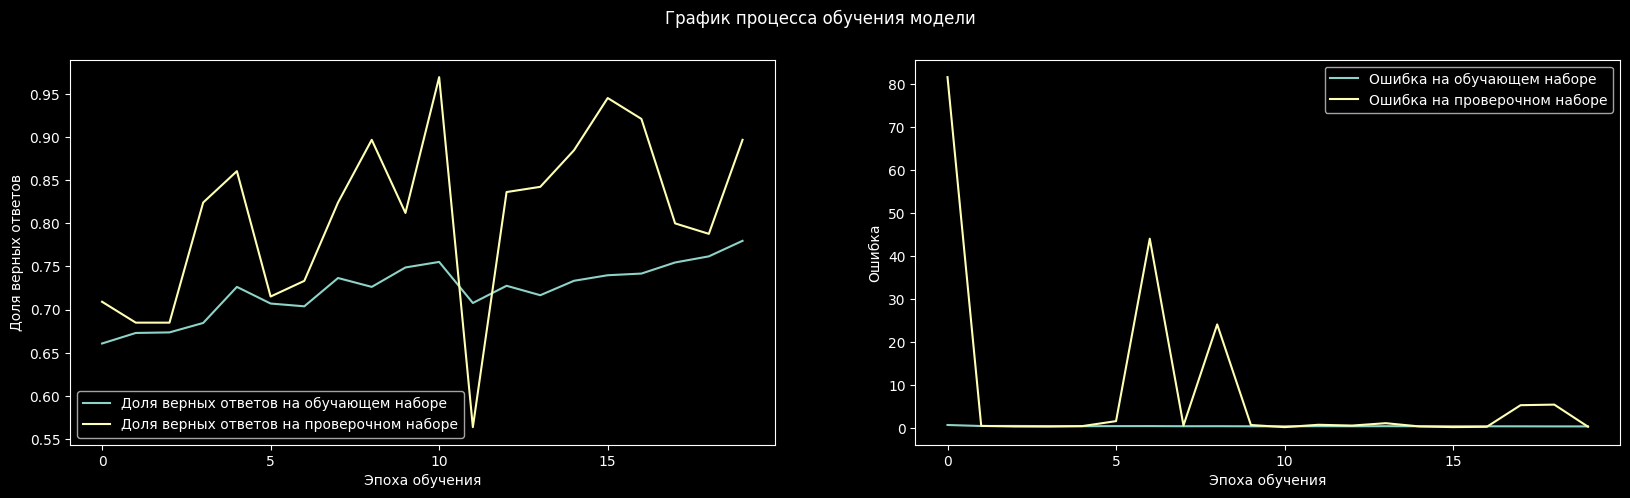

Завершён блок [1750_1800] - 3-й из 50 

Запущен блок [1800_1850] - 4-й из 50
[1800-1850]=> Paveletskaya_turbo: № 151 -> Длина записи: 217199; Маркер выборки: 0; Число нарезок: 1
[1800-1850]=> Paveletskaya_city: № 152 -> Длина записи: 2408303; Маркер выборки: 1; Число нарезок: 17
[1800-1850]=> Paveletskaya_turbo: № 153 -> Длина записи: 284591; Маркер выборки: 0; Число нарезок: 2
[1800-1850]=> Paveletskaya_city: № 154 -> Длина записи: 3388655; Маркер выборки: 1; Число нарезок: 24
[1800-1850]=> Paveletskaya_turbo: № 155 -> Длина записи: 3352943; Маркер выборки: 0; Число нарезок: 24
[1800-1850]=> Paveletskaya_city: № 156 -> Длина записи: 3702575; Маркер выборки: 1; Число нарезок: 26
[1800-1850]=> Paveletskaya_turbo: № 157 -> Длина записи: 2761391; Маркер выборки: 0; Число нарезок: 20
[1800-1850]=> Paveletskaya_city: № 158 -> Длина записи: 5774447; Маркер выборки: 1; Число нарезок: 41
[1800-1850]=> Paveletskaya_turbo: № 159 -> Длина записи: 207407; Маркер выборки: 0; Число нарезок: 1
[1800-

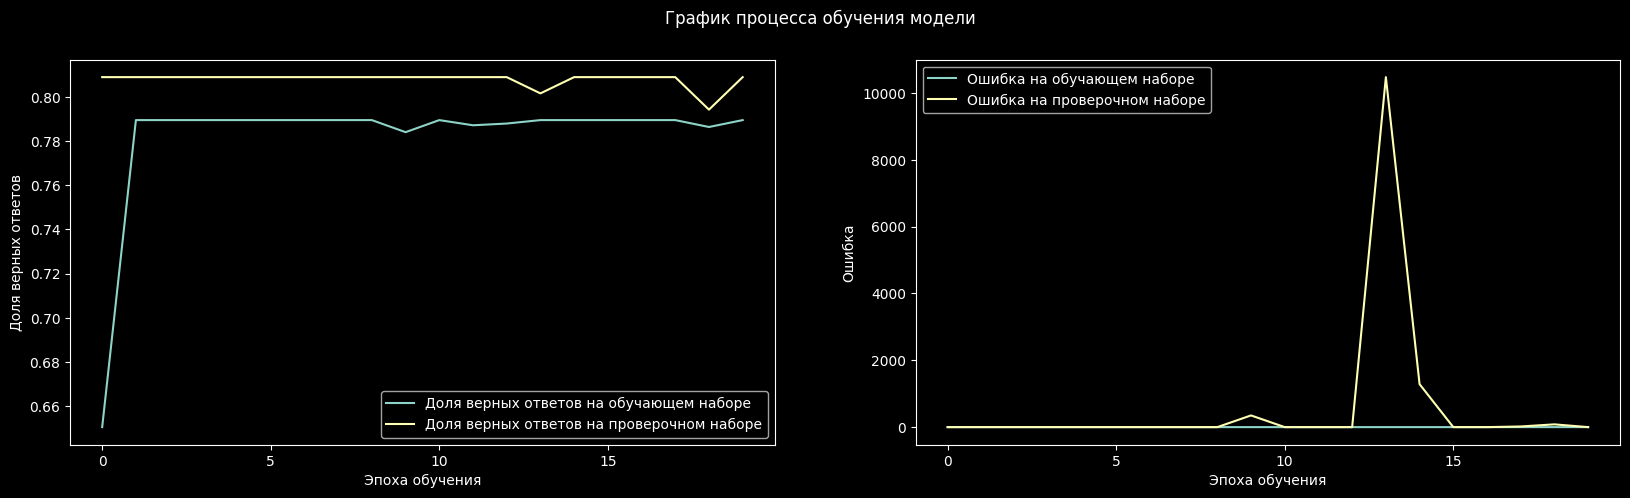

Завершён блок [1800_1850] - 4-й из 50 

Запущен блок [1850_1900] - 5-й из 50
[1850-1900]=> Paveletskaya_turbo: № 201 -> Длина записи: 6476591; Маркер выборки: 0; Число нарезок: 47
[1850-1900]=> Paveletskaya_city: № 202 -> Длина записи: 2100719; Маркер выборки: 1; Число нарезок: 15
[1850-1900]=> Paveletskaya_turbo: № 203 -> Длина записи: 581807; Маркер выборки: 0; Число нарезок: 4
[1850-1900]=> Paveletskaya_city: № 204 -> Длина записи: 5328047; Маркер выборки: 1; Число нарезок: 38
[1850-1900]=> Paveletskaya_turbo: № 205 -> Длина записи: 24239; Маркер выборки: 0; Число нарезок: 0
[1850-1900]=> Paveletskaya_city: № 206 -> Длина записи: 3066095; Маркер выборки: 1; Число нарезок: 22
[1850-1900]=> Paveletskaya_turbo: № 207 -> Длина записи: 3020015; Маркер выборки: 0; Число нарезок: 21
[1850-1900]=> Paveletskaya_city: № 208 -> Длина записи: 1088687; Маркер выборки: 1; Число нарезок: 7
[1850-1900]=> Paveletskaya_turbo: № 209 -> Длина записи: 3261359; Маркер выборки: 0; Число нарезок: 23
[1850-

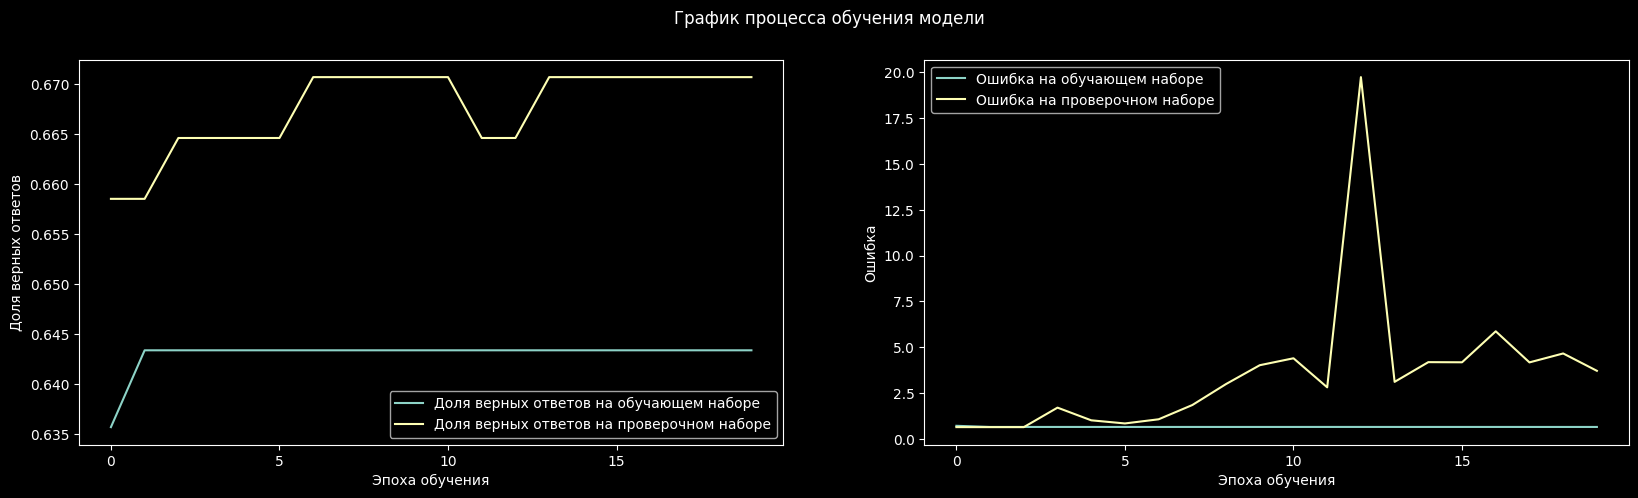

Завершён блок [1850_1900] - 5-й из 50 

Запущен блок [1900_1950] - 6-й из 50
[1900-1950]=> Paveletskaya_turbo: № 251 -> Длина записи: 2524079; Маркер выборки: 0; Число нарезок: 18
[1900-1950]=> Paveletskaya_city: № 252 -> Длина записи: 7539887; Маркер выборки: 1; Число нарезок: 54
[1900-1950]=> Paveletskaya_turbo: № 253 -> Длина записи: 3076463; Маркер выборки: 0; Число нарезок: 22
[1900-1950]=> Paveletskaya_city: № 254 -> Длина записи: 823151; Маркер выборки: 1; Число нарезок: 5
[1900-1950]=> Paveletskaya_turbo: № 255 -> Длина записи: 29999; Маркер выборки: 0; Число нарезок: 0
[1900-1950]=> Paveletskaya_city: № 256 -> Длина записи: 2191151; Маркер выборки: 1; Число нарезок: 15
[1900-1950]=> Paveletskaya_turbo: № 257 -> Длина записи: 21359; Маркер выборки: 0; Число нарезок: 0
[1900-1950]=> Paveletskaya_city: № 258 -> Длина записи: 876719; Маркер выборки: 1; Число нарезок: 6
[1900-1950]=> Paveletskaya_turbo: № 259 -> Длина записи: 307631; Маркер выборки: 0; Число нарезок: 2
[1900-1950]=

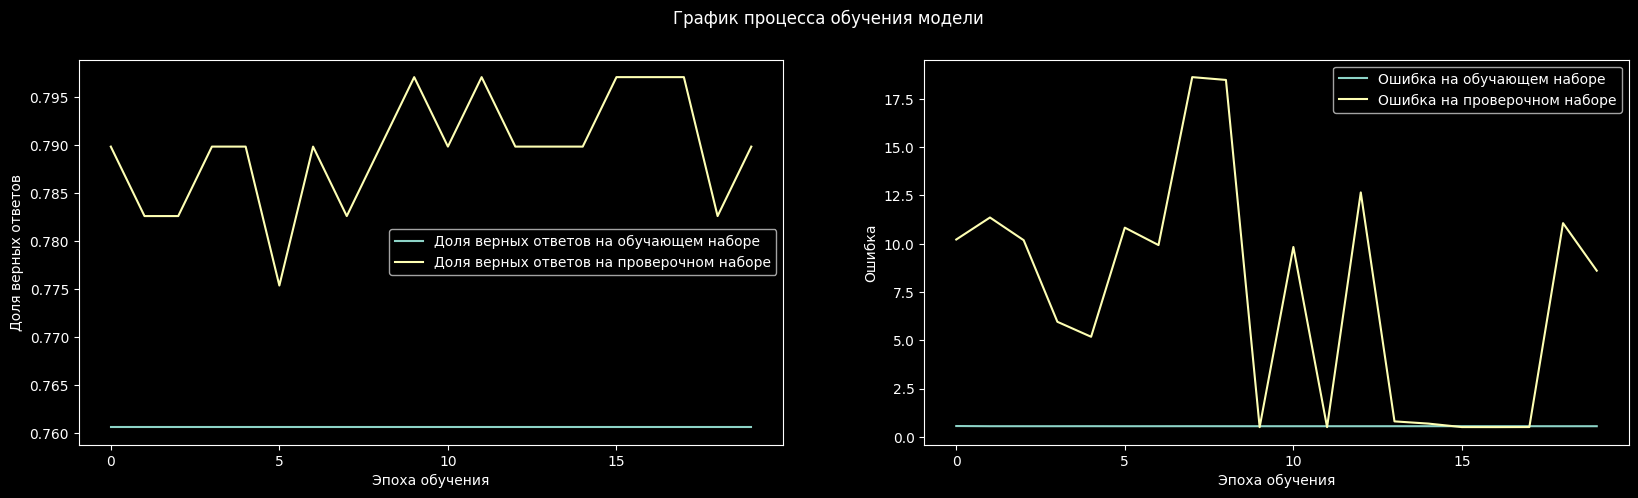

Завершён блок [1900_1950] - 6-й из 50 

Запущен блок [1950_2000] - 7-й из 50
[1950-2000]=> Paveletskaya_turbo: № 301 -> Длина записи: 180911; Маркер выборки: 0; Число нарезок: 1
[1950-2000]=> Paveletskaya_city: № 302 -> Длина записи: 1812719; Маркер выборки: 1; Число нарезок: 13
[1950-2000]=> Paveletskaya_turbo: № 303 -> Длина записи: 229295; Маркер выборки: 0; Число нарезок: 1
[1950-2000]=> Paveletskaya_city: № 304 -> Длина записи: 4000943; Маркер выборки: 1; Число нарезок: 29
[1950-2000]=> Paveletskaya_turbo: № 305 -> Длина записи: 43823; Маркер выборки: 0; Число нарезок: 0
[1950-2000]=> Paveletskaya_city: № 306 -> Длина записи: 1604783; Маркер выборки: 1; Число нарезок: 11
[1950-2000]=> Paveletskaya_turbo: № 307 -> Длина записи: 254063; Маркер выборки: 0; Число нарезок: 1
[1950-2000]=> Paveletskaya_city: № 308 -> Длина записи: 1226927; Маркер выборки: 1; Число нарезок: 8
[1950-2000]=> Paveletskaya_turbo: № 309 -> Длина записи: 44399; Маркер выборки: 0; Число нарезок: 0
[1950-2000]=>

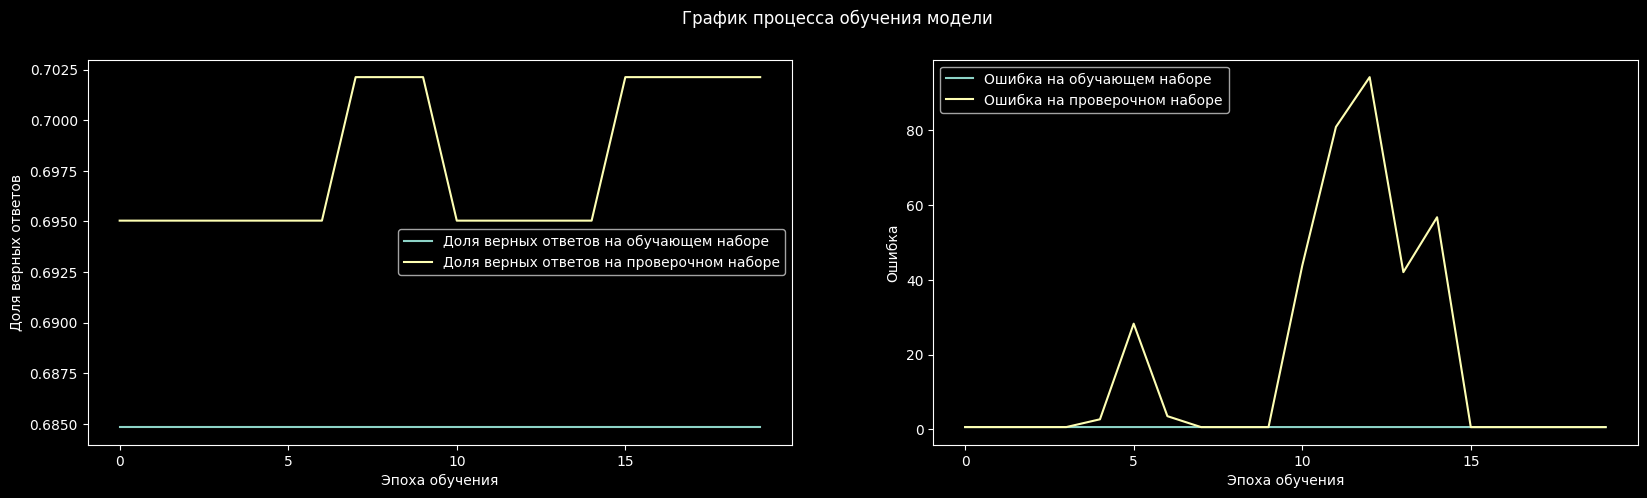

Завершён блок [1950_2000] - 7-й из 50 

Запущен блок [2000_2050] - 8-й из 50
[2000-2050]=> Paveletskaya_turbo: № 351 -> Длина записи: 821423; Маркер выборки: 0; Число нарезок: 5
[2000-2050]=> Paveletskaya_city: № 352 -> Длина записи: 4502063; Маркер выборки: 1; Число нарезок: 32
[2000-2050]=> Paveletskaya_turbo: № 353 -> Длина записи: 2388143; Маркер выборки: 0; Число нарезок: 17
[2000-2050]=> Paveletskaya_city: № 354 -> Длина записи: 6594671; Маркер выборки: 1; Число нарезок: 47
[2000-2050]=> Paveletskaya_turbo: № 355 -> Длина записи: 2480303; Маркер выборки: 0; Число нарезок: 18
[2000-2050]=> Paveletskaya_city: № 356 -> Длина записи: 4121903; Маркер выборки: 1; Число нарезок: 29
[2000-2050]=> Paveletskaya_turbo: № 357 -> Длина записи: 4222703; Маркер выборки: 0; Число нарезок: 30
[2000-2050]=> Paveletskaya_city: № 358 -> Длина записи: 4616687; Маркер выборки: 1; Число нарезок: 33
[2000-2050]=> Paveletskaya_turbo: № 359 -> Длина записи: 5974895; Маркер выборки: 0; Число нарезок: 43
[2

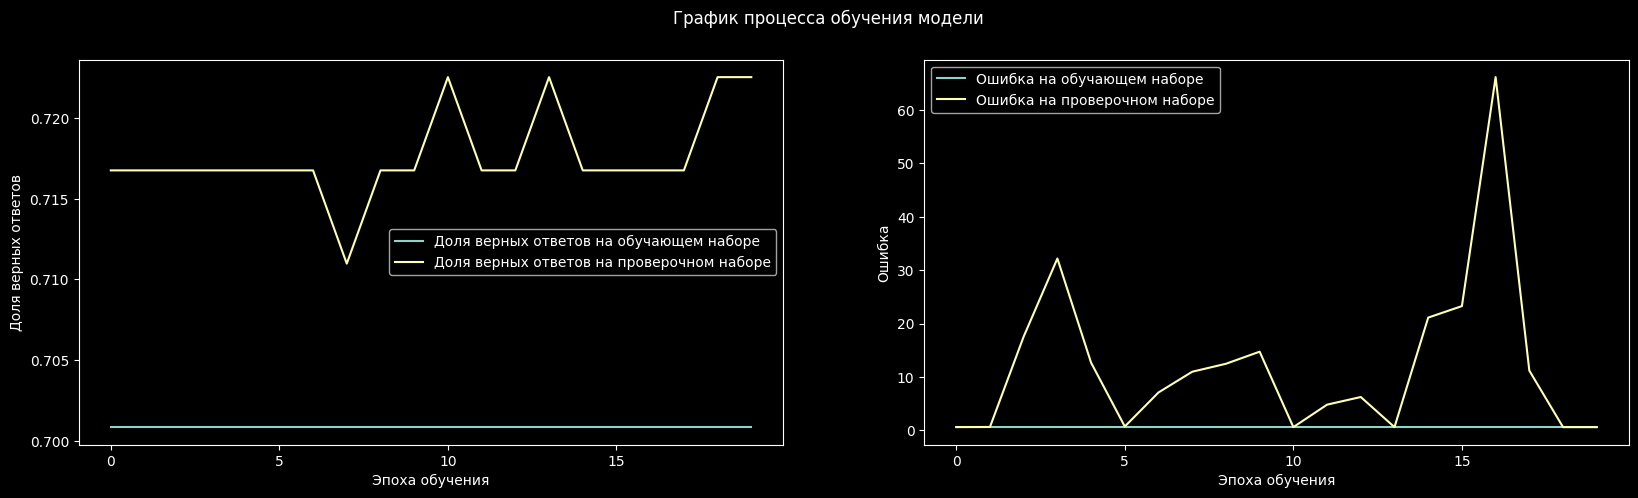

Завершён блок [2000_2050] - 8-й из 50 

Запущен блок [2050_2100] - 9-й из 50
[2050-2100]=> Paveletskaya_turbo: № 401 -> Длина записи: 36911; Маркер выборки: 0; Число нарезок: 0
[2050-2100]=> Paveletskaya_city: № 402 -> Длина записи: 3946223; Маркер выборки: 1; Число нарезок: 28
[2050-2100]=> Paveletskaya_turbo: № 403 -> Длина записи: 1407791; Маркер выборки: 0; Число нарезок: 10
[2050-2100]=> Paveletskaya_city: № 404 -> Длина записи: 5455919; Маркер выборки: 1; Число нарезок: 39
[2050-2100]=> Paveletskaya_turbo: № 405 -> Длина записи: 1525871; Маркер выборки: 0; Число нарезок: 11
[2050-2100]=> Paveletskaya_city: № 406 -> Длина записи: 1322543; Маркер выборки: 1; Число нарезок: 9
[2050-2100]=> Paveletskaya_turbo: № 407 -> Длина записи: 5601071; Маркер выборки: 0; Число нарезок: 40
[2050-2100]=> Paveletskaya_city: № 408 -> Длина записи: 4464623; Маркер выборки: 1; Число нарезок: 32
[2050-2100]=> Paveletskaya_turbo: № 409 -> Длина записи: 817391; Маркер выборки: 0; Число нарезок: 5
[2050-

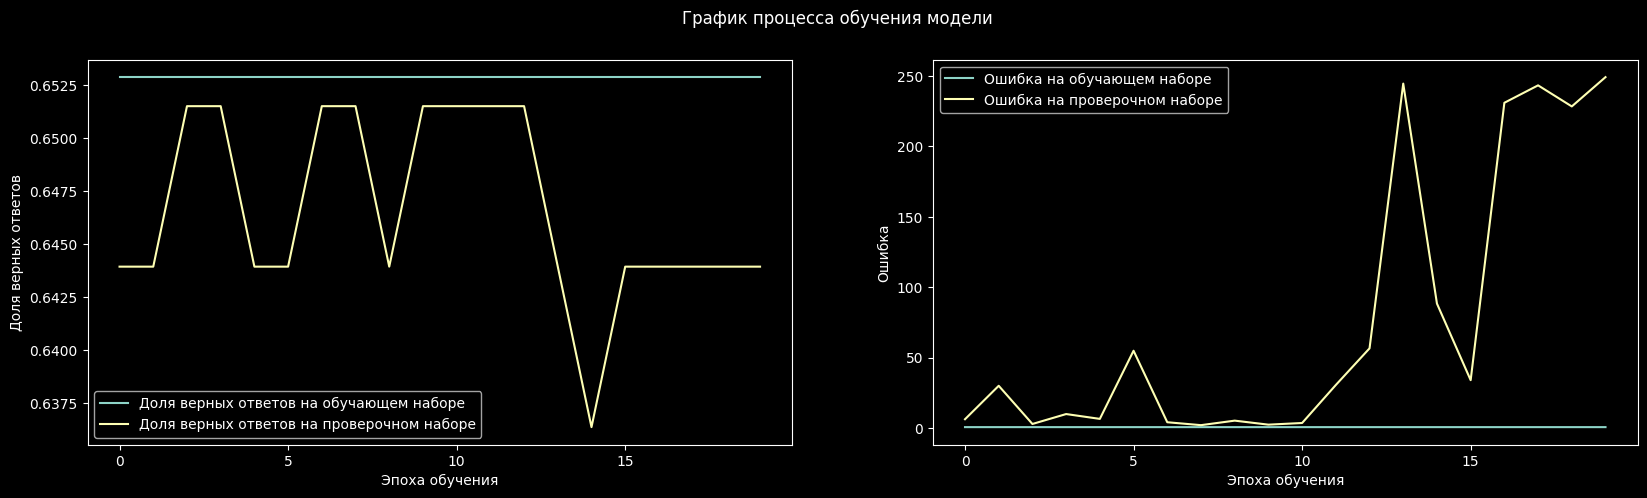

Завершён блок [2050_2100] - 9-й из 50 

Запущен блок [2100_2150] - 10-й из 50
[2100-2150]=> Paveletskaya_turbo: № 451 -> Длина записи: 16751; Маркер выборки: 0; Число нарезок: 0
[2100-2150]=> Paveletskaya_city: № 452 -> Длина записи: 323759; Маркер выборки: 1; Число нарезок: 2
[2100-2150]=> Paveletskaya_turbo: № 453 -> Длина записи: 350255; Маркер выборки: 0; Число нарезок: 2
[2100-2150]=> Paveletskaya_city: № 454 -> Длина записи: 1397999; Маркер выборки: 1; Число нарезок: 10
[2100-2150]=> Paveletskaya_turbo: № 455 -> Длина записи: 5907503; Маркер выборки: 0; Число нарезок: 42
[2100-2150]=> Paveletskaya_city: № 456 -> Длина записи: 3902447; Маркер выборки: 1; Число нарезок: 28
[2100-2150]=> Paveletskaya_turbo: № 457 -> Длина записи: 1340399; Маркер выборки: 0; Число нарезок: 9
[2100-2150]=> Paveletskaya_city: № 458 -> Длина записи: 600815; Маркер выборки: 1; Число нарезок: 4
[2100-2150]=> Paveletskaya_turbo: № 459 -> Длина записи: 56495; Маркер выборки: 0; Число нарезок: 0
[2100-2150]=

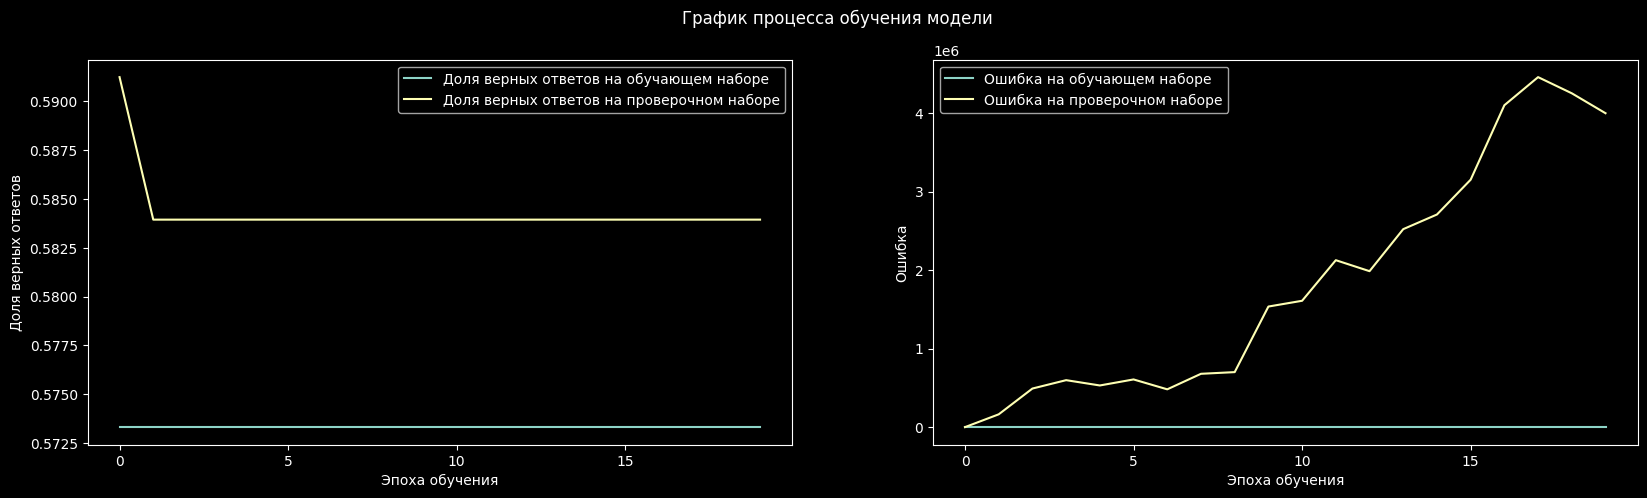

Завершён блок [2100_2150] - 10-й из 50 

Запущен блок [2150_2200] - 11-й из 50
[2150-2200]=> Paveletskaya_turbo: № 501 -> Длина записи: 40943; Маркер выборки: 0; Число нарезок: 0
[2150-2200]=> Paveletskaya_city: № 502 -> Длина записи: 1764335; Маркер выборки: 1; Число нарезок: 12
[2150-2200]=> Paveletskaya_turbo: № 503 -> Длина записи: 2177327; Маркер выборки: 0; Число нарезок: 15
[2150-2200]=> Paveletskaya_city: № 504 -> Длина записи: 1442927; Маркер выборки: 1; Число нарезок: 10
[2150-2200]=> Paveletskaya_turbo: № 505 -> Длина записи: 1067951; Маркер выборки: 0; Число нарезок: 7
[2150-2200]=> Paveletskaya_city: № 506 -> Длина записи: 2703791; Маркер выборки: 1; Число нарезок: 19
[2150-2200]=> Paveletskaya_turbo: № 507 -> Длина записи: 294383; Маркер выборки: 0; Число нарезок: 2
[2150-2200]=> Paveletskaya_city: № 508 -> Длина записи: 2498159; Маркер выборки: 1; Число нарезок: 18
[2150-2200]=> Paveletskaya_turbo: № 509 -> Длина записи: 1857071; Маркер выборки: 0; Число нарезок: 13
[215

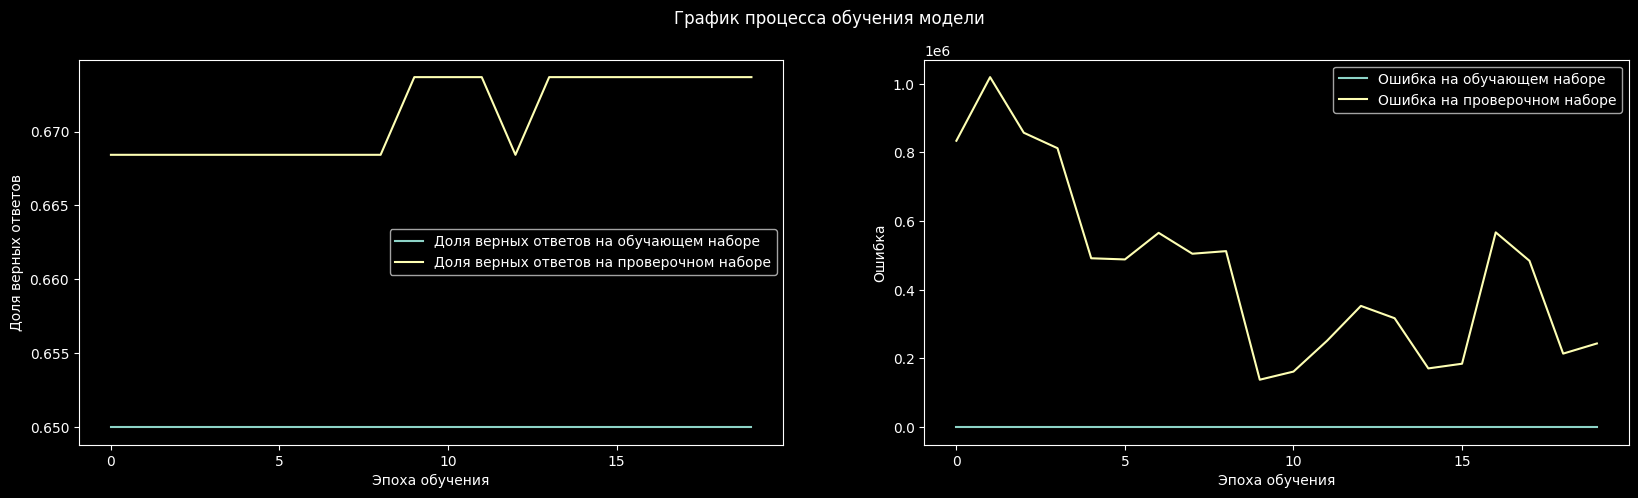

Завершён блок [2150_2200] - 11-й из 50 

Запущен блок [2200_2250] - 12-й из 50
[2200-2250]=> Paveletskaya_turbo: № 551 -> Длина записи: 522479; Маркер выборки: 0; Число нарезок: 3
[2200-2250]=> Paveletskaya_city: № 552 -> Длина записи: 1654319; Маркер выборки: 1; Число нарезок: 12
[2200-2250]=> Paveletskaya_turbo: № 553 -> Длина записи: 112943; Маркер выборки: 0; Число нарезок: 0
[2200-2250]=> Paveletskaya_city: № 554 -> Длина записи: 610031; Маркер выборки: 1; Число нарезок: 4
[2200-2250]=> Paveletskaya_turbo: № 555 -> Длина записи: 3002159; Маркер выборки: 0; Число нарезок: 21
[2200-2250]=> Paveletskaya_city: № 556 -> Длина записи: 1174511; Маркер выборки: 1; Число нарезок: 8
[2200-2250]=> Paveletskaya_turbo: № 557 -> Длина записи: 797231; Маркер выборки: 0; Число нарезок: 5
[2200-2250]=> Paveletskaya_city: № 558 -> Длина записи: 4247471; Маркер выборки: 1; Число нарезок: 30
[2200-2250]=> Paveletskaya_turbo: № 559 -> Длина записи: 297263; Маркер выборки: 0; Число нарезок: 2
[2200-225

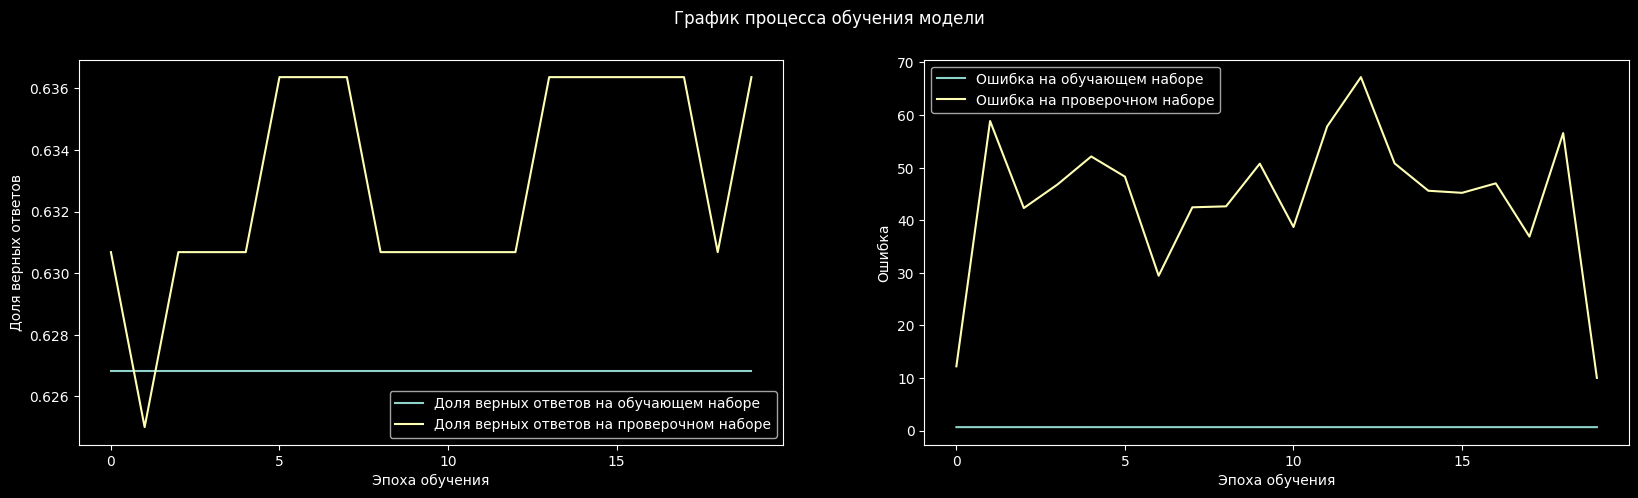

Завершён блок [2200_2250] - 12-й из 50 

Запущен блок [2250_2300] - 13-й из 50
[2250-2300]=> Paveletskaya_turbo: № 601 -> Длина записи: 585839; Маркер выборки: 0; Число нарезок: 4
[2250-2300]=> Paveletskaya_city: № 602 -> Длина записи: 358895; Маркер выборки: 1; Число нарезок: 2
[2250-2300]=> Paveletskaya_turbo: № 603 -> Длина записи: 699311; Маркер выборки: 0; Число нарезок: 5
[2250-2300]=> Paveletskaya_city: № 604 -> Длина записи: 8861231; Маркер выборки: 1; Число нарезок: 64
[2250-2300]=> Paveletskaya_turbo: № 605 -> Длина записи: 1384751; Маркер выборки: 0; Число нарезок: 10
[2250-2300]=> Paveletskaya_city: № 606 -> Длина записи: 5132783; Маркер выборки: 1; Число нарезок: 37
[2250-2300]=> Paveletskaya_turbo: № 607 -> Длина записи: 50159; Маркер выборки: 0; Число нарезок: 0
[2250-2300]=> Paveletskaya_city: № 608 -> Длина записи: 2591471; Маркер выборки: 1; Число нарезок: 18
[2250-2300]=> Paveletskaya_turbo: № 609 -> Длина записи: 379631; Маркер выборки: 0; Число нарезок: 2
[2250-230

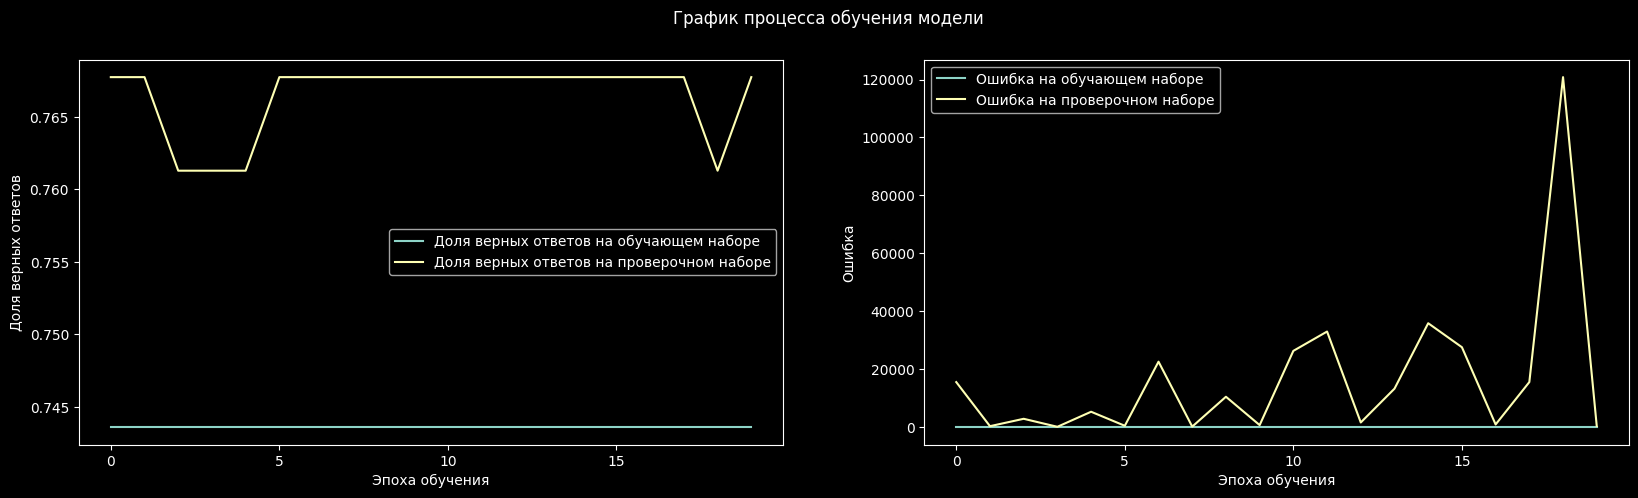

Завершён блок [2250_2300] - 13-й из 50 

Запущен блок [2300_2350] - 14-й из 50
[2300-2350]=> Paveletskaya_turbo: № 651 -> Длина записи: 2804591; Маркер выборки: 0; Число нарезок: 20
[2300-2350]=> Paveletskaya_turbo: № 652 -> Длина записи: 3422639; Маркер выборки: 1; Число нарезок: 24
[2300-2350]=> Paveletskaya_turbo: № 653 -> Длина записи: 3548207; Маркер выборки: 0; Число нарезок: 25
[2300-2350]=> Paveletskaya_turbo: № 654 -> Длина записи: 20248751; Маркер выборки: 1; Число нарезок: 146
[2300-2350]=> Paveletskaya_turbo: № 655 -> Длина записи: 3268271; Маркер выборки: 0; Число нарезок: 23
[2300-2350]=> Paveletskaya_turbo: № 656 -> Длина записи: 380783; Маркер выборки: 1; Число нарезок: 2
[2300-2350]=> Paveletskaya_turbo: № 657 -> Длина записи: 332975; Маркер выборки: 0; Число нарезок: 2
[2300-2350]=> Paveletskaya_turbo: № 658 -> Длина записи: 1726319; Маркер выборки: 1; Число нарезок: 12
[2300-2350]=> Paveletskaya_turbo: № 659 -> Длина записи: 2500463; Маркер выборки: 0; Число нарезок:

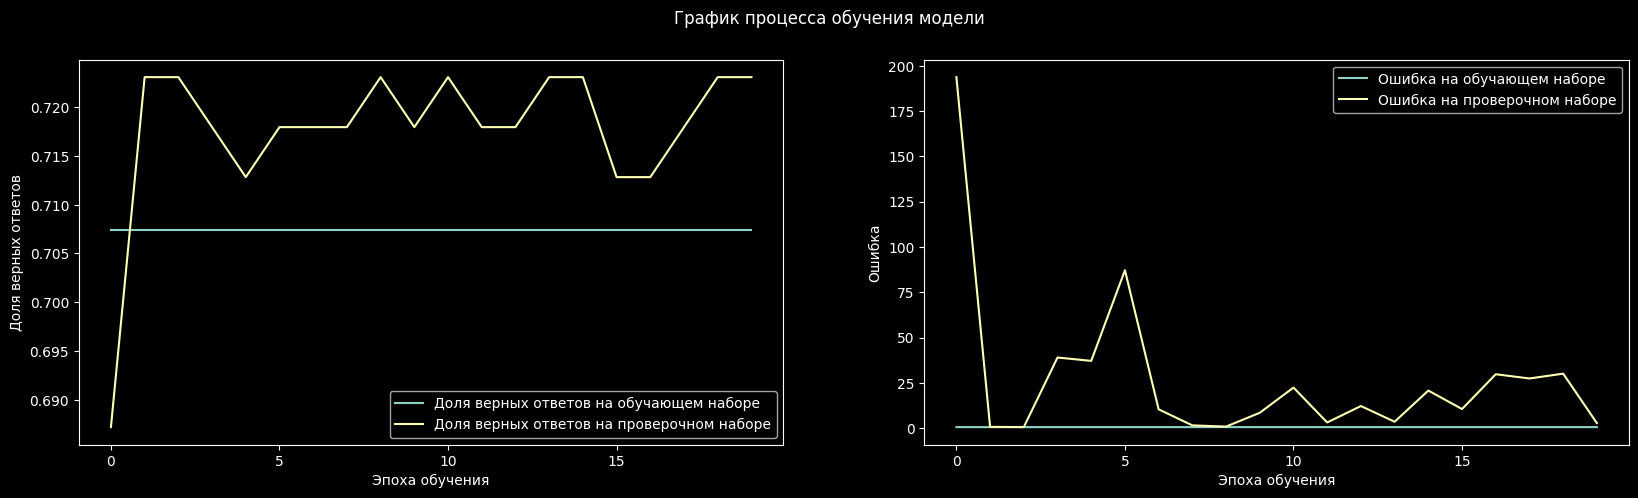

Завершён блок [2300_2350] - 14-й из 50 

Запущен блок [2350_2400] - 15-й из 50
[2350-2400]=> Paveletskaya_turbo: № 701 -> Длина записи: 333551; Маркер выборки: 0; Число нарезок: 2
[2350-2400]=> Paveletskaya_turbo: № 702 -> Длина записи: 4442159; Маркер выборки: 1; Число нарезок: 32
[2350-2400]=> Paveletskaya_turbo: № 703 -> Длина записи: 1007471; Маркер выборки: 0; Число нарезок: 7
[2350-2400]=> Paveletskaya_turbo: № 704 -> Длина записи: 8177519; Маркер выборки: 1; Число нарезок: 59
[2350-2400]=> Paveletskaya_turbo: № 705 -> Длина записи: 387119; Маркер выборки: 0; Число нарезок: 2
[2350-2400]=> Paveletskaya_turbo: № 706 -> Длина записи: 2968751; Маркер выборки: 1; Число нарезок: 21
[2350-2400]=> Paveletskaya_turbo: № 707 -> Длина записи: 351407; Маркер выборки: 0; Число нарезок: 2
[2350-2400]=> Paveletskaya_turbo: № 708 -> Длина записи: 3557999; Маркер выборки: 1; Число нарезок: 25
[2350-2400]=> Paveletskaya_turbo: № 709 -> Длина записи: 280559; Маркер выборки: 0; Число нарезок: 2
[23

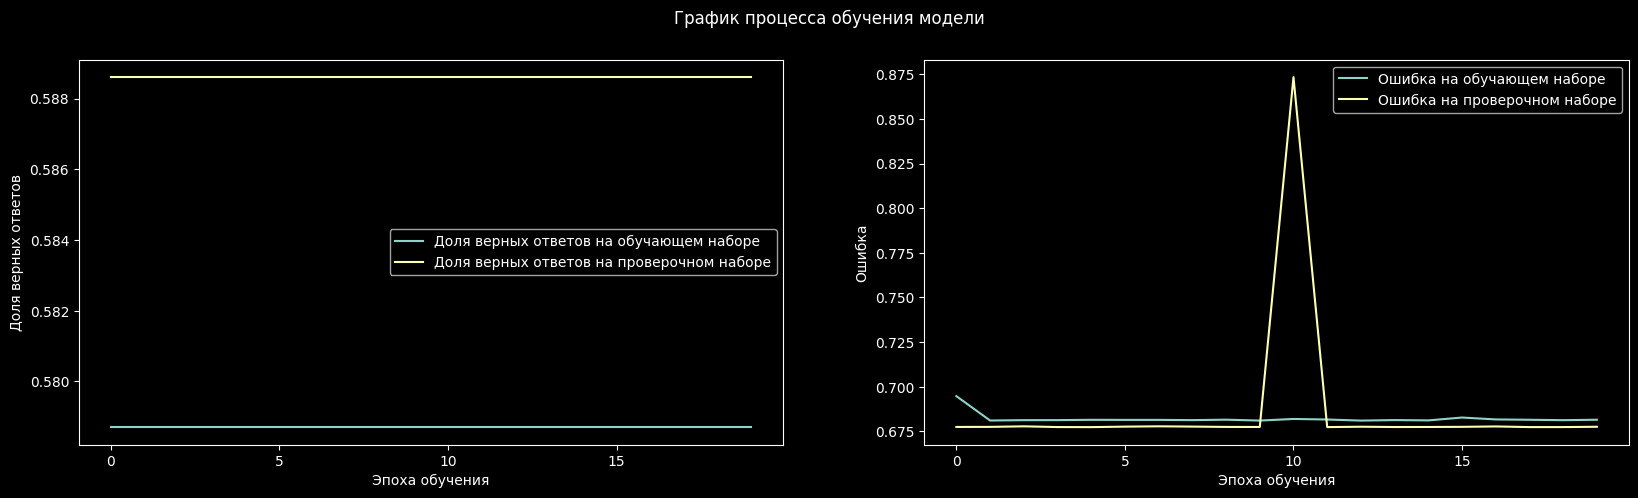

Завершён блок [2350_2400] - 15-й из 50 

Запущен блок [2400_2450] - 16-й из 50
[2400-2450]=> Paveletskaya_turbo: № 751 -> Длина записи: 1637039; Маркер выборки: 0; Число нарезок: 11
[2400-2450]=> Paveletskaya_turbo: № 752 -> Длина записи: 2537903; Маркер выборки: 1; Число нарезок: 18
[2400-2450]=> Paveletskaya_turbo: № 753 -> Длина записи: 195887; Маркер выборки: 0; Число нарезок: 1
[2400-2450]=> Paveletskaya_turbo: № 754 -> Длина записи: 5266991; Маркер выборки: 1; Число нарезок: 38
[2400-2450]=> Paveletskaya_turbo: № 755 -> Длина записи: 220655; Маркер выборки: 0; Число нарезок: 1
[2400-2450]=> Paveletskaya_turbo: № 756 -> Длина записи: 2003951; Маркер выборки: 1; Число нарезок: 14
[2400-2450]=> Paveletskaya_turbo: № 757 -> Длина записи: 2343791; Маркер выборки: 0; Число нарезок: 17
[2400-2450]=> Paveletskaya_turbo: № 758 -> Длина записи: 319151; Маркер выборки: 1; Число нарезок: 2
[2400-2450]=> Paveletskaya_turbo: № 759 -> Длина записи: 2283311; Маркер выборки: 0; Число нарезок: 16


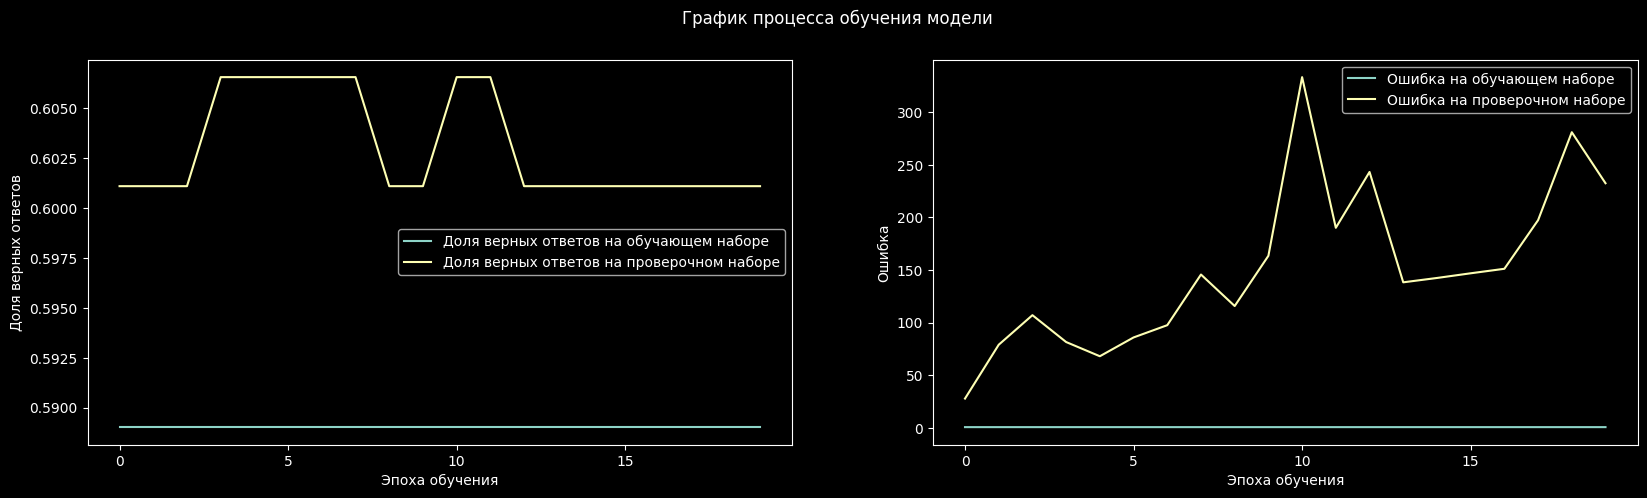

Завершён блок [2400_2450] - 16-й из 50 

Запущен блок [2450_2500] - 17-й из 50
[2450-2500]=> Paveletskaya_turbo: № 801 -> Длина записи: 10687727; Маркер выборки: 0; Число нарезок: 77
[2450-2500]=> Paveletskaya_turbo: № 802 -> Длина записи: 4756079; Маркер выборки: 1; Число нарезок: 34
[2450-2500]=> Paveletskaya_turbo: № 803 -> Длина записи: 131951; Маркер выборки: 0; Число нарезок: 0
[2450-2500]=> Paveletskaya_turbo: № 804 -> Длина записи: 2902511; Маркер выборки: 1; Число нарезок: 21
[2450-2500]=> Paveletskaya_turbo: № 805 -> Длина записи: 2733743; Маркер выборки: 0; Число нарезок: 19
[2450-2500]=> Paveletskaya_turbo: № 806 -> Длина записи: 2039663; Маркер выборки: 1; Число нарезок: 14
[2450-2500]=> Paveletskaya_turbo: № 807 -> Длина записи: 3633455; Маркер выборки: 0; Число нарезок: 26
[2450-2500]=> Paveletskaya_turbo: № 808 -> Длина записи: 5770415; Маркер выборки: 1; Число нарезок: 41
[2450-2500]=> Paveletskaya_turbo: № 809 -> Длина записи: 1046639; Маркер выборки: 0; Число нарезок

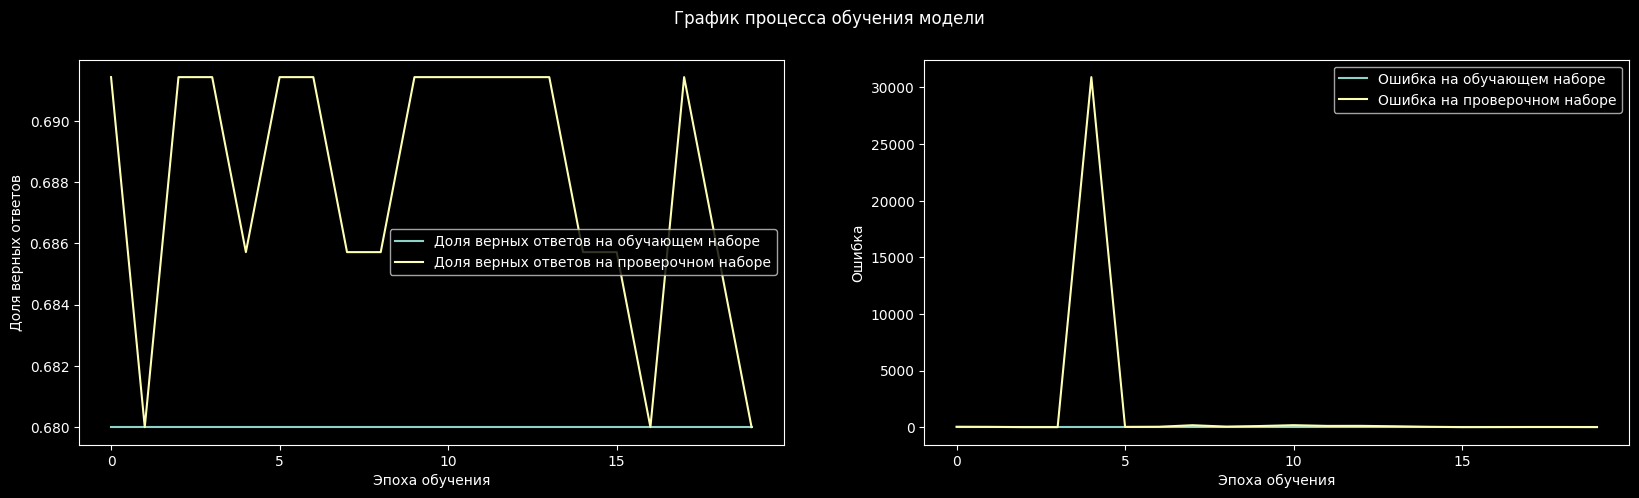

Завершён блок [2450_2500] - 17-й из 50 

Запущен блок [2500_2550] - 18-й из 50
[2500-2550]=> Paveletskaya_turbo: № 851 -> Длина записи: 141743; Маркер выборки: 0; Число нарезок: 1
[2500-2550]=> Paveletskaya_turbo: № 852 -> Длина записи: 6357935; Маркер выборки: 1; Число нарезок: 46
[2500-2550]=> Paveletskaya_turbo: № 853 -> Длина записи: 129071; Маркер выборки: 0; Число нарезок: 0
[2500-2550]=> Paveletskaya_turbo: № 854 -> Длина записи: 3901295; Маркер выборки: 1; Число нарезок: 28
[2500-2550]=> Paveletskaya_turbo: № 855 -> Длина записи: 69743; Маркер выборки: 0; Число нарезок: 0
[2500-2550]=> Paveletskaya_turbo: № 856 -> Длина записи: 1194095; Маркер выборки: 1; Число нарезок: 8
[2500-2550]=> Paveletskaya_turbo: № 857 -> Длина записи: 57071; Маркер выборки: 0; Число нарезок: 0
[2500-2550]=> Paveletskaya_turbo: № 858 -> Длина записи: 4193903; Маркер выборки: 1; Число нарезок: 30
[2500-2550]=> Paveletskaya_turbo: № 859 -> Длина записи: 138287; Маркер выборки: 0; Число нарезок: 1
[2500-2

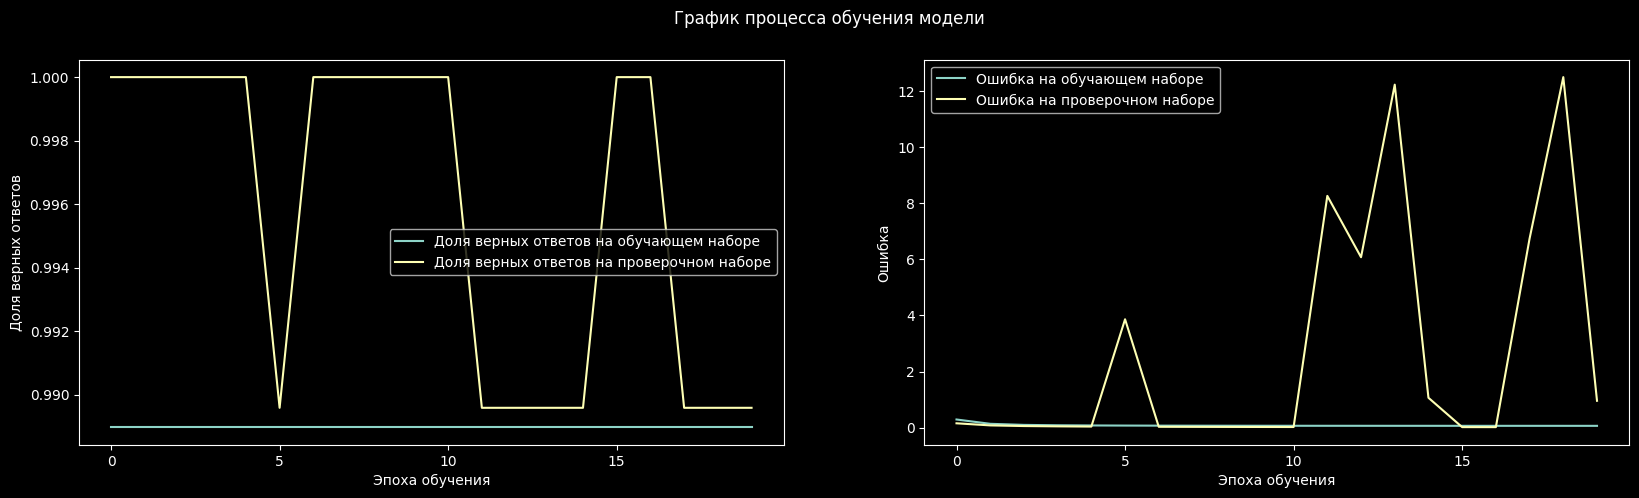

Завершён блок [2500_2550] - 18-й из 50 

Запущен блок [2550_2600] - 19-й из 50
[2550-2600]=> Paveletskaya_turbo: № 901 -> Длина записи: 194159; Маркер выборки: 0; Число нарезок: 1
[2550-2600]=> Paveletskaya_turbo: № 902 -> Длина записи: 6102191; Маркер выборки: 1; Число нарезок: 44
[2550-2600]=> Paveletskaya_turbo: № 903 -> Длина записи: 19055; Маркер выборки: 0; Число нарезок: 0
[2550-2600]=> Paveletskaya_turbo: № 904 -> Длина записи: 6476591; Маркер выборки: 1; Число нарезок: 47
[2550-2600]=> Paveletskaya_turbo: № 905 -> Длина записи: 150959; Маркер выборки: 0; Число нарезок: 1
[2550-2600]=> Paveletskaya_turbo: № 906 -> Длина записи: 3020015; Маркер выборки: 1; Число нарезок: 21
[2550-2600]=> Paveletskaya_turbo: № 907 -> Длина записи: 149231; Маркер выборки: 0; Число нарезок: 1
[2550-2600]=> Paveletskaya_turbo: № 908 -> Длина записи: 6720239; Маркер выборки: 1; Число нарезок: 48
[2550-2600]=> Paveletskaya_turbo: № 909 -> Длина записи: 77231; Маркер выборки: 0; Число нарезок: 0
[2550-

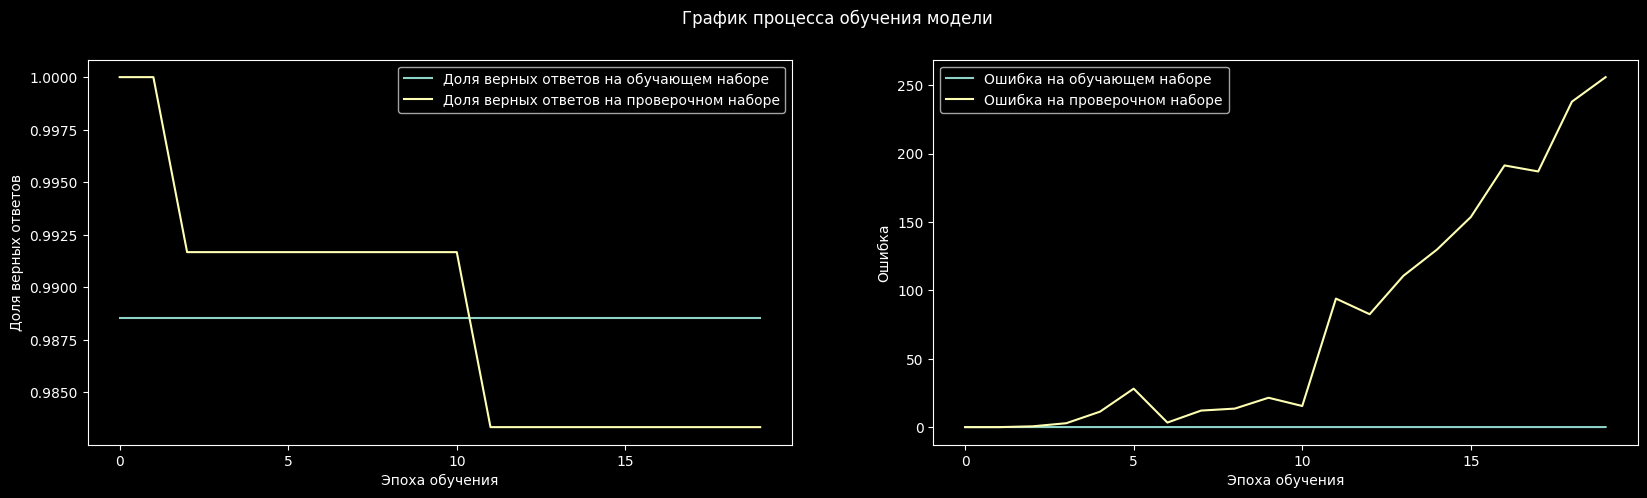

Завершён блок [2550_2600] - 19-й из 50 

Запущен блок [2600_2650] - 20-й из 50
[2600-2650]=> Paveletskaya_turbo: № 951 -> Длина записи: 15599; Маркер выборки: 0; Число нарезок: 0
[2600-2650]=> Paveletskaya_turbo: № 952 -> Длина записи: 3795887; Маркер выборки: 1; Число нарезок: 27
[2600-2650]=> Paveletskaya_turbo: № 953 -> Длина записи: 133679; Маркер выборки: 0; Число нарезок: 0
[2600-2650]=> Paveletskaya_turbo: № 954 -> Длина записи: 1407791; Маркер выборки: 1; Число нарезок: 10
[2600-2650]=> Paveletskaya_turbo: № 955 -> Длина записи: 29423; Маркер выборки: 0; Число нарезок: 0
[2600-2650]=> Paveletskaya_turbo: № 956 -> Длина записи: 5601071; Маркер выборки: 1; Число нарезок: 40
[2600-2650]=> Paveletskaya_turbo: № 957 -> Длина записи: 129071; Маркер выборки: 0; Число нарезок: 0
[2600-2650]=> Paveletskaya_turbo: № 958 -> Длина записи: 4078703; Маркер выборки: 1; Число нарезок: 29
[2600-2650]=> Paveletskaya_turbo: № 959 -> Длина записи: 3454895; Маркер выборки: 0; Число нарезок: 25
[260

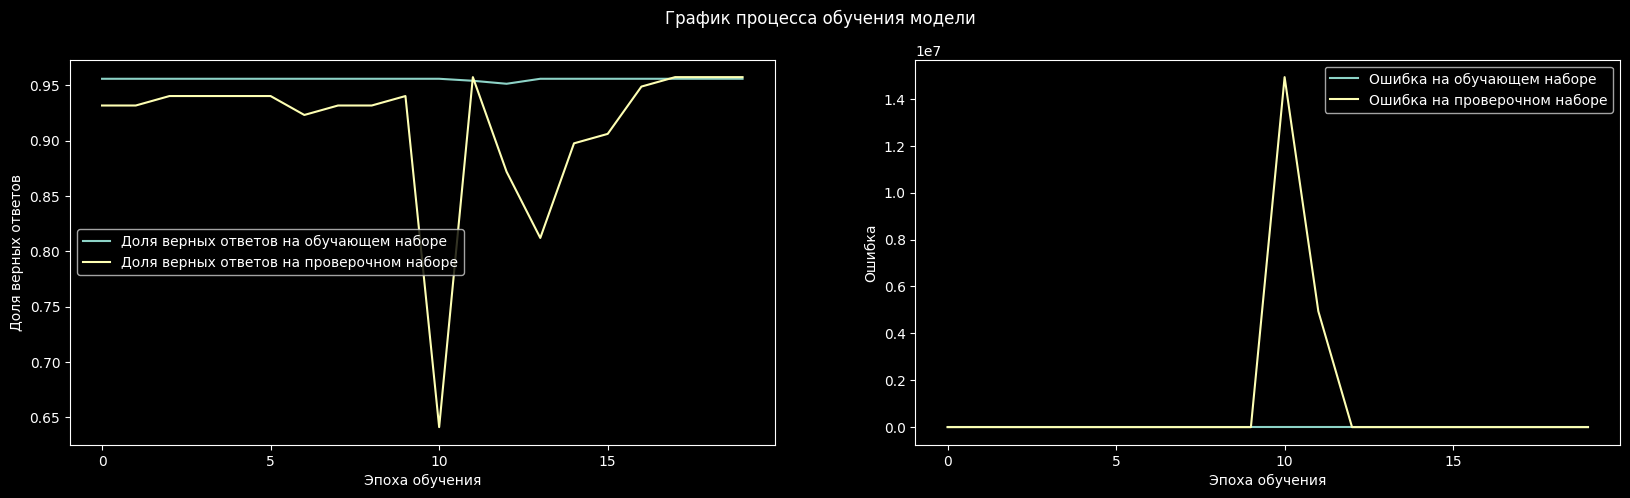

Завершён блок [2600_2650] - 20-й из 50 

Запущен блок [2650_2700] - 21-й из 50
[2650-2700]=> Paveletskaya_turbo: № 1001 -> Длина записи: 78383; Маркер выборки: 0; Число нарезок: 0
[2650-2700]=> Paveletskaya_turbo: № 1002 -> Длина записи: 5186927; Маркер выборки: 1; Число нарезок: 37
[2650-2700]=> Paveletskaya_turbo: № 1003 -> Длина записи: 7535; Маркер выборки: 0; Число нарезок: 0
[2650-2700]=> Paveletskaya_turbo: № 1004 -> Длина записи: 2304623; Маркер выборки: 1; Число нарезок: 16
[2650-2700]=> Paveletskaya_turbo: № 1005 -> Длина записи: 59951; Маркер выборки: 0; Число нарезок: 0
[2650-2700]=> Paveletskaya_turbo: № 1006 -> Длина записи: 789167; Маркер выборки: 1; Число нарезок: 5
[2650-2700]=> Paveletskaya_turbo: № 1007 -> Длина записи: 153839; Маркер выборки: 0; Число нарезок: 1
[2650-2700]=> Paveletskaya_turbo: № 1008 -> Длина записи: 4656431; Маркер выборки: 1; Число нарезок: 33
[2650-2700]=> Paveletskaya_turbo: № 1009 -> Длина записи: 77231; Маркер выборки: 0; Число нарезок: 0
[2

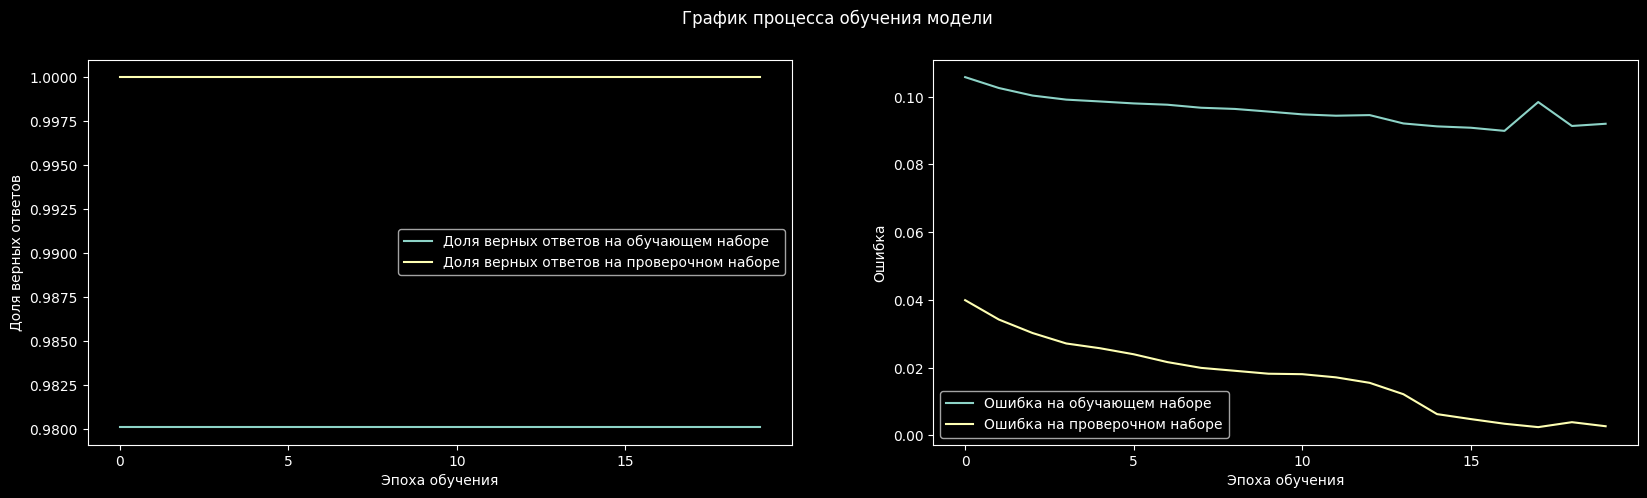

Завершён блок [2650_2700] - 21-й из 50 

Запущен блок [2700_2750] - 22-й из 50
[2700-2750]=> Paveletskaya_turbo: № 1051 -> Длина записи: 33455; Маркер выборки: 0; Число нарезок: 0
[2700-2750]=> Paveletskaya_turbo: № 1052 -> Длина записи: 9394031; Маркер выборки: 1; Число нарезок: 68
[2700-2750]=> Paveletskaya_turbo: № 1053 -> Длина записи: 129071; Маркер выборки: 0; Число нарезок: 0
[2700-2750]=> Paveletskaya_turbo: № 1054 -> Длина записи: 1622063; Маркер выборки: 1; Число нарезок: 11
[2700-2750]=> Paveletskaya_turbo: № 1055 -> Длина записи: 15023; Маркер выборки: 0; Число нарезок: 0
[2700-2750]=> Paveletskaya_turbo: № 1056 -> Длина записи: 3115631; Маркер выборки: 1; Число нарезок: 22
[2700-2750]=> Paveletskaya_turbo: № 1057 -> Длина записи: 15599; Маркер выборки: 0; Число нарезок: 0
[2700-2750]=> Paveletskaya_turbo: № 1058 -> Длина записи: 2360495; Маркер выборки: 1; Число нарезок: 17
[2700-2750]=> Paveletskaya_turbo: № 1059 -> Длина записи: 28847; Маркер выборки: 0; Число нарезок: 0

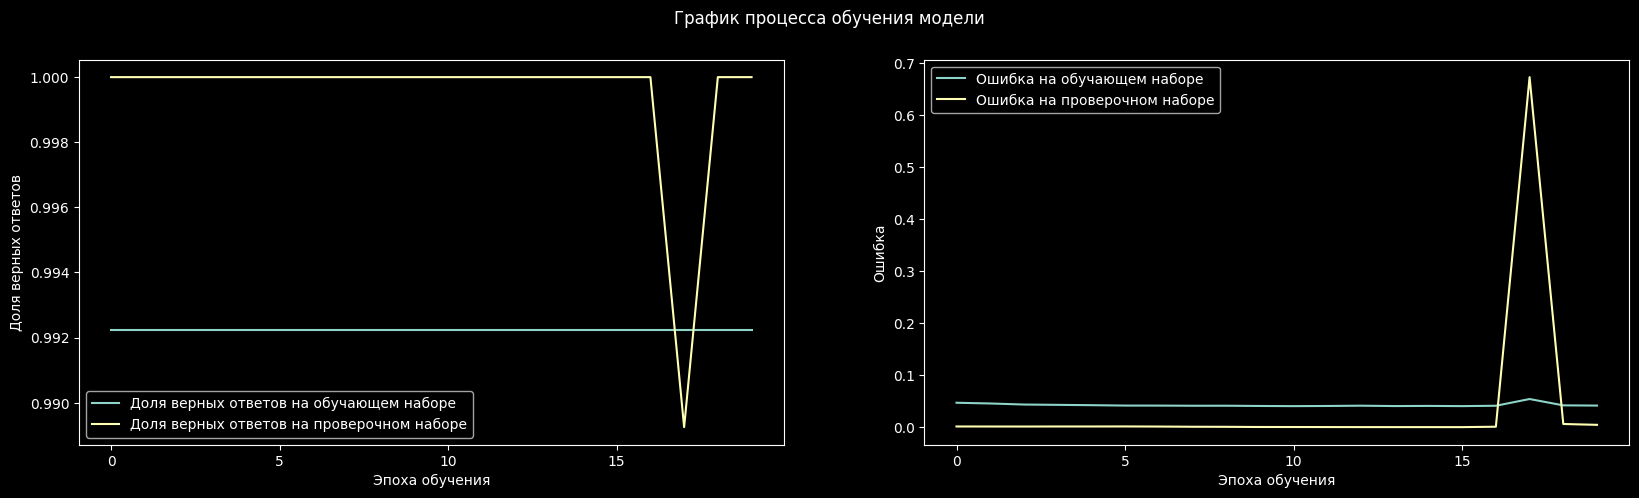

Завершён блок [2700_2750] - 22-й из 50 

Запущен блок [2750_2800] - 23-й из 50
[2750-2800]=> Paveletskaya_turbo: № 1101 -> Длина записи: 24239; Маркер выборки: 0; Число нарезок: 0
[2750-2800]=> Paveletskaya_turbo: № 1102 -> Длина записи: 3018287; Маркер выборки: 1; Число нарезок: 21
[2750-2800]=> Paveletskaya_turbo: № 1103 -> Длина записи: 161327; Маркер выборки: 0; Число нарезок: 1
[2750-2800]=> Paveletskaya_turbo: № 1104 -> Длина записи: 9027119; Маркер выборки: 1; Число нарезок: 65
[2750-2800]=> Paveletskaya_turbo: № 1105 -> Длина записи: 18479; Маркер выборки: 0; Число нарезок: 0
[2750-2800]=> Paveletskaya_turbo: № 1106 -> Длина записи: 1160111; Маркер выборки: 1; Число нарезок: 8
[2750-2800]=> Paveletskaya_turbo: № 1107 -> Длина записи: 180911; Маркер выборки: 0; Число нарезок: 1
[2750-2800]=> Paveletskaya_turbo: № 1108 -> Длина записи: 6713327; Маркер выборки: 1; Число нарезок: 48
[2750-2800]=> Paveletskaya_turbo: № 1109 -> Длина записи: 44399; Маркер выборки: 0; Число нарезок: 0

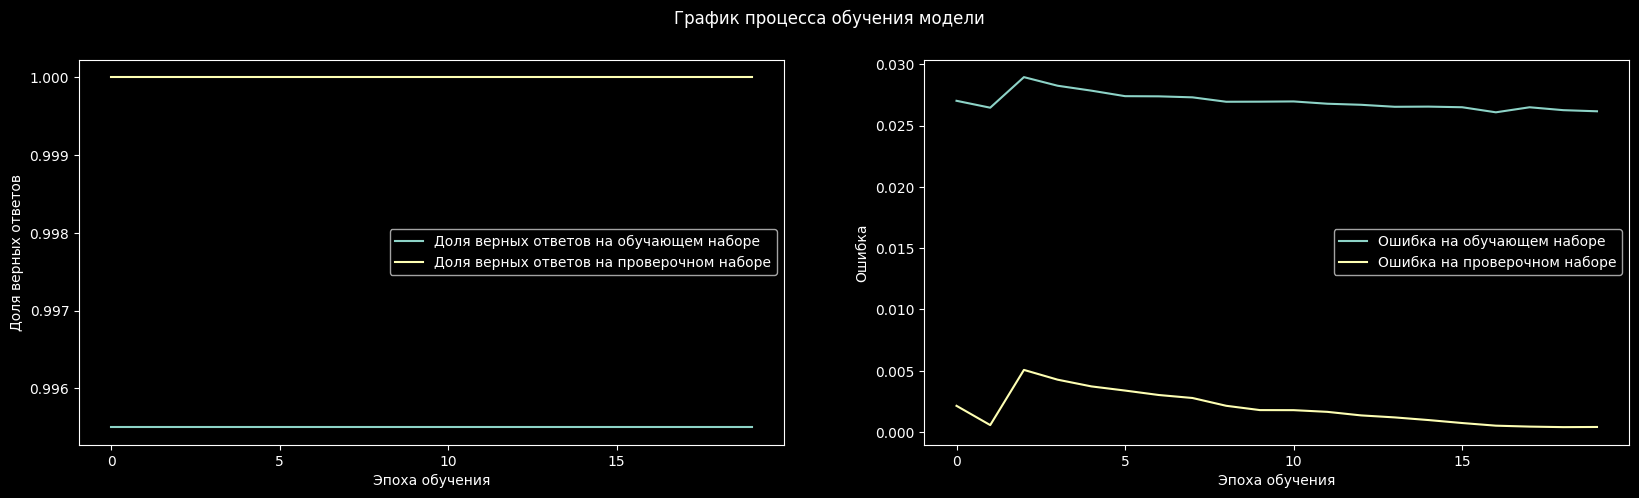

Завершён блок [2750_2800] - 23-й из 50 

Запущен блок [2800_2850] - 24-й из 50
[2800-2850]=> Paveletskaya_turbo: № 1151 -> Длина записи: 117551; Маркер выборки: 0; Число нарезок: 0
[2800-2850]=> Paveletskaya_turbo: № 1152 -> Длина записи: 1688879; Маркер выборки: 1; Число нарезок: 12
[2800-2850]=> Paveletskaya_turbo: № 1153 -> Длина записи: 104879; Маркер выборки: 0; Число нарезок: 0
[2800-2850]=> Paveletskaya_turbo: № 1154 -> Длина записи: 3678959; Маркер выборки: 1; Число нарезок: 26
[2800-2850]=> Paveletskaya_turbo: № 1155 -> Длина записи: 16751; Маркер выборки: 0; Число нарезок: 0
[2800-2850]=> Paveletskaya_turbo: № 1156 -> Длина записи: 3868463; Маркер выборки: 1; Число нарезок: 28
[2800-2850]=> Paveletskaya_turbo: № 1157 -> Длина записи: 56495; Маркер выборки: 0; Число нарезок: 0
[2800-2850]=> Paveletskaya_turbo: № 1158 -> Длина записи: 3859247; Маркер выборки: 1; Число нарезок: 28
[2800-2850]=> Paveletskaya_turbo: № 1159 -> Длина записи: 31727; Маркер выборки: 0; Число нарезок: 

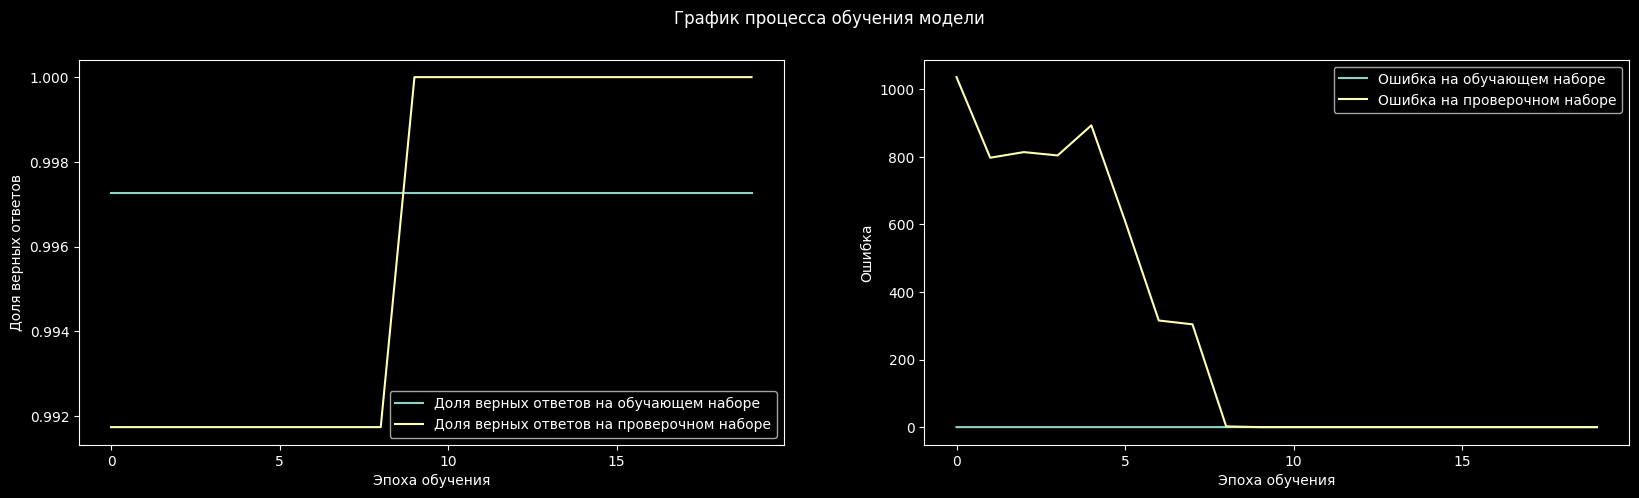

Завершён блок [2800_2850] - 24-й из 50 

Запущен блок [2850_2900] - 25-й из 50
[2850-2900]=> Paveletskaya_turbo: № 1201 -> Длина записи: 12143; Маркер выборки: 0; Число нарезок: 0
[2850-2900]=> Paveletskaya_turbo: № 1202 -> Длина записи: 805295; Маркер выборки: 1; Число нарезок: 5
[2850-2900]=> Paveletskaya_turbo: № 1203 -> Длина записи: 90479; Маркер выборки: 0; Число нарезок: 0
[2850-2900]=> Paveletskaya_turbo: № 1204 -> Длина записи: 1612271; Маркер выборки: 1; Число нарезок: 11
[2850-2900]=> Paveletskaya_turbo: № 1205 -> Длина записи: 195887; Маркер выборки: 0; Число нарезок: 1
[2850-2900]=> Paveletskaya_turbo: № 1206 -> Длина записи: 2802287; Маркер выборки: 1; Число нарезок: 20
[2850-2900]=> Paveletskaya_turbo: № 1207 -> Длина записи: 220655; Маркер выборки: 0; Число нарезок: 1
[2850-2900]=> Paveletskaya_turbo: № 1208 -> Длина записи: 4636271; Маркер выборки: 1; Число нарезок: 33
[2850-2900]=> Paveletskaya_turbo: № 1209 -> Длина записи: 128495; Маркер выборки: 0; Число нарезок: 0

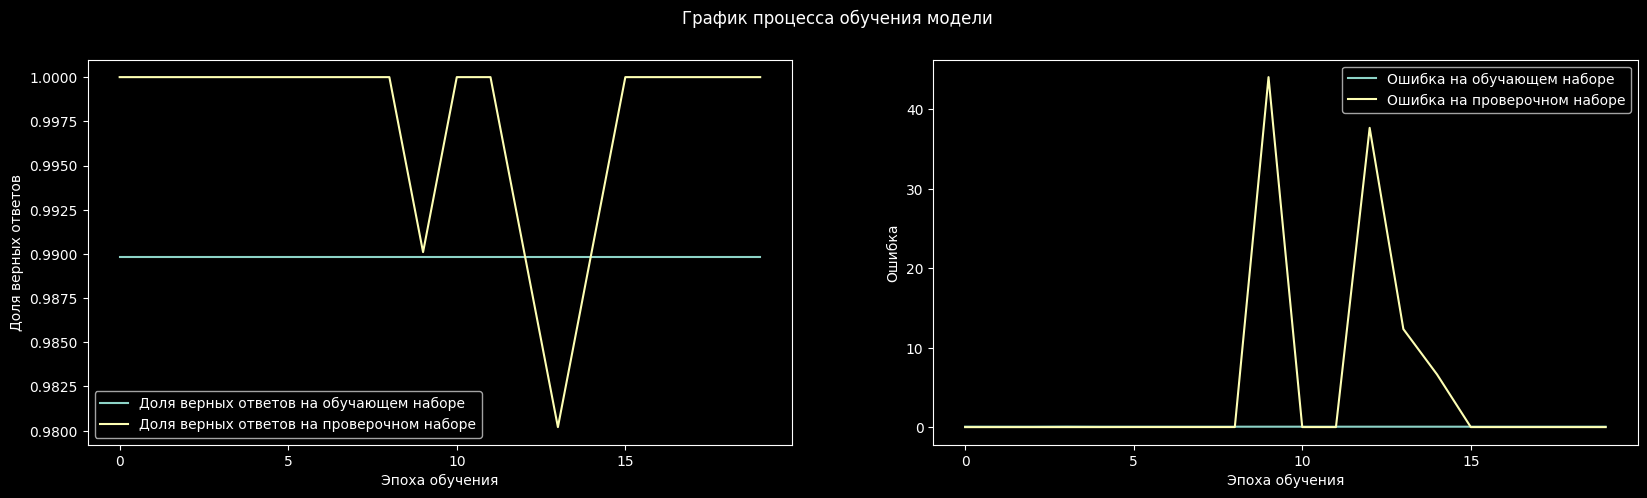

Завершён блок [2850_2900] - 25-й из 50 

Запущен блок [2900_2950] - 26-й из 50
[2900-2950]=> Paveletskaya_turbo: № 1251 -> Длина записи: 16175; Маркер выборки: 0; Число нарезок: 0
[2900-2950]=> Primavera: № 1252 -> Длина записи: 738479; Маркер выборки: 1; Число нарезок: 5
[2900-2950]=> Paveletskaya_turbo: № 1253 -> Длина записи: 17327; Маркер выборки: 0; Число нарезок: 0
[2900-2950]=> Primavera: № 1254 -> Длина записи: 5413295; Маркер выборки: 1; Число нарезок: 39
[2900-2950]=> Paveletskaya_turbo: № 1255 -> Длина записи: 96239; Маркер выборки: 0; Число нарезок: 0
[2900-2950]=> Primavera: № 1256 -> Длина записи: 409583; Маркер выборки: 1; Число нарезок: 2
[2900-2950]=> Paveletskaya_turbo: № 1257 -> Длина записи: 68015; Маркер выборки: 0; Число нарезок: 0
[2900-2950]=> Primavera: № 1258 -> Длина записи: 2765999; Маркер выборки: 1; Число нарезок: 20
[2900-2950]=> Paveletskaya_turbo: № 1259 -> Длина записи: 84719; Маркер выборки: 0; Число нарезок: 0
[2900-2950]=> Primavera: № 1260 -> Длина

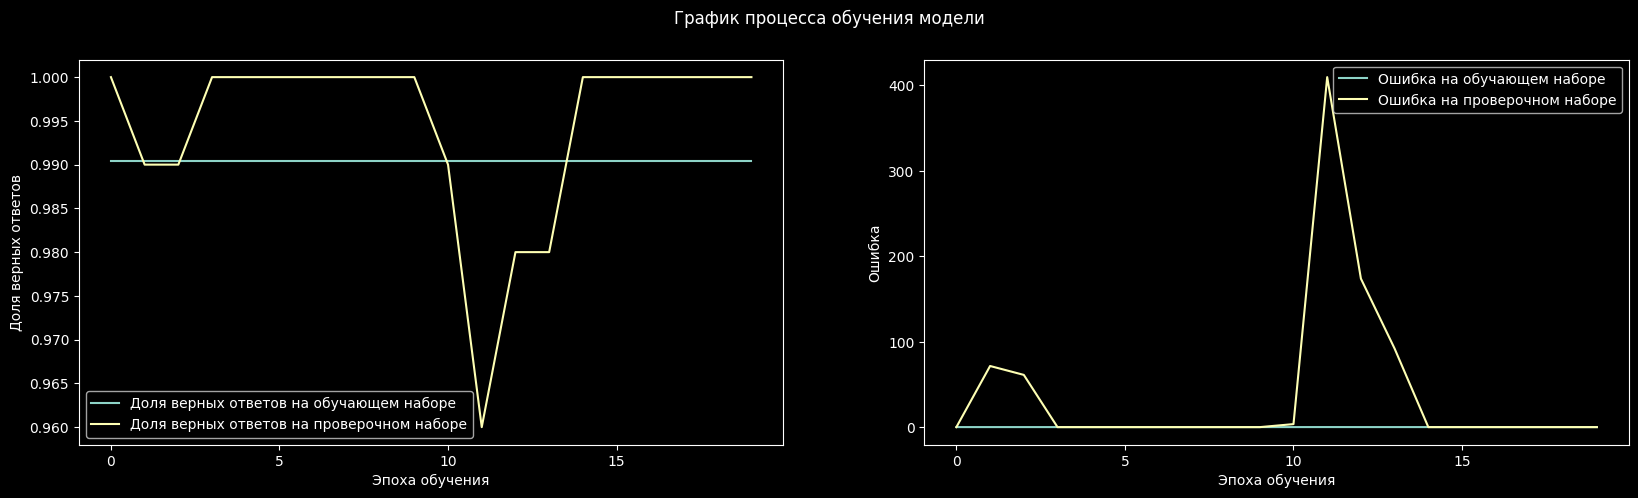

Завершён блок [2900_2950] - 26-й из 50 

Запущен блок [2950_3000] - 27-й из 50
[2950-3000]=> Primavera: № 1301 -> Длина записи: 169391; Маркер выборки: 0; Число нарезок: 1
[2950-3000]=> Primavera: № 1302 -> Длина записи: 4049903; Маркер выборки: 1; Число нарезок: 29
[2950-3000]=> Primavera: № 1303 -> Длина записи: 178607; Маркер выборки: 0; Число нарезок: 1
[2950-3000]=> Primavera: № 1304 -> Длина записи: 1707887; Маркер выборки: 1; Число нарезок: 12
[2950-3000]=> Primavera: № 1305 -> Длина записи: 101999; Маркер выборки: 0; Число нарезок: 0
[2950-3000]=> Primavera: № 1306 -> Длина записи: 1367471; Маркер выборки: 1; Число нарезок: 9
[2950-3000]=> Primavera: № 1307 -> Длина записи: 487343; Маркер выборки: 0; Число нарезок: 3
[2950-3000]=> Primavera: № 1308 -> Длина записи: 2084591; Маркер выборки: 1; Число нарезок: 15
[2950-3000]=> Primavera: № 1309 -> Длина записи: 4655; Маркер выборки: 0; Число нарезок: 0
[2950-3000]=> Primavera: № 1310 -> Длина записи: 418799; Маркер выборки: 1; Чис

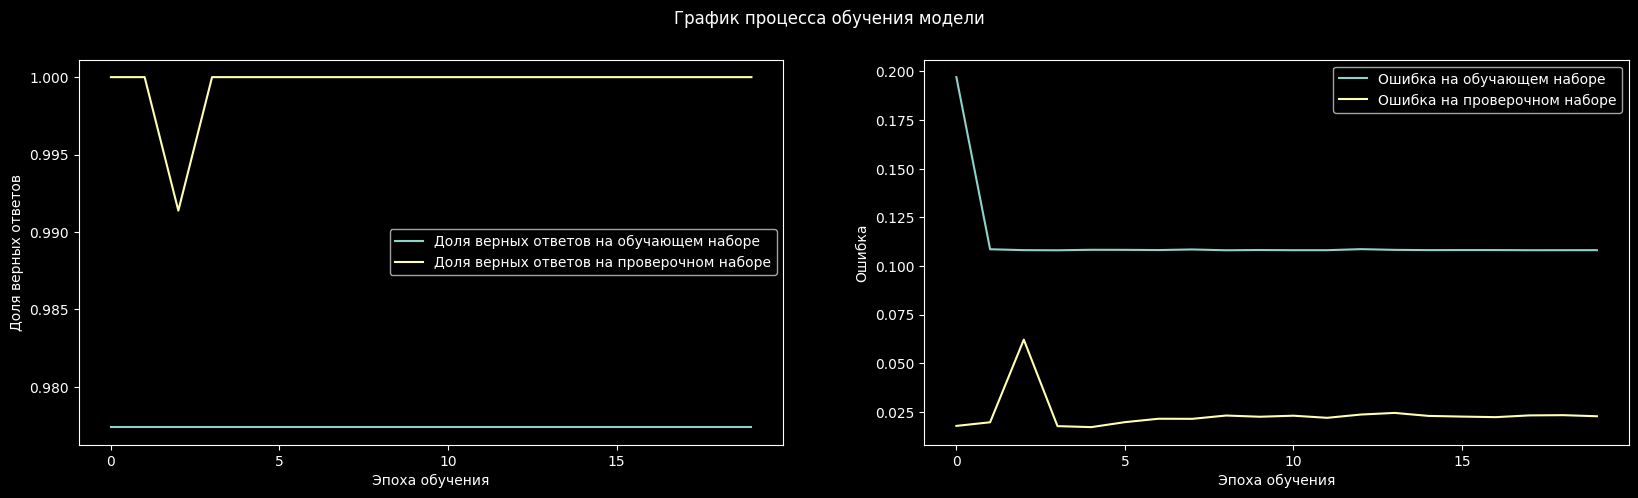

Завершён блок [2950_3000] - 27-й из 50 

Запущен блок [3000_3050] - 28-й из 50
[3000-3050]=> Primavera: № 1351 -> Длина записи: 1671599; Маркер выборки: 0; Число нарезок: 12
[3000-3050]=> Primavera: № 1352 -> Длина записи: 285743; Маркер выборки: 1; Число нарезок: 2
[3000-3050]=> Primavera: № 1353 -> Длина записи: 124463; Маркер выборки: 0; Число нарезок: 0
[3000-3050]=> Primavera: № 1354 -> Длина записи: 4877039; Маркер выборки: 1; Число нарезок: 35
[3000-3050]=> Primavera: № 1355 -> Длина записи: 19631; Маркер выборки: 0; Число нарезок: 0
[3000-3050]=> Primavera: № 1356 -> Длина записи: 2996975; Маркер выборки: 1; Число нарезок: 21
[3000-3050]=> Primavera: № 1357 -> Длина записи: 345647; Маркер выборки: 0; Число нарезок: 2
[3000-3050]=> Primavera: № 1358 -> Длина записи: 1512047; Маркер выборки: 1; Число нарезок: 10
[3000-3050]=> Primavera: № 1359 -> Длина записи: 13295; Маркер выборки: 0; Число нарезок: 0
[3000-3050]=> Primavera: № 1360 -> Длина записи: 2512559; Маркер выборки: 1; Ч

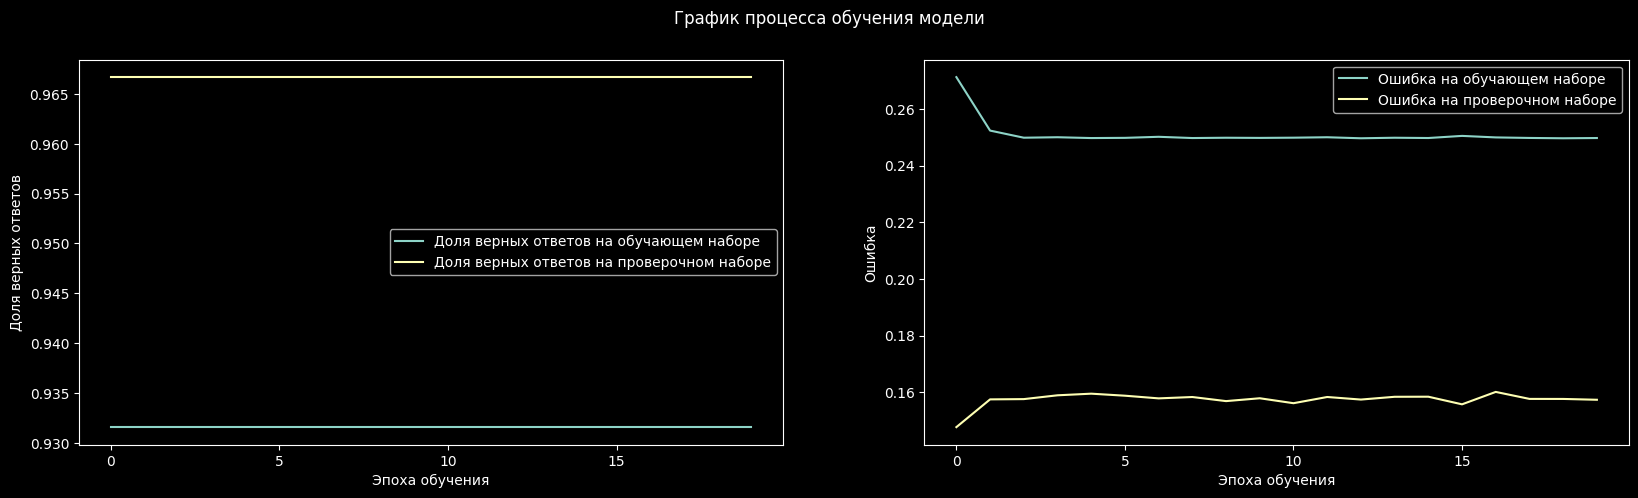

Завершён блок [3000_3050] - 28-й из 50 

Запущен блок [3050_3100] - 29-й из 50
[3050-3100]=> Primavera: № 1401 -> Длина записи: 97391; Маркер выборки: 0; Число нарезок: 0
[3050-3100]=> Primavera: № 1402 -> Длина записи: 7464431; Маркер выборки: 1; Число нарезок: 54
[3050-3100]=> Primavera: № 1403 -> Длина записи: 265583; Маркер выборки: 0; Число нарезок: 1
[3050-3100]=> Primavera: № 1404 -> Длина записи: 3957743; Маркер выборки: 1; Число нарезок: 28
[3050-3100]=> Primavera: № 1405 -> Длина записи: 4079; Маркер выборки: 0; Число нарезок: 0
[3050-3100]=> Primavera: № 1406 -> Длина записи: 4064303; Маркер выборки: 1; Число нарезок: 29
[3050-3100]=> Primavera: № 1407 -> Длина записи: 46127; Маркер выборки: 0; Число нарезок: 0
[3050-3100]=> Primavera: № 1408 -> Длина записи: 1336943; Маркер выборки: 1; Число нарезок: 9
[3050-3100]=> Primavera: № 1409 -> Длина записи: 278255; Маркер выборки: 0; Число нарезок: 2
[3050-3100]=> Primavera: № 1410 -> Длина записи: 5057327; Маркер выборки: 1; Числ

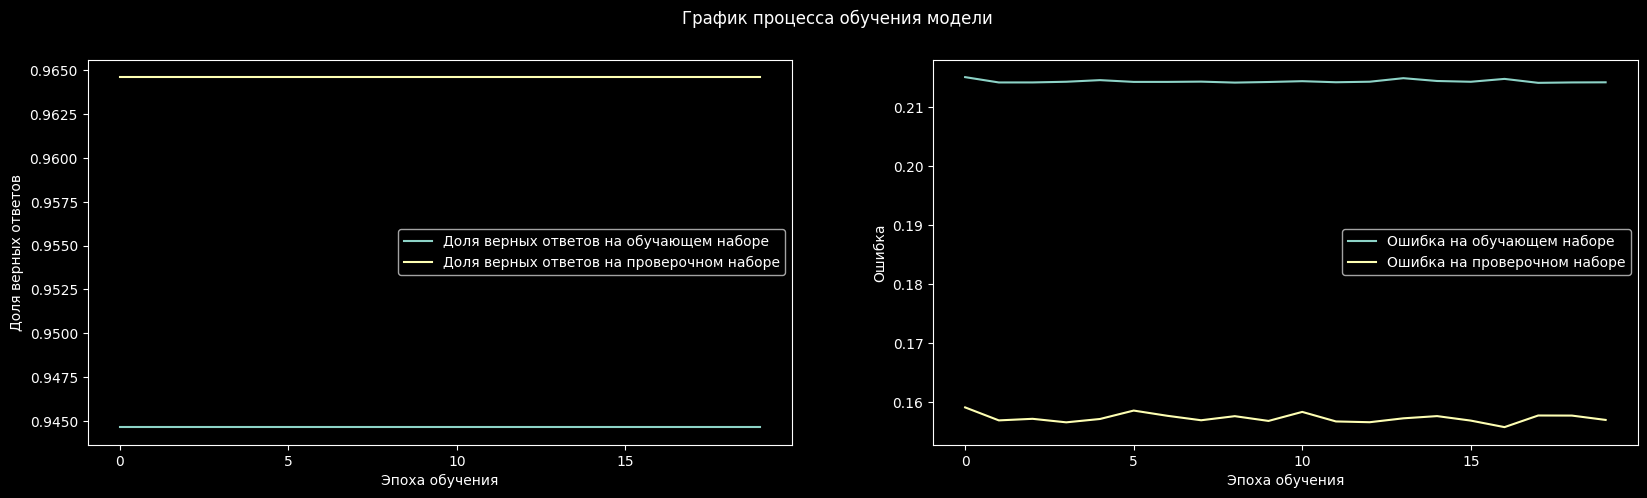

Завершён блок [3050_3100] - 29-й из 50 

Запущен блок [3100_3150] - 30-й из 50
[3100-3150]=> Primavera: № 1451 -> Длина записи: 1306991; Маркер выборки: 0; Число нарезок: 9
[3100-3150]=> Primavera: № 1452 -> Длина записи: 2835119; Маркер выборки: 1; Число нарезок: 20
[3100-3150]=> Primavera: № 1453 -> Длина записи: 211439; Маркер выборки: 0; Число нарезок: 1
[3100-3150]=> Primavera: № 1454 -> Длина записи: 1016111; Маркер выборки: 1; Число нарезок: 7
[3100-3150]=> Primavera: № 1455 -> Длина записи: 279983; Маркер выборки: 0; Число нарезок: 2
[3100-3150]=> Primavera: № 1456 -> Длина записи: 4670831; Маркер выборки: 1; Число нарезок: 33
[3100-3150]=> Primavera: № 1457 -> Длина записи: 674543; Маркер выборки: 0; Число нарезок: 4
[3100-3150]=> Primavera: № 1458 -> Длина записи: 1713647; Маркер выборки: 1; Число нарезок: 12
[3100-3150]=> Primavera: № 1459 -> Длина записи: 31151; Маркер выборки: 0; Число нарезок: 0
[3100-3150]=> Primavera: № 1460 -> Длина записи: 1721711; Маркер выборки: 1; 

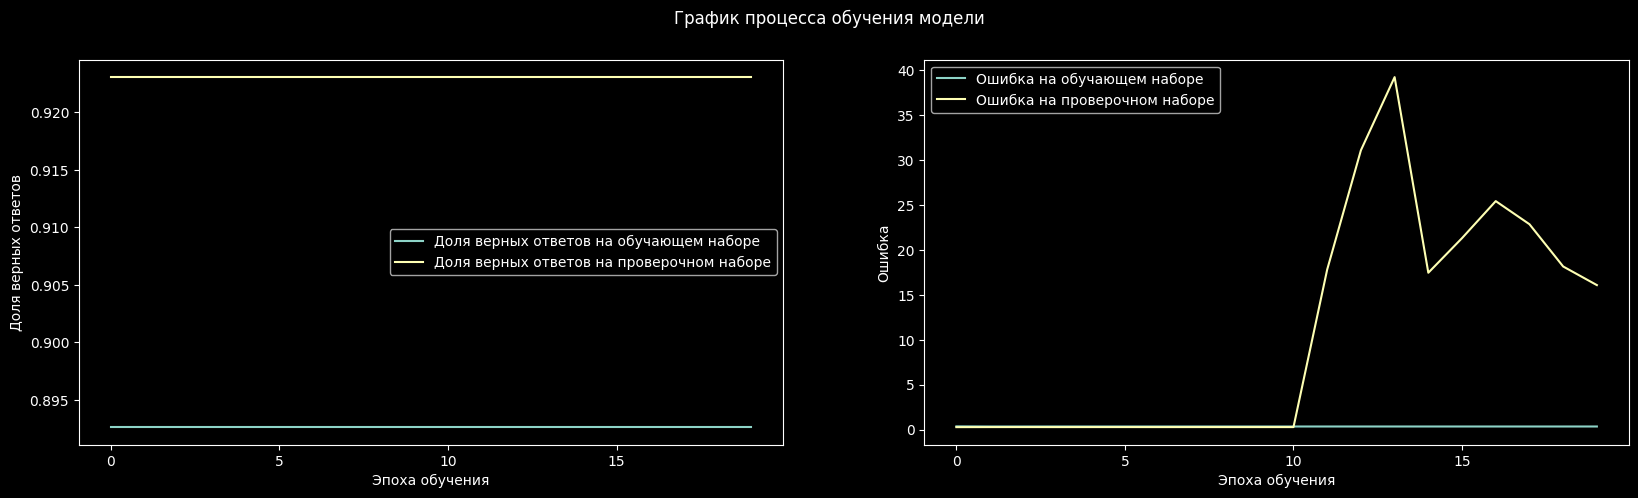

Завершён блок [3100_3150] - 30-й из 50 

Запущен блок [3150_3200] - 31-й из 50
[3150-3200]=> Primavera: № 1501 -> Длина записи: 36911; Маркер выборки: 0; Число нарезок: 0
[3150-3200]=> Primavera: № 1502 -> Длина записи: 3163439; Маркер выборки: 1; Число нарезок: 22
[3150-3200]=> Primavera: № 1503 -> Длина записи: 194159; Маркер выборки: 0; Число нарезок: 1
[3150-3200]=> Primavera: № 1504 -> Длина записи: 7983983; Маркер выборки: 1; Число нарезок: 57
[3150-3200]=> Primavera: № 1505 -> Длина записи: 221807; Маркер выборки: 0; Число нарезок: 1
[3150-3200]=> Primavera: № 1506 -> Длина записи: 2463599; Маркер выборки: 1; Число нарезок: 17
[3150-3200]=> Primavera: № 1507 -> Длина записи: 337007; Маркер выборки: 0; Число нарезок: 2
[3150-3200]=> Primavera: № 1508 -> Длина записи: 8070383; Маркер выборки: 1; Число нарезок: 58
[3150-3200]=> Primavera: № 1509 -> Длина записи: 196463; Маркер выборки: 0; Число нарезок: 1
[3150-3200]=> Primavera: № 1510 -> Длина записи: 1759151; Маркер выборки: 1; 

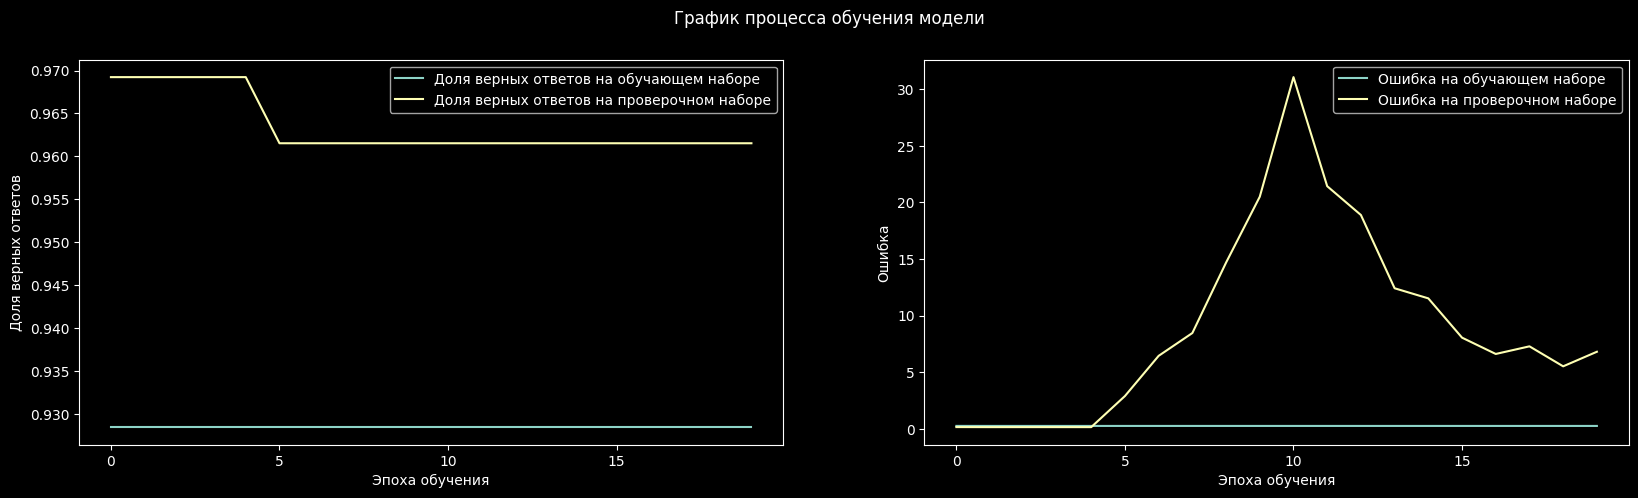

Завершён блок [3150_3200] - 31-й из 50 

Запущен блок [3200_3250] - 32-й из 50
[3200-3250]=> Primavera: № 1551 -> Длина записи: 140015; Маркер выборки: 0; Число нарезок: 1
[3200-3250]=> Primavera: № 1552 -> Длина записи: 627311; Маркер выборки: 1; Число нарезок: 4
[3200-3250]=> Primavera: № 1553 -> Длина записи: 893999; Маркер выборки: 0; Число нарезок: 6
[3200-3250]=> Primavera: № 1554 -> Длина записи: 4465775; Маркер выборки: 1; Число нарезок: 32
[3200-3250]=> Primavera: № 1555 -> Длина записи: 2294831; Маркер выборки: 0; Число нарезок: 16
[3200-3250]=> Primavera: № 1556 -> Длина записи: 3462959; Маркер выборки: 1; Число нарезок: 25
[3200-3250]=> Primavera: № 1557 -> Длина записи: 68591; Маркер выборки: 0; Число нарезок: 0
[3200-3250]=> Primavera: № 1558 -> Длина записи: 1797743; Маркер выборки: 1; Число нарезок: 13
[3200-3250]=> Primavera: № 1559 -> Длина записи: 2221103; Маркер выборки: 0; Число нарезок: 16
[3200-3250]=> Primavera: № 1560 -> Длина записи: 206831; Маркер выборки: 1;

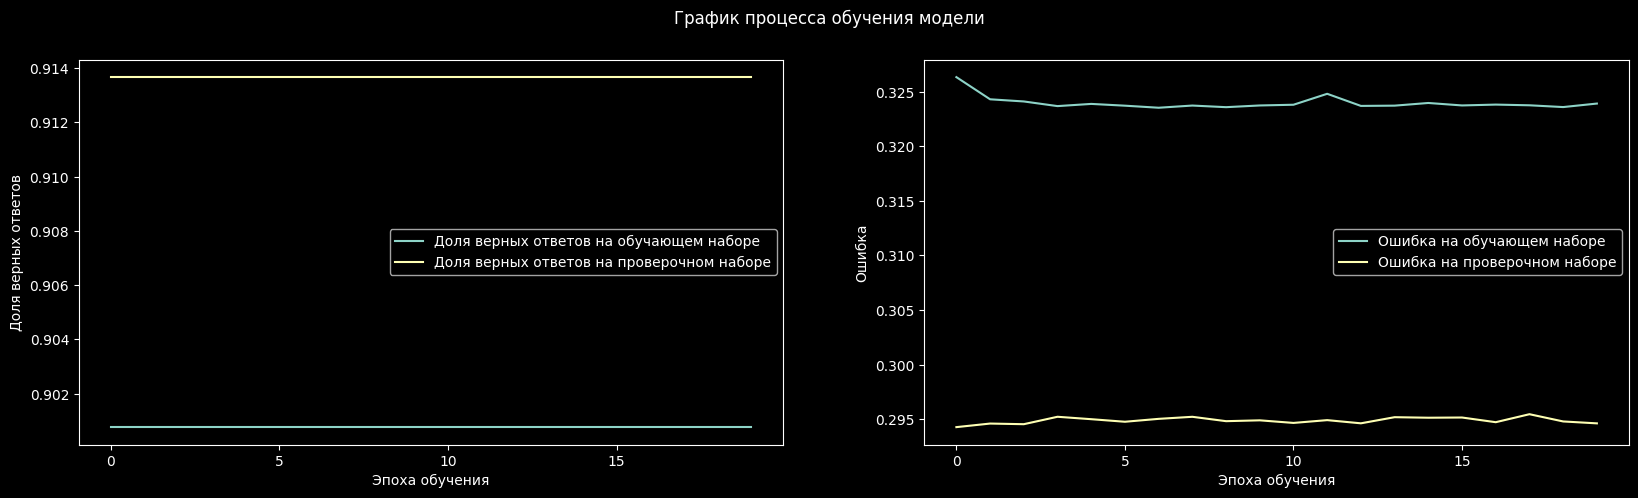

Завершён блок [3200_3250] - 32-й из 50 

Запущен блок [3250_3300] - 33-й из 50
[3250-3300]=> Primavera: № 1601 -> Длина записи: 103151; Маркер выборки: 0; Число нарезок: 0
[3250-3300]=> Primavera: № 1602 -> Длина записи: 4810223; Маркер выборки: 1; Число нарезок: 34
[3250-3300]=> Primavera: № 1603 -> Длина записи: 5231; Маркер выборки: 0; Число нарезок: 0
[3250-3300]=> Primavera: № 1604 -> Длина записи: 213167; Маркер выборки: 1; Число нарезок: 1
[3250-3300]=> Primavera: № 1605 -> Длина записи: 261551; Маркер выборки: 0; Число нарезок: 1
[3250-3300]=> Primavera: № 1606 -> Длина записи: 6776687; Маркер выборки: 1; Число нарезок: 49
[3250-3300]=> Primavera: № 1607 -> Длина записи: 141743; Маркер выборки: 0; Число нарезок: 1
[3250-3300]=> Primavera: № 1608 -> Длина записи: 2560943; Маркер выборки: 1; Число нарезок: 18
[3250-3300]=> Primavera: № 1609 -> Длина записи: 14447; Маркер выборки: 0; Число нарезок: 0
[3250-3300]=> Primavera: № 1610 -> Длина записи: 2736047; Маркер выборки: 1; Числ

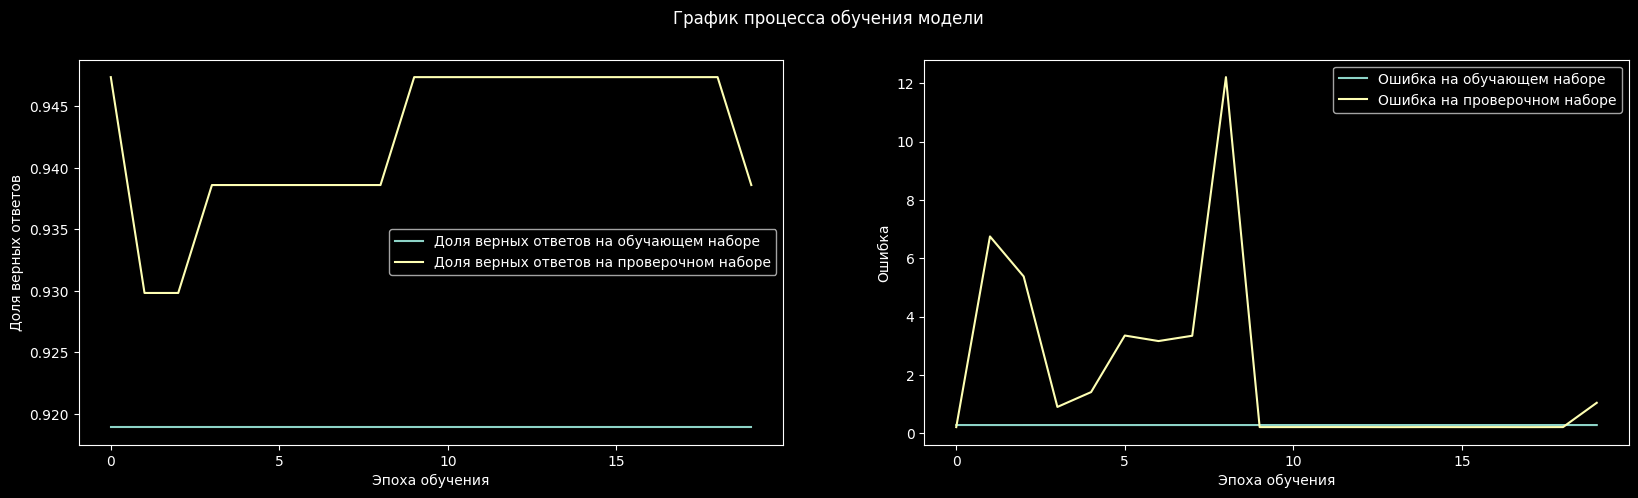

Завершён блок [3250_3300] - 33-й из 50 

Запущен блок [3300_3350] - 34-й из 50
[3300-3350]=> Primavera: № 1651 -> Длина записи: 254639; Маркер выборки: 0; Число нарезок: 1
[3300-3350]=> Primavera: № 1652 -> Длина записи: 695279; Маркер выборки: 1; Число нарезок: 5
[3300-3350]=> Primavera: № 1653 -> Длина записи: 157295; Маркер выборки: 0; Число нарезок: 1
[3300-3350]=> Primavera: № 1654 -> Длина записи: 374447; Маркер выборки: 1; Число нарезок: 2
[3300-3350]=> Primavera: № 1655 -> Длина записи: 53039; Маркер выборки: 0; Число нарезок: 0
[3300-3350]=> Primavera: № 1656 -> Длина записи: 1084079; Маркер выборки: 1; Число нарезок: 7
[3300-3350]=> Primavera: № 1657 -> Длина записи: 970031; Маркер выборки: 0; Число нарезок: 7
[3300-3350]=> Primavera: № 1658 -> Длина записи: 971759; Маркер выборки: 1; Число нарезок: 7
[3300-3350]=> Primavera: № 1659 -> Длина записи: 20783; Маркер выборки: 0; Число нарезок: 0
[3300-3350]=> Primavera: № 1660 -> Длина записи: 14261807; Маркер выборки: 1; Число н

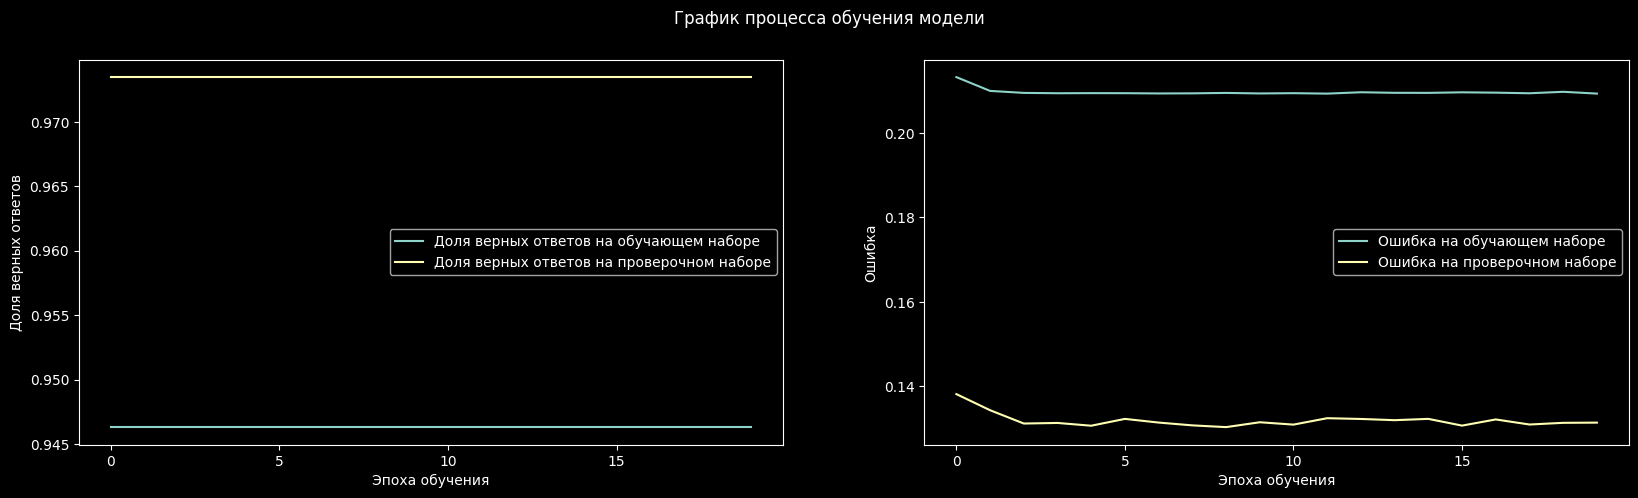

Завершён блок [3300_3350] - 34-й из 50 

Запущен блок [3350_3400] - 35-й из 50
[3350-3400]=> Primavera: № 1701 -> Длина записи: 173999; Маркер выборки: 0; Число нарезок: 1
[3350-3400]=> Primavera: № 1702 -> Длина записи: 3711215; Маркер выборки: 1; Число нарезок: 26
[3350-3400]=> Primavera: № 1703 -> Длина записи: 111791; Маркер выборки: 0; Число нарезок: 0
[3350-3400]=> Primavera: № 1704 -> Длина записи: 3297647; Маркер выборки: 1; Число нарезок: 23
[3350-3400]=> Primavera: № 1705 -> Длина записи: 159023; Маркер выборки: 0; Число нарезок: 1
[3350-3400]=> Primavera: № 1706 -> Длина записи: 8914799; Маркер выборки: 1; Число нарезок: 64
[3350-3400]=> Primavera: № 1707 -> Длина записи: 37487; Маркер выборки: 0; Число нарезок: 0
[3350-3400]=> Primavera: № 1708 -> Длина записи: 3068975; Маркер выборки: 1; Число нарезок: 22
[3350-3400]=> Primavera: № 1709 -> Длина записи: 156719; Маркер выборки: 0; Число нарезок: 1
[3350-3400]=> Primavera: № 1710 -> Длина записи: 1001711; Маркер выборки: 1; 

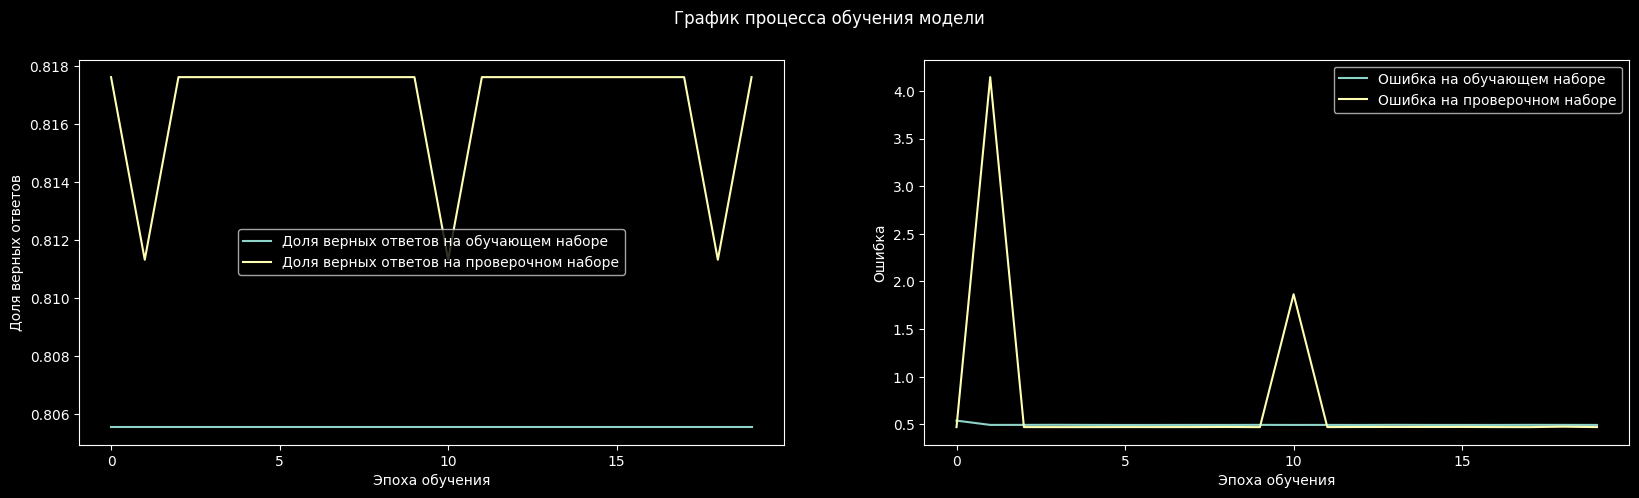

Завершён блок [3350_3400] - 35-й из 50 

Запущен блок [3400_3450] - 36-й из 50
[3400-3450]=> Primavera: № 1751 -> Длина записи: 885359; Маркер выборки: 0; Число нарезок: 6
[3400-3450]=> Primavera: № 1752 -> Длина записи: 3390383; Маркер выборки: 1; Число нарезок: 24
[3400-3450]=> Primavera: № 1753 -> Длина записи: 266159; Маркер выборки: 0; Число нарезок: 1
[3400-3450]=> Primavera: № 1754 -> Длина записи: 4492271; Маркер выборки: 1; Число нарезок: 32
[3400-3450]=> Primavera: № 1755 -> Длина записи: 110063; Маркер выборки: 0; Число нарезок: 0
[3400-3450]=> Primavera: № 1756 -> Длина записи: 2295983; Маркер выборки: 1; Число нарезок: 16
[3400-3450]=> Primavera: № 1757 -> Длина записи: 4655; Маркер выборки: 0; Число нарезок: 0
[3400-3450]=> Primavera: № 1758 -> Длина записи: 3431855; Маркер выборки: 1; Число нарезок: 24
[3400-3450]=> Primavera: № 1759 -> Длина записи: 69743; Маркер выборки: 0; Число нарезок: 0
[3400-3450]=> Primavera: № 1760 -> Длина записи: 5669615; Маркер выборки: 1; Чи

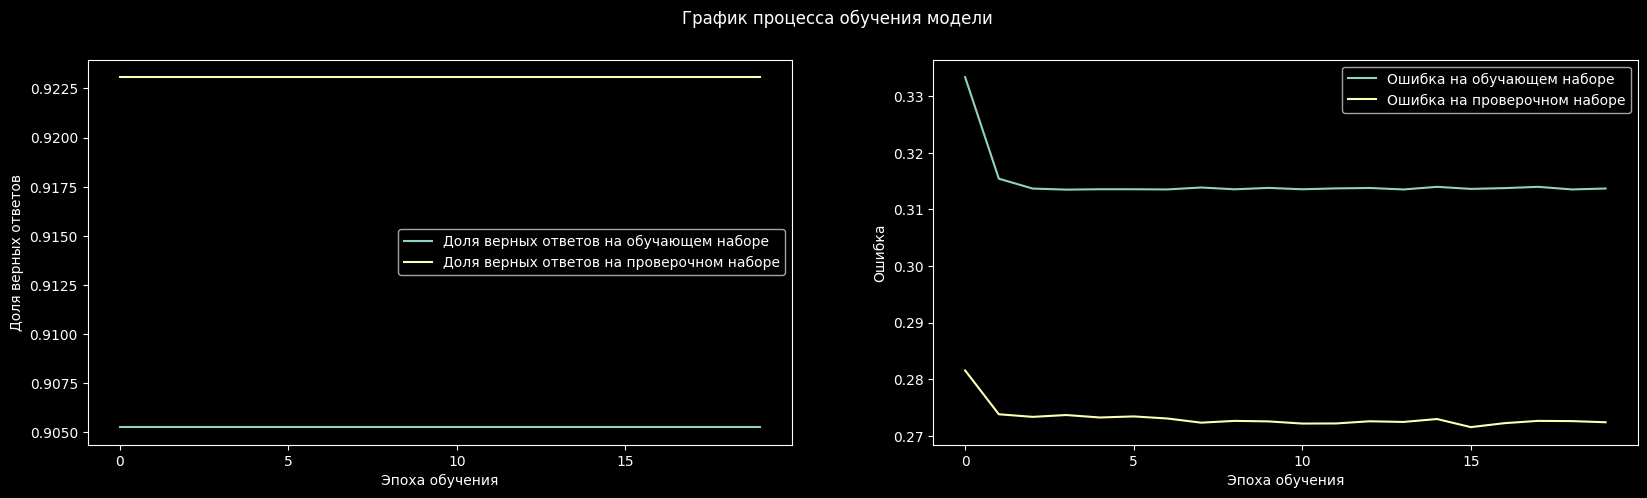

Завершён блок [3400_3450] - 36-й из 50 

Запущен блок [3440_3500] - 37-й из 50
[3440-3500]=> Primavera: № 1801 -> Длина записи: 82991; Маркер выборки: 0; Число нарезок: 0
[3440-3500]=> Primavera: № 1802 -> Длина записи: 667631; Маркер выборки: 1; Число нарезок: 4
[3440-3500]=> Primavera: № 1803 -> Длина записи: 45551; Маркер выборки: 0; Число нарезок: 0
[3440-3500]=> Primavera: № 1804 -> Длина записи: 5942639; Маркер выборки: 1; Число нарезок: 43
[3440-3500]=> Primavera: № 1805 -> Длина записи: 255215; Маркер выборки: 0; Число нарезок: 1
[3440-3500]=> Primavera: № 1806 -> Длина записи: 3280367; Маркер выборки: 1; Число нарезок: 23
[3440-3500]=> Primavera: № 1807 -> Длина записи: 4587311; Маркер выборки: 0; Число нарезок: 33
[3440-3500]=> Primavera: № 1808 -> Длина записи: 3608111; Маркер выборки: 1; Число нарезок: 26
[3440-3500]=> Primavera: № 1809 -> Длина записи: 451631; Маркер выборки: 0; Число нарезок: 3
[3440-3500]=> Primavera: № 1810 -> Длина записи: 4704239; Маркер выборки: 1; Ч

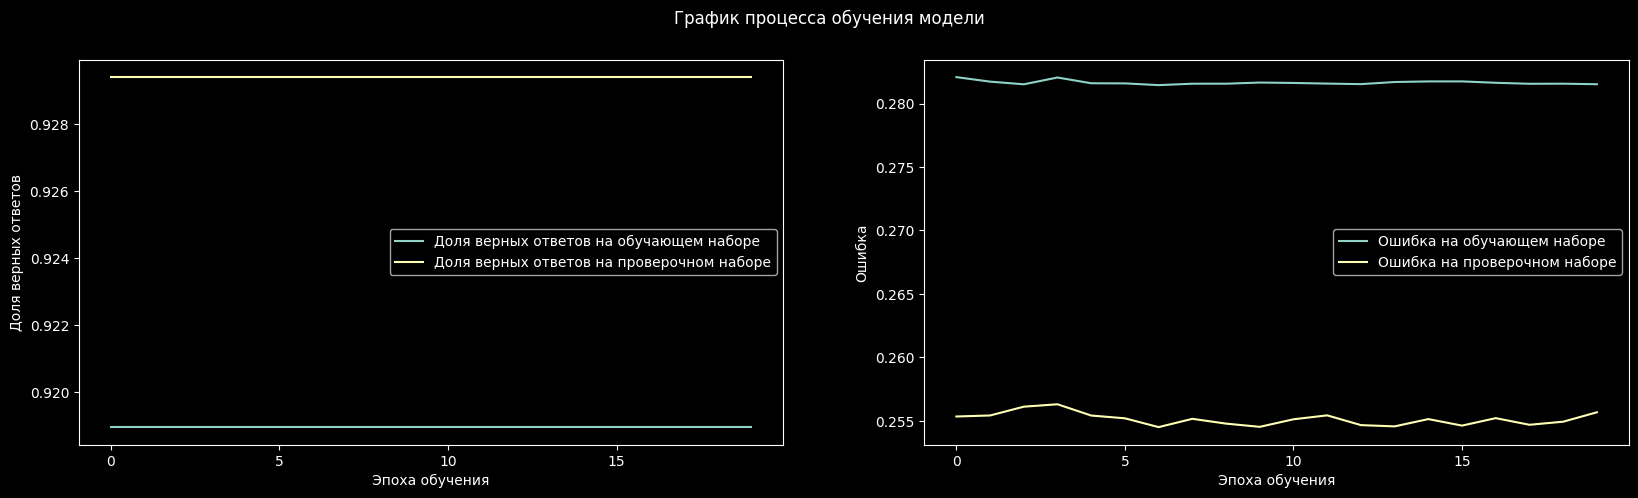

Завершён блок [3440_3500] - 37-й из 50 

Запущен блок [3500_3550] - 38-й из 50
[3500-3550]=> Primavera: № 1861 -> Длина записи: 1600751; Маркер выборки: 0; Число нарезок: 11
[3500-3550]=> Primavera: № 1862 -> Длина записи: 3763055; Маркер выборки: 1; Число нарезок: 27
[3500-3550]=> Primavera: № 1863 -> Длина записи: 65711; Маркер выборки: 0; Число нарезок: 0
[3500-3550]=> Primavera: № 1864 -> Длина записи: 5598191; Маркер выборки: 1; Число нарезок: 40
[3500-3550]=> Primavera: № 1865 -> Длина записи: 394031; Маркер выборки: 0; Число нарезок: 2
[3500-3550]=> Primavera: № 1866 -> Длина записи: 3617903; Маркер выборки: 1; Число нарезок: 26
[3500-3550]=> Primavera: № 1867 -> Длина записи: 199919; Маркер выборки: 0; Число нарезок: 1
[3500-3550]=> Primavera: № 1868 -> Длина записи: 1030511; Маркер выборки: 1; Число нарезок: 7
[3500-3550]=> Primavera: № 1869 -> Длина записи: 20783; Маркер выборки: 0; Число нарезок: 0
[3500-3550]=> Primavera: № 1870 -> Длина записи: 580655; Маркер выборки: 1; Ч

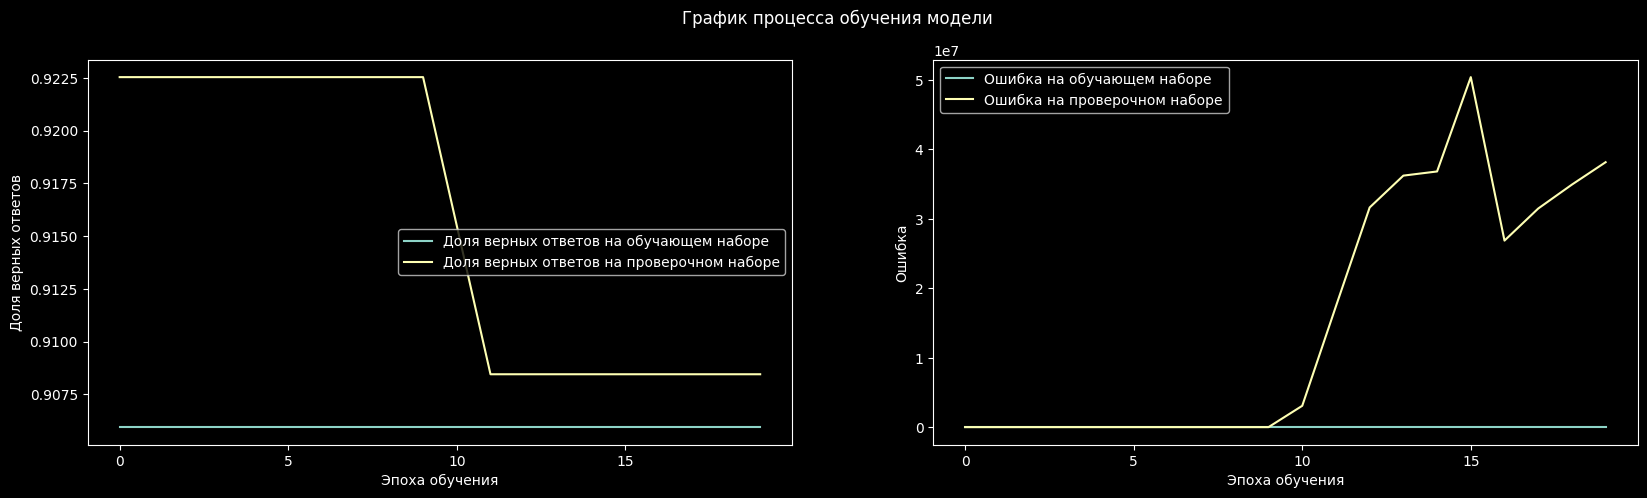

Завершён блок [3500_3550] - 38-й из 50 

Запущен блок [3550_3600] - 39-й из 50
[3550-3600]=> Primavera: № 1911 -> Длина записи: 318575; Маркер выборки: 0; Число нарезок: 2
[3550-3600]=> Primavera: № 1912 -> Длина записи: 4901231; Маркер выборки: 1; Число нарезок: 35
[3550-3600]=> Primavera: № 1913 -> Длина записи: 237359; Маркер выборки: 0; Число нарезок: 1
[3550-3600]=> Primavera: № 1914 -> Длина записи: 988463; Маркер выборки: 1; Число нарезок: 7
[3550-3600]=> Primavera: № 1915 -> Длина записи: 341615; Маркер выборки: 0; Число нарезок: 2
[3550-3600]=> Primavera: № 1916 -> Длина записи: 5631023; Маркер выборки: 1; Число нарезок: 40
[3550-3600]=> Primavera: № 1917 -> Длина записи: 54191; Маркер выборки: 0; Число нарезок: 0
[3550-3600]=> Primavera: № 1918 -> Длина записи: 5537135; Маркер выборки: 1; Число нарезок: 40
[3550-3600]=> Primavera: № 1919 -> Длина записи: 78383; Маркер выборки: 0; Число нарезок: 0
[3550-3600]=> Primavera: № 1920 -> Длина записи: 1298927; Маркер выборки: 1; Чис

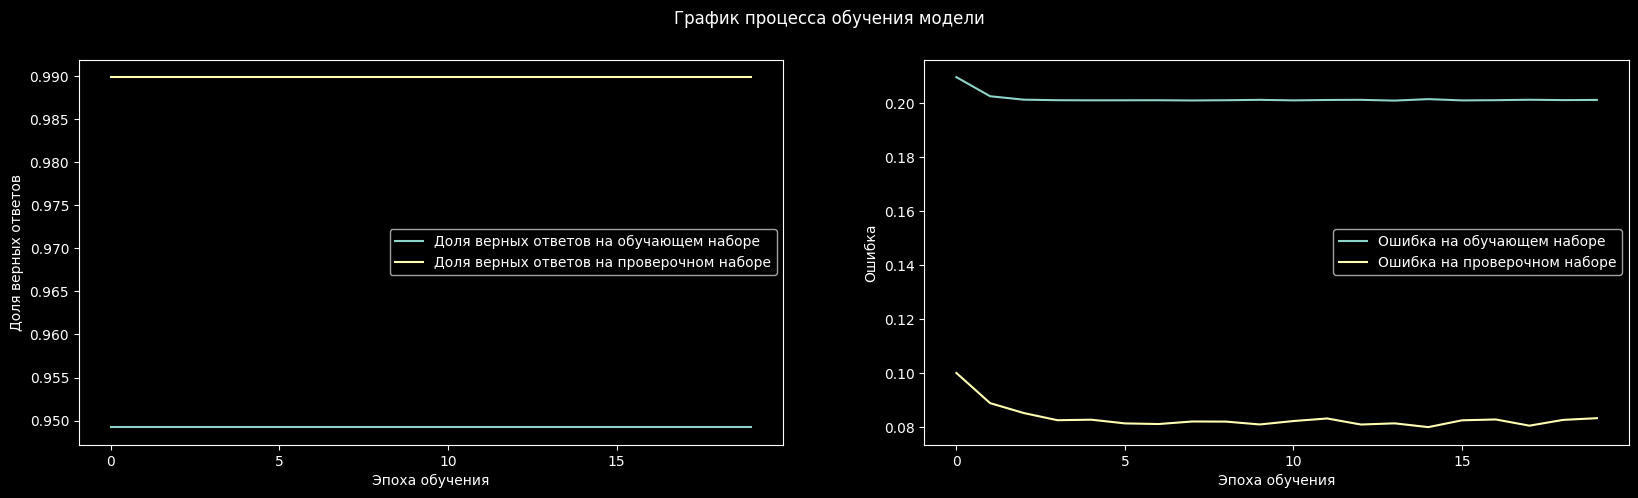

Завершён блок [3550_3600] - 39-й из 50 

Запущен блок [3600_3650] - 40-й из 50
[3600-3650]=> Primavera: № 1961 -> Длина записи: 247727; Маркер выборки: 0; Число нарезок: 1
[3600-3650]=> Primavera: № 1962 -> Длина записи: 2710127; Маркер выборки: 1; Число нарезок: 19
[3600-3650]=> Primavera: № 1963 -> Длина записи: 35183; Маркер выборки: 0; Число нарезок: 0
[3600-3650]=> Primavera: № 1964 -> Длина записи: 3322991; Маркер выборки: 1; Число нарезок: 24
[3600-3650]=> Primavera: № 1965 -> Длина записи: 126191; Маркер выборки: 0; Число нарезок: 0
[3600-3650]=> Primavera: № 1966 -> Длина записи: 930863; Маркер выборки: 1; Число нарезок: 6
[3600-3650]=> Primavera: № 1967 -> Длина записи: 35759; Маркер выборки: 0; Число нарезок: 0
[3600-3650]=> Primavera: № 1968 -> Длина записи: 331823; Маркер выборки: 1; Число нарезок: 2
[3600-3650]=> Primavera: № 1969 -> Длина записи: 4079; Маркер выборки: 0; Число нарезок: 0
[3600-3650]=> Primavera: № 1970 -> Длина записи: 191279; Маркер выборки: 1; Число на

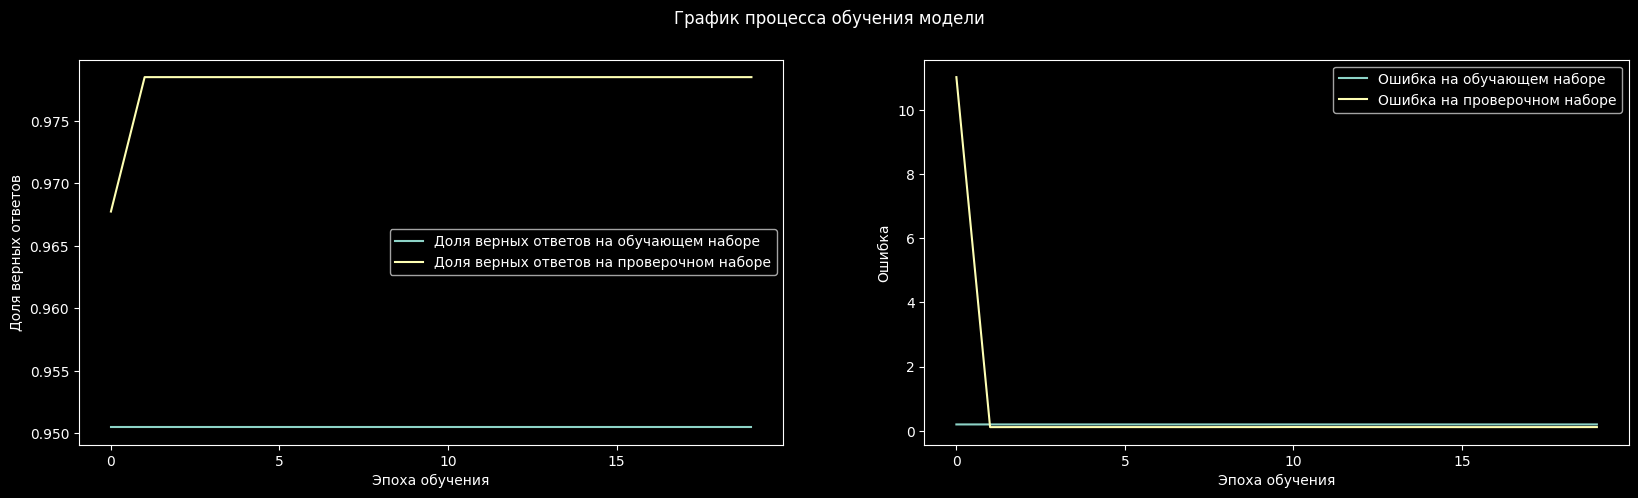

Завершён блок [3600_3650] - 40-й из 50 

Запущен блок [3650_3700] - 41-й из 50
[3650-3700]=> Primavera: № 2011 -> Длина записи: 37487; Маркер выборки: 0; Число нарезок: 0
[3650-3700]=> Primavera: № 2012 -> Длина записи: 616367; Маркер выборки: 1; Число нарезок: 4
[3650-3700]=> Primavera: № 2013 -> Длина записи: 370991; Маркер выборки: 0; Число нарезок: 2
[3650-3700]=> Primavera: № 2014 -> Длина записи: 1523567; Маркер выборки: 1; Число нарезок: 11
[3650-3700]=> Primavera: № 2015 -> Длина записи: 1791407; Маркер выборки: 0; Число нарезок: 13
[3650-3700]=> Primavera: № 2016 -> Длина записи: 1938287; Маркер выборки: 1; Число нарезок: 14
[3650-3700]=> Primavera: № 2017 -> Длина записи: 158447; Маркер выборки: 0; Число нарезок: 1
[3650-3700]=> Primavera: № 2018 -> Длина записи: 2276975; Маркер выборки: 1; Число нарезок: 16
[3650-3700]=> Primavera: № 2019 -> Длина записи: 13295; Маркер выборки: 0; Число нарезок: 0
[3650-3700]=> Primavera: № 2020 -> Длина записи: 2514287; Маркер выборки: 1; Ч

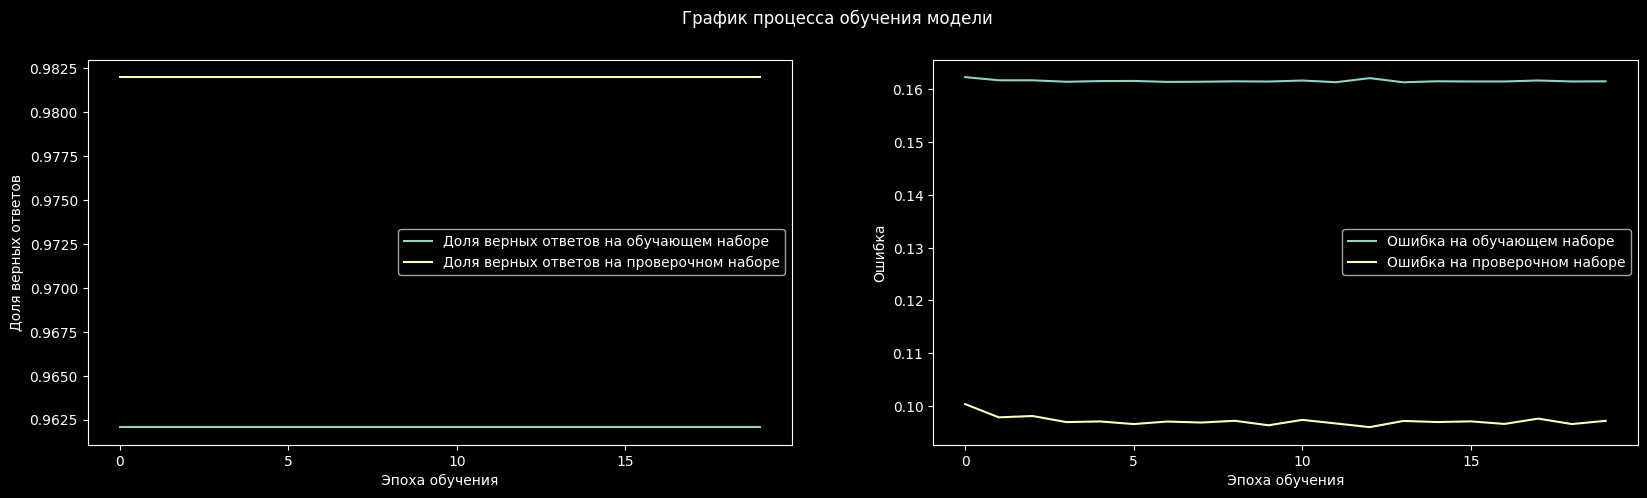

Завершён блок [3650_3700] - 41-й из 50 

Запущен блок [3700_3750] - 42-й из 50
[3700-3750]=> Primavera: № 2061 -> Длина записи: 114095; Маркер выборки: 0; Число нарезок: 0
[3700-3750]=> Primavera: № 2062 -> Длина записи: 3195119; Маркер выборки: 1; Число нарезок: 23
[3700-3750]=> Primavera: № 2063 -> Длина записи: 150383; Маркер выборки: 0; Число нарезок: 1
[3700-3750]=> Primavera: № 2064 -> Длина записи: 770159; Маркер выборки: 1; Число нарезок: 5
[3700-3750]=> Primavera: № 2065 -> Длина записи: 192431; Маркер выборки: 0; Число нарезок: 1
[3700-3750]=> Primavera: № 2066 -> Длина записи: 785711; Маркер выборки: 1; Число нарезок: 5
[3700-3750]=> Primavera: № 2067 -> Длина записи: 23087; Маркер выборки: 0; Число нарезок: 0
[3700-3750]=> Primavera: № 2068 -> Длина записи: 934319; Маркер выборки: 1; Число нарезок: 6
[3700-3750]=> Primavera: № 2069 -> Длина записи: 46703; Маркер выборки: 0; Число нарезок: 0
[3700-3750]=> Primavera: № 2070 -> Длина записи: 331247; Маркер выборки: 1; Число на

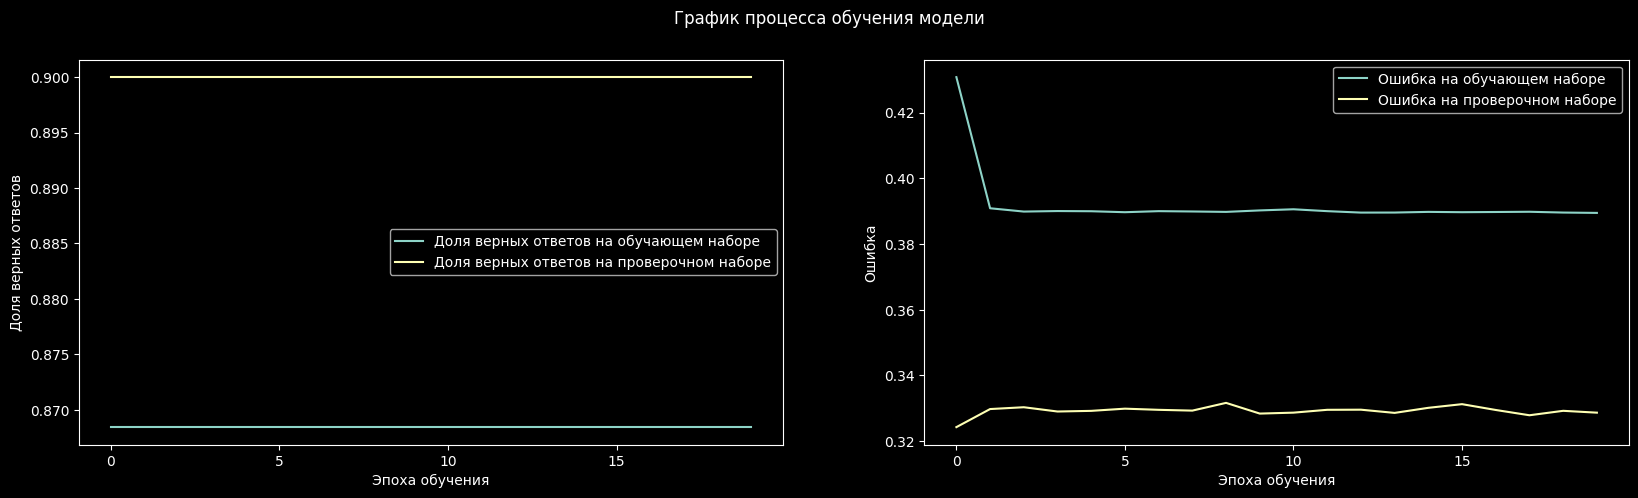

Завершён блок [3700_3750] - 42-й из 50 

Запущен блок [3750_3800] - 43-й из 50
[3750-3800]=> Primavera: № 2111 -> Длина записи: 138287; Маркер выборки: 0; Число нарезок: 1
[3750-3800]=> Primavera: № 2112 -> Длина записи: 1307567; Маркер выборки: 1; Число нарезок: 9
[3750-3800]=> Primavera: № 2113 -> Длина записи: 66863; Маркер выборки: 0; Число нарезок: 0
[3750-3800]=> Primavera: № 2114 -> Длина записи: 5752559; Маркер выборки: 1; Число нарезок: 41
[3750-3800]=> Primavera: № 2115 -> Длина записи: 61103; Маркер выборки: 0; Число нарезок: 0
[3750-3800]=> Primavera: № 2116 -> Длина записи: 1019567; Маркер выборки: 1; Число нарезок: 7
[3750-3800]=> Primavera: № 2117 -> Длина записи: 519023; Маркер выборки: 0; Число нарезок: 3
[3750-3800]=> Primavera: № 2118 -> Длина записи: 4667375; Маркер выборки: 1; Число нарезок: 33
[3750-3800]=> Primavera: № 2119 -> Длина записи: 24815; Маркер выборки: 0; Число нарезок: 0
[3750-3800]=> Primavera: № 2120 -> Длина записи: 8203439; Маркер выборки: 1; Числ

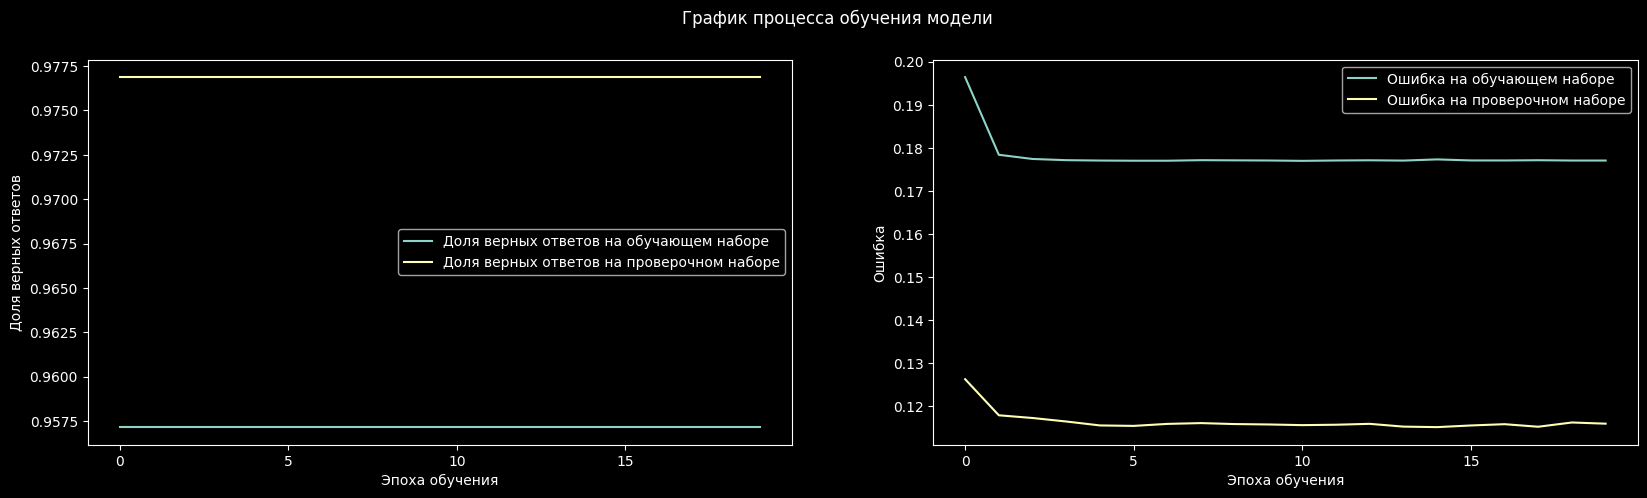

Завершён блок [3750_3800] - 43-й из 50 

Запущен блок [3800_3850] - 44-й из 50
[3800-3850]=> Primavera: № 2161 -> Длина записи: 118703; Маркер выборки: 0; Число нарезок: 0
[3800-3850]=> Primavera: № 2162 -> Длина записи: 139439; Маркер выборки: 1; Число нарезок: 1
[3800-3850]=> Primavera: № 2163 -> Длина записи: 1158959; Маркер выборки: 0; Число нарезок: 8
[3800-3850]=> Primavera: № 2164 -> Длина записи: 6884975; Маркер выборки: 1; Число нарезок: 49
[3800-3850]=> Primavera: № 2165 -> Длина записи: 14447; Маркер выборки: 0; Число нарезок: 0
[3800-3850]=> Primavera: № 2166 -> Длина записи: 7668911; Маркер выборки: 1; Число нарезок: 55
[3800-3850]=> Primavera: № 2167 -> Длина записи: 359471; Маркер выборки: 0; Число нарезок: 2
[3800-3850]=> Primavera: № 2168 -> Длина записи: 5642543; Маркер выборки: 1; Число нарезок: 40
[3800-3850]=> Primavera: № 2169 -> Длина записи: 6383; Маркер выборки: 0; Число нарезок: 0
[3800-3850]=> Primavera: № 2170 -> Длина записи: 1832303; Маркер выборки: 1; Чис

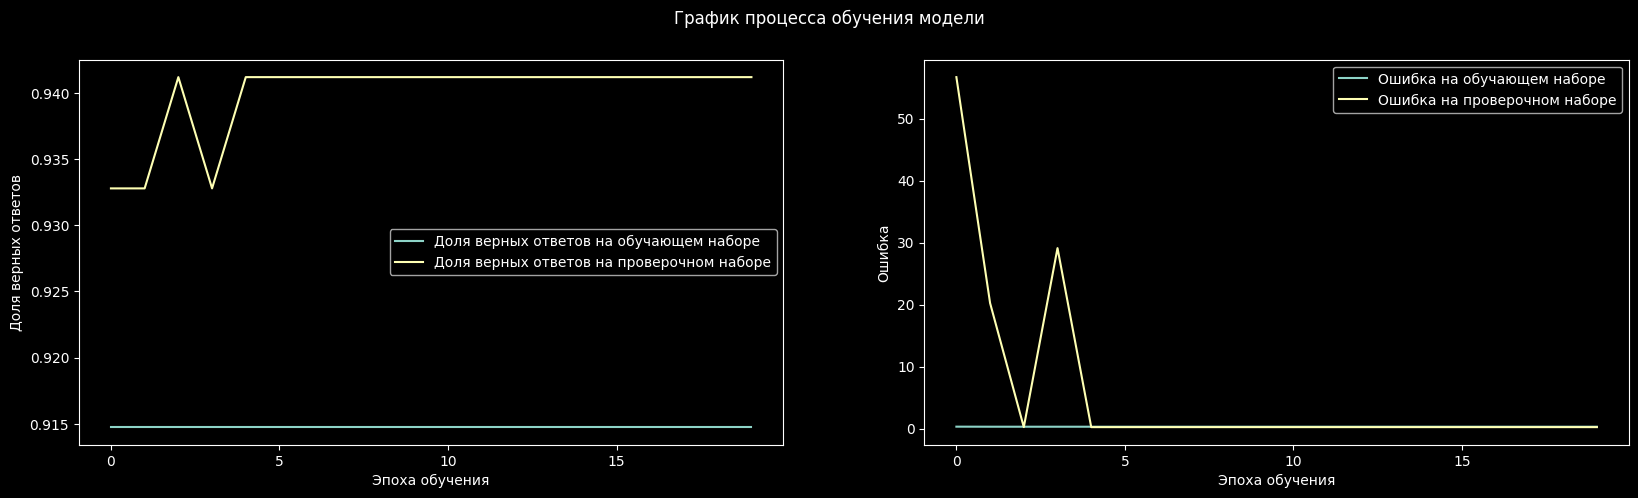

Завершён блок [3800_3850] - 44-й из 50 

Запущен блок [3850_3900] - 45-й из 50
[3850-3900]=> Primavera: № 2211 -> Длина записи: 238511; Маркер выборки: 0; Число нарезок: 1
[3850-3900]=> Primavera: № 2212 -> Длина записи: 100271; Маркер выборки: 1; Число нарезок: 0
[3850-3900]=> Primavera: № 2213 -> Длина записи: 182639; Маркер выборки: 0; Число нарезок: 1
[3850-3900]=> Primavera: № 2214 -> Длина записи: 5268143; Маркер выборки: 1; Число нарезок: 38
[3850-3900]=> Primavera: № 2215 -> Длина записи: 51311; Маркер выборки: 0; Число нарезок: 0
[3850-3900]=> Primavera: № 2216 -> Длина записи: 3807407; Маркер выборки: 1; Число нарезок: 27
[3850-3900]=> Primavera: № 2217 -> Длина записи: 243119; Маркер выборки: 0; Число нарезок: 1
[3850-3900]=> Primavera: № 2218 -> Длина записи: 1158959; Маркер выборки: 1; Число нарезок: 8
[3850-3900]=> Primavera: № 2219 -> Длина записи: 120431; Маркер выборки: 0; Число нарезок: 0
[3850-3900]=> Primavera: № 2220 -> Длина записи: 4946159; Маркер выборки: 1; Чис

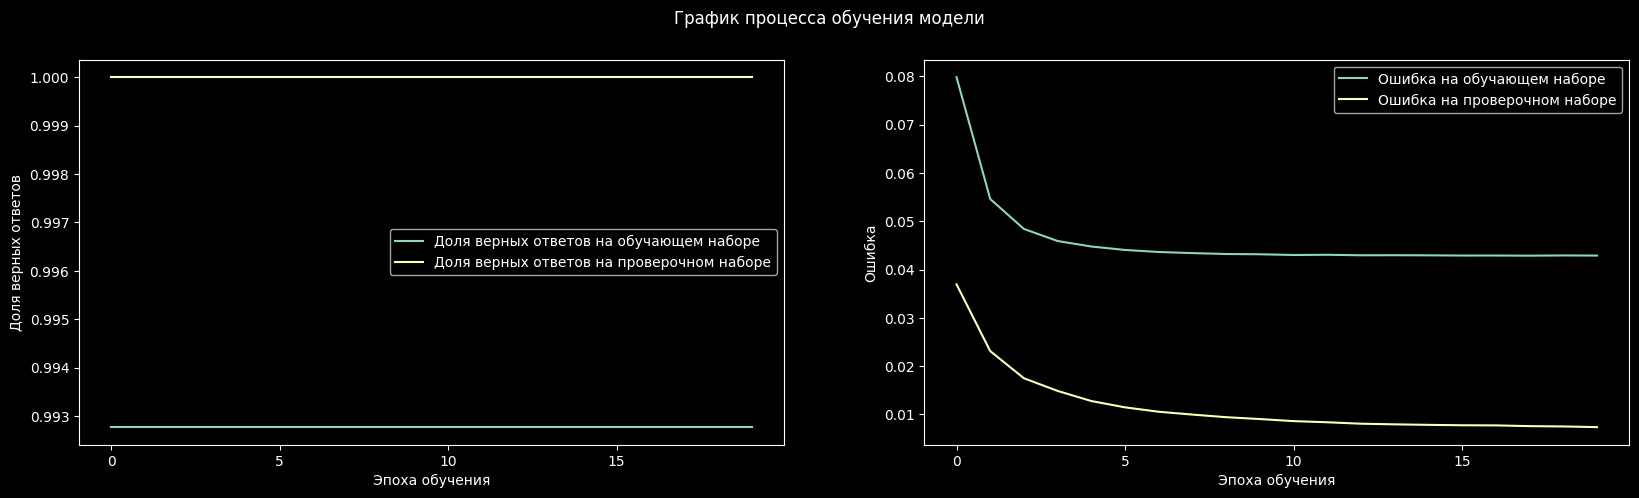

Завершён блок [3850_3900] - 45-й из 50 

Запущен блок [3900_3950] - 46-й из 50
[3900-3950]=> Primavera: № 2261 -> Длина записи: 176303; Маркер выборки: 0; Число нарезок: 1
[3900-3950]=> Primavera: № 2262 -> Длина записи: 2889263; Маркер выборки: 1; Число нарезок: 20
[3900-3950]=> Primavera: № 2263 -> Длина записи: 356591; Маркер выборки: 0; Число нарезок: 2
[3900-3950]=> Primavera: № 2264 -> Длина записи: 4676591; Маркер выборки: 1; Число нарезок: 33
[3900-3950]=> Primavera: № 2265 -> Длина записи: 4079; Маркер выборки: 0; Число нарезок: 0
[3900-3950]=> Primavera: № 2266 -> Длина записи: 798959; Маркер выборки: 1; Число нарезок: 5
[3900-3950]=> Primavera: № 2267 -> Длина записи: 35759; Маркер выборки: 0; Число нарезок: 0
[3900-3950]=> Primavera: № 2268 -> Длина записи: 3205487; Маркер выборки: 1; Число нарезок: 23
[3900-3950]=> Primavera: № 2269 -> Длина записи: 59375; Маркер выборки: 0; Число нарезок: 0
[3900-3950]=> Primavera: № 2270 -> Длина записи: 703919; Маркер выборки: 1; Число 

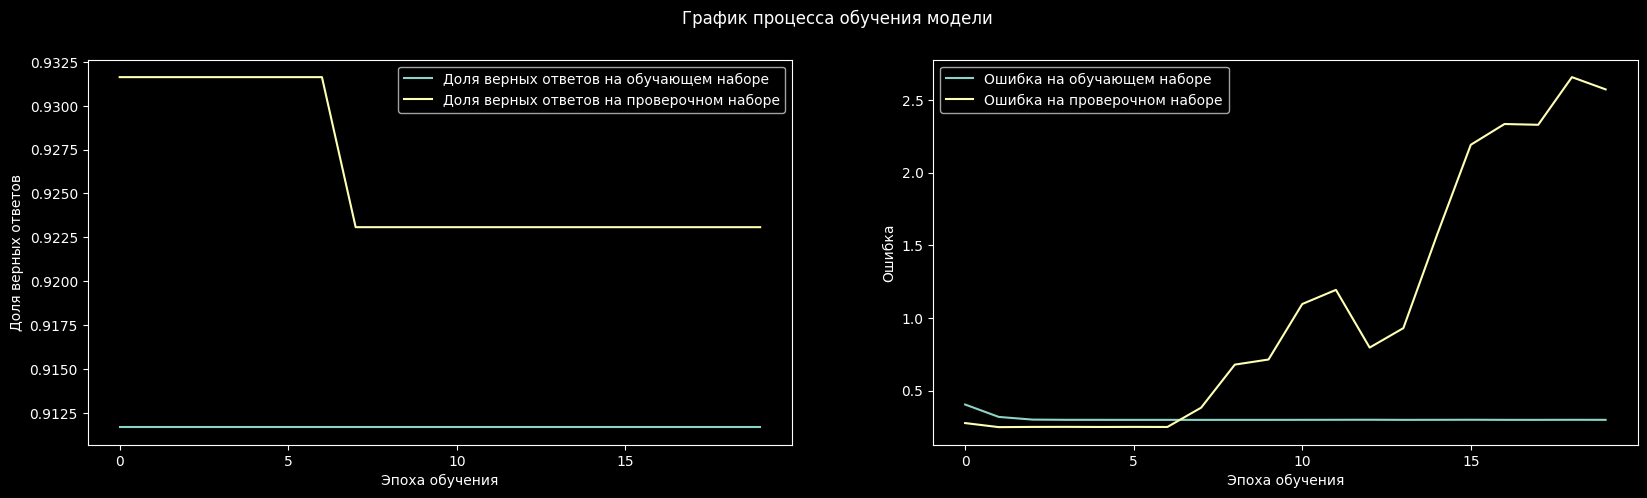

Завершён блок [3900_3950] - 46-й из 50 

Запущен блок [3950_4000] - 47-й из 50
[3950-4000]=> Primavera: № 2311 -> Длина записи: 174575; Маркер выборки: 0; Число нарезок: 1
[3950-4000]=> Primavera: № 2312 -> Длина записи: 273071; Маркер выборки: 1; Число нарезок: 1
[3950-4000]=> Primavera: № 2313 -> Длина записи: 116975; Маркер выборки: 0; Число нарезок: 0
Время обработки: 13385.07 с


<ipython-input-23-77f2e8e634bd>:76: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path_[data_number_]+'/'+au_name_, mono=True, sr=SR) #Загружаем аудиофайл
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

In [ ]:
with timex():
  neuro_au()


Запущен блок [3950_4000] - 1-й из 4
[3950-4000]=> Primavera: № 1 -> Длина записи: 174575; Маркер выборки: 0; Число нарезок: 1
[3950-4000]=> Primavera: № 2 -> Длина записи: 273071; Маркер выборки: 1; Число нарезок: 1
[3950-4000]=> Primavera: № 3 -> Длина записи: 116975; Маркер выборки: 0; Число нарезок: 0
[3950-4000]=> Primavera: № 4 -> Длина записи: 2246447; Маркер выборки: 1; Число нарезок: 16
[3950-4000]=> Primavera: № 5 -> Длина записи: 4655; Маркер выборки: 0; Число нарезок: 0
[3950-4000]=> Primavera: № 6 -> Длина записи: 4796399; Маркер выборки: 1; Число нарезок: 34
[3950-4000]=> Primavera: № 7 -> Длина записи: 110063; Маркер выборки: 0; Число нарезок: 0
[3950-4000]=> Primavera: № 8 -> Длина записи: 894575; Маркер выборки: 1; Число нарезок: 6
[3950-4000]=> Primavera: № 9 -> Длина записи: 121583; Маркер выборки: 0; Число нарезок: 0
[3950-4000]=> Primavera: № 10 -> Длина записи: 4737647; Маркер выборки: 1; Число нарезок: 34
[3950-4000]=> Primavera: № 11 -> Длина записи: 133679; Мар

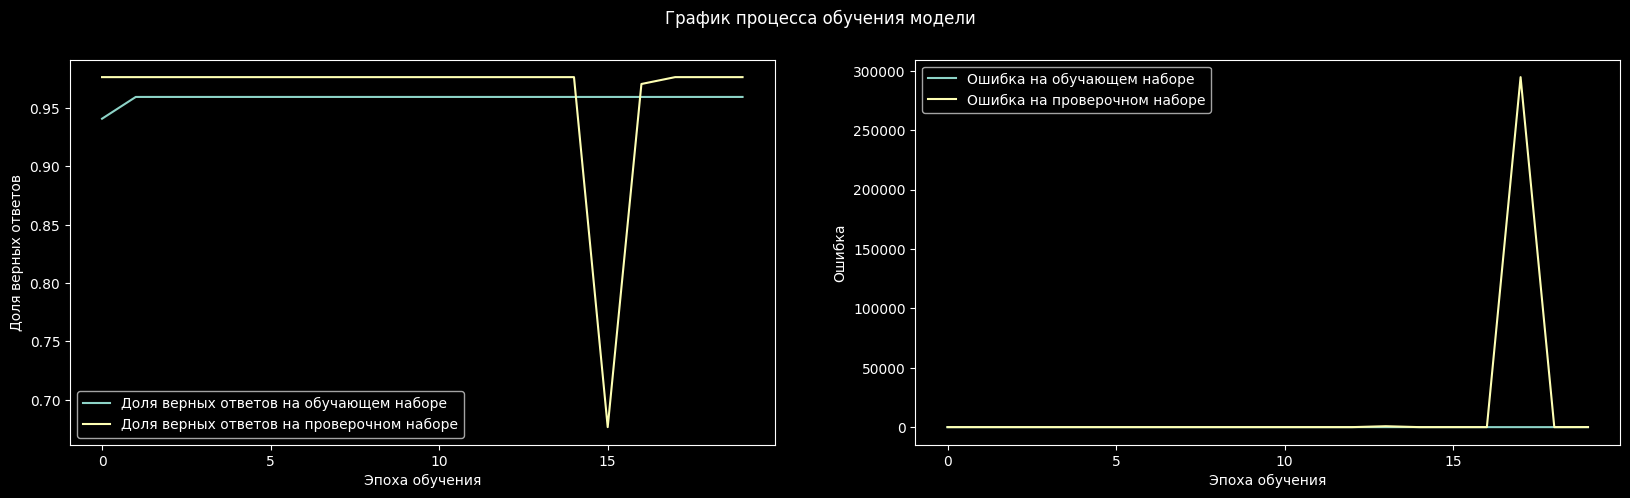

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [3950_4000] - 1-й из 4 

Запущен блок [4000_4050] - 2-й из 4
[4000-4050]=> Primavera: № 51 -> Длина записи: 5807; Маркер выборки: 0; Число нарезок: 0
[4000-4050]=> Primavera: № 52 -> Длина записи: 5809583; Маркер выборки: 1; Число нарезок: 42
[4000-4050]=> Primavera: № 53 -> Длина записи: 6383; Маркер выборки: 0; Число нарезок: 0
[4000-4050]=> Primavera: № 54 -> Длина записи: 1278767; Маркер выборки: 1; Число нарезок: 9
[4000-4050]=> Primavera: № 55 -> Длина записи: 9839; Маркер выборки: 0; Число нарезок: 0
[4000-4050]=> Primavera: № 56 -> Длина записи: 4807919; Маркер выборки: 1; Число нарезок: 34
[4000-4050]=> Primavera: № 57 -> Длина записи: 9263; Маркер выборки: 0; Число нарезок: 0
[4000-4050]=> Primavera: № 58 -> Длина записи: 2912879; Маркер выборки: 1; Число нарезок: 21
[4000-4050]=> Primavera: № 59 -> Длина записи: 269039; Маркер выборки: 0; Число нарезок: 1
[4000-4050]=> Primavera: № 60 -> Длина записи: 1183151; Маркер выборки: 1; Число нарезок: 8
[4000-4050]=> P

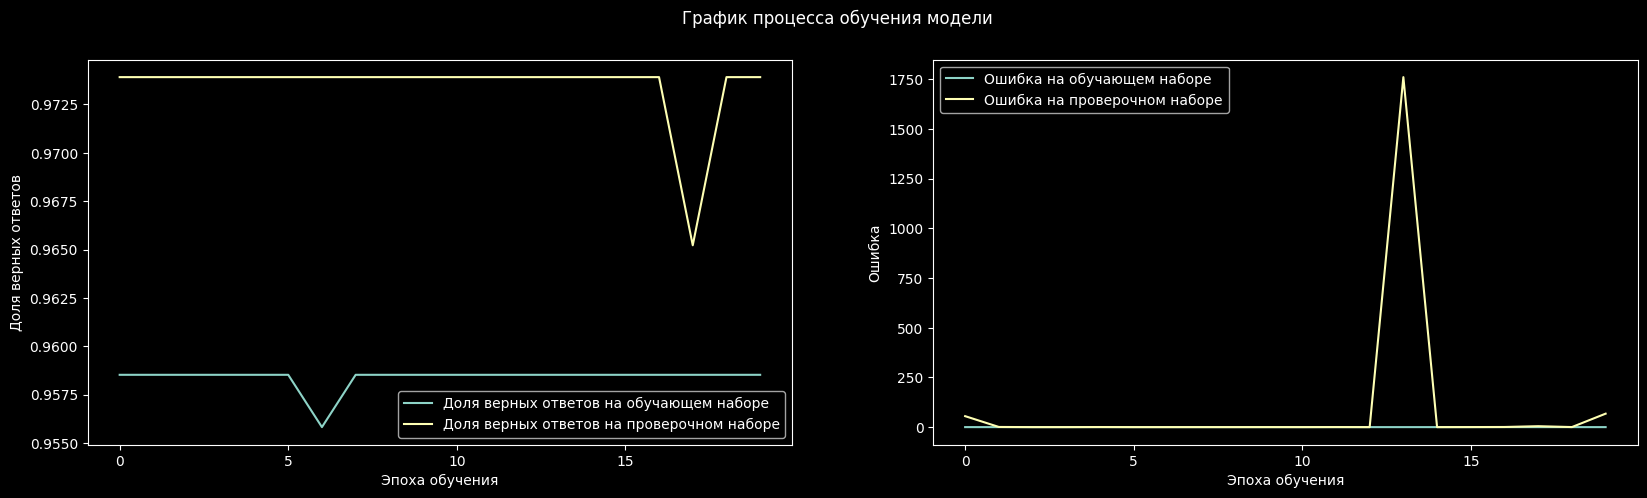

Завершён блок [4000_4050] - 2-й из 4 

Запущен блок [4050_4100] - 3-й из 4
[4050-4100]=> Primavera: № 101 -> Длина записи: 156719; Маркер выборки: 0; Число нарезок: 1
[4050-4100]=> Primavera: № 102 -> Длина записи: 141743; Маркер выборки: 1; Число нарезок: 1
[4050-4100]=> Primavera: № 103 -> Длина записи: 2927; Маркер выборки: 0; Число нарезок: 0
[4050-4100]=> Primavera: № 104 -> Длина записи: 8479343; Маркер выборки: 1; Число нарезок: 61
[4050-4100]=> Primavera: № 105 -> Длина записи: 9839; Маркер выборки: 0; Число нарезок: 0
[4050-4100]=> Primavera: № 106 -> Длина записи: 2581679; Маркер выборки: 1; Число нарезок: 18
[4050-4100]=> Primavera: № 107 -> Длина записи: 152111; Маркер выборки: 0; Число нарезок: 1
[4050-4100]=> Primavera: № 108 -> Длина записи: 748271; Маркер выборки: 1; Число нарезок: 5
[4050-4100]=> Primavera: № 109 -> Длина записи: 78959; Маркер выборки: 0; Число нарезок: 0
[4050-4100]=> Primavera: № 110 -> Длина записи: 3386351; Маркер выборки: 1; Число нарезок: 24
[405

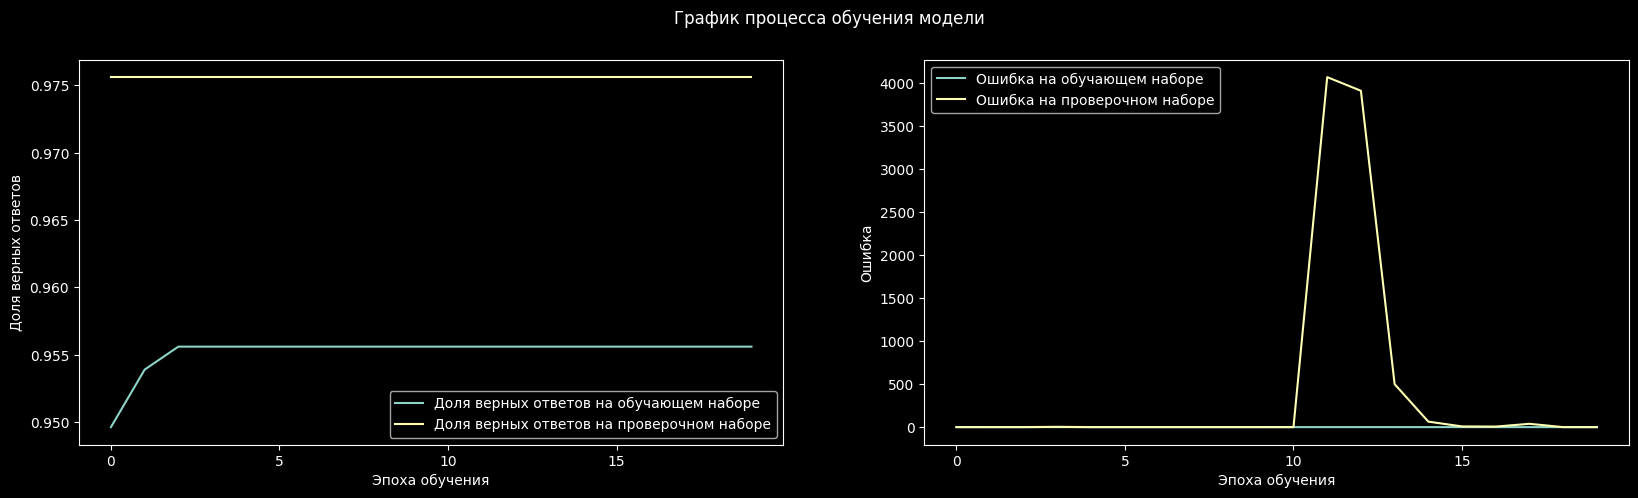

Завершён блок [4050_4100] - 3-й из 4 

Запущен блок [4100_4174] - 4-й из 4
[4100-4174]=> Primavera: № 151 -> Длина записи: 4211183; Маркер выборки: 0; Число нарезок: 30
[4100-4174]=> Primavera: № 152 -> Длина записи: 4443887; Маркер выборки: 1; Число нарезок: 32
[4100-4174]=> Primavera: № 153 -> Длина записи: 225263; Маркер выборки: 0; Число нарезок: 1
[4100-4174]=> Primavera: № 154 -> Длина записи: 2890991; Маркер выборки: 1; Число нарезок: 20
[4100-4174]=> Primavera: № 155 -> Длина записи: 788591; Маркер выборки: 0; Число нарезок: 5
[4100-4174]=> Primavera: № 156 -> Длина записи: 1202735; Маркер выборки: 1; Число нарезок: 8
[4100-4174]=> Primavera: № 157 -> Длина записи: 335279; Маркер выборки: 0; Число нарезок: 2
[4100-4174]=> Primavera: № 158 -> Длина записи: 6044591; Маркер выборки: 1; Число нарезок: 43
[4100-4174]=> Primavera: № 159 -> Длина записи: 64559; Маркер выборки: 0; Число нарезок: 0
[4100-4174]=> Primavera: № 160 -> Длина записи: 2718767; Маркер выборки: 1; Число нарезок

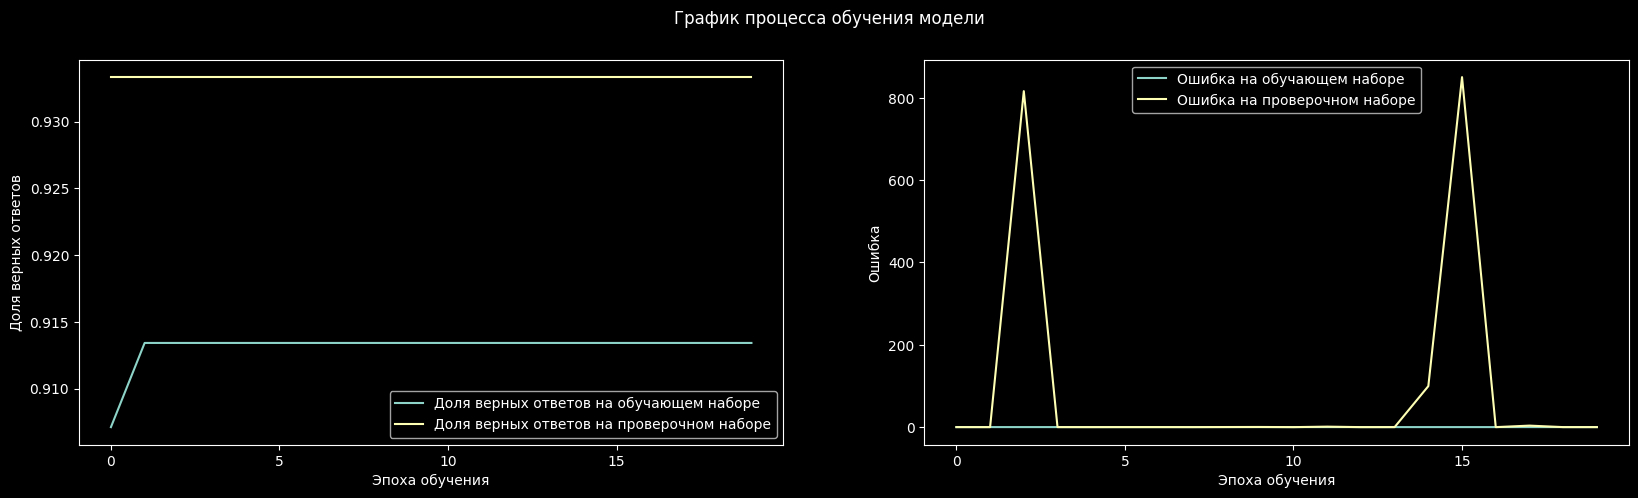

Завершён блок [4100_4174] - 4-й из 4 
Завершено обучение всех запущенных блоков.
Время обработки: 1394.62 с


In [ ]:
with timex():
  neuro_au()

# Проверка

In [ ]:
def neuro_test_au(): # Формирование тестового набора
  #
  # Параметры настройки нарезки обучения и слоёв модели
  #
  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]

  pull_size = PULL_SIZE
  sections = SECTIONS
  conv_pull_blocks = len(sections)
  strider = CONV_STRIDE_1
  audio_slicing_size = strider * (pull_size ** conv_pull_blocks)
  df_pre_train_ = df_pre_train
  a_files_count_ = 0
  XT_Marker_0 = 0
  XT_Marker_1 = 0

  #####
  ##### Основной цикл: создания блока тестовых выборок, запуска тестирования
  #####

#  X_tests = pd.DataFrame(columns=['test_array'])
  X_tests = []

  for tr_block_ in TR_BLOCKS_TEST:
    print('Вошли в основной цикл подготовки тестовых данных...')
    Y_test1 = []
    predict_count_= 0
    last_marker_ = 1

    for i in range(tr_block_[0], tr_block_[1]):
#      print(f'файл {i}')

      X_test1 = list()

      start_time = time.time()
      a_files_count_ +=1

      training_marker_ = df_pre_train_.loc[i]['Tags']
      au_name_ = df_pre_train_.loc[i]['AudioFile']
      data_number_ = df_pre_train_.loc[i]['DataNumber']

      try:
        y, sr = librosa.load(audio_path_[data_number_]+'/'+au_name_, mono=True, sr=SR) #Загружаем аудиофайл
      except LibsndfileError:
        print(f'Ошибка обработки файла: {audio_path_[data_number_]+"/"+au_name_}')
        continue
      except FileNotFoundError:
        print(f'Не найден файл: {audio_path_[data_number_]+"/"+au_name_}')
        continue

      au_len_ = len(y) # Количество сигналов

      # Не попадёт в выборку - файл меньше длины нарезки
      if au_len_ < audio_slicing_size:
        continue

      counter = 0 # Счетчик обработанных аудиоданных
      pos = 0 # Указатель на начало вырезки аудио

      ohe_marker_ = lambda training_marker_: [1, 0] if training_marker_ == 0 else [0, 1]

      while (pos + audio_slicing_size < len(y)):  # Пробегаем по файлу
        counter+=1
        if counter % 10 != 0: # ~ 80% - 90% уже отрезано в обучение
          if counter % 12 == 0: # Отстегнём в тестовую выборку
            X_test1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в тестовую выборку
            Y_test1.append(ohe_marker_(training_marker_)) # Соответствующий маркер в Ytest
        pos += audio_slicing_size // CUTTING_PART_PREDICT # CUTTING_PART_TRAIN # Шаг сдвига нарезки

      # Пропускаем, если случайно длина нарезки меньше размера файла
      if len(X_test1) == 0:
        continue

      X_test1 = np.array(X_test1)

      # !!! Регулятор объёма тестовых выборок !!!
      # !!! В тестовую выборку набираем только с количеством нарезок больше заданного
      if X_test1.shape[0] < 10:
        continue

      # Чередуем в тестоую выборку по маркерам
      print(f'last_marker_ = {last_marker_}; training_marker_ = {training_marker_}')
      if last_marker_ != training_marker_:
        last_marker_ = training_marker_
      else:
        continue

      if training_marker_ == 0: # Счётчик маркеров в тестовой выборке
        XT_Marker_0 += 1
      else:
        XT_Marker_1 += 1

      X_test1 = np.expand_dims(X_test1, axis=2)
      print(f'файл {i}: X_test1.shape = {X_test1.shape}, Маркер:{training_marker_}')

      X_tests.append(X_test1)

      # !!!  Задаём предельный объём тестовой выборки
      print(f'predict_count_ = {predict_count_}')
      if predict_count_== 20:
        break
      else:
        predict_count_ += 1

    Y_test1 = np.array(Y_test1)

    print('Сохраняем...\n')
    with open(DUMP+'/X_tests.pkl', 'wb') as pickle_out:
      pkl.dump(X_tests, pickle_out)
    with open(DUMP+'/Y_test1.pkl', 'wb') as pickle_out:
      pkl.dump(Y_test1, pickle_out)

#    print('Тестируем...\n')
#    print(f'В тестовой выборке - Целевых: {XT_Marker_1}; Нецелевых: {XT_Marker_0}')

#    if 'model_au' not in locals():
#      model_au = load_model(DUMP + '/model_au.h5')

#    checkModel(model_au, X_tests, Y_test)

#  print('Тестирование завершено.')
  print('Подготовка тестовых данных завершена.')


In [ ]:
#Проверяем работу модели
# def checkModel(model, X_tests, Y_test):
def checkModel():
  print('Запуск тестирования...')
  validations = 0
  validation_errors = 0

  print('Чтение тестовых данных и модели с диска...')
  with open(DUMP+'/X_tests.pkl', 'rb') as pickle_in:
    X_tests = pkl.load(pickle_in)
  with open(DUMP+'/Y_test1.pkl', 'rb') as pickle_in:
    Y_test1 = pkl.load(pickle_in)
  model = load_model(DUMP + '/model_au.h5')

  # По всем тестовым аудиофайлам
  for i in range(len(X_tests)):
    validations += 1

    predictions = np.sum(model.predict(X_tests[i]), axis = 0)
    predict_i = np.argmax(predictions)

    # Y_test1[i][0] == 1 => == 0
    # Y_test1[i][1] == 1 => == 1
    if (Y_test1[i][0]==1 and predict_i==0) or (Y_test1[i][1]==1 and predict_i==1):
      if Y_test1[i][0]==1:
        true_ = 'Нецелевой'
      elif Y_test1[i][1]==1:
        true_ = 'Целевой'
      else:
        print('Ошибка в данных: невозможный ohe.')
      print(f'Ответ верный: звонок "{true_}"')
    else:
      if predict_i==0:
        true_ = 'Целевой'
        false_ = 'Нецелевой'
      elif predict_i==1:
        true_ = 'Нецелевой'
        false_ = 'Целевой'
      else:
        print('Ошибка в данных: невозможный ответ predict_i.')
      print(f'Распознано с ошибкой. Вместо "{true_}" распознано "{false_}"')
      validation_errors += 1
  # Итог
  trueValidations = validations - validation_errors
  print("Итого распознаваний проведено: ", validations)
  print("Итого распознаваний ВЕРНЫХ: ", trueValidations, "(", 100*trueValidations/validations,"%)")


In [ ]:
with timex():
  neuro_test_au()

Вошли в основной цикл подготовки тестовых данных...
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 1
last_marker_ = 1; training_marker_ = 0
файл 3110: X

In [ ]:
with timex():
  checkModel()

Запуск тестирования...
Чтение тестовых данных и модели с диска...
1/1 [==============================] - 1s 1s/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 2s 2s/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 818ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 2s 2s/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 738ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 1s/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 1s 1s/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 1s 1s/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 4s 4s/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 1s 1s